In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp
import quandl
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
from scipy.special import erfinv


import warnings 
warnings.filterwarnings("ignore")

### Week 1

In [2]:
# Define portfolio assets and options
equities_etfs = ['AAPL', 'APTV', 'BAC', 'EEM', 'GOOGL', 'MU', 'JPM', 'MVST', 'PFE', 'SNY', 'STRL', 'SU' , 'UL' , 'VTI' , 'XLF']
options_shorted = [('GOOGL', '2023-04-21', 'C', -2), ('MU', '2023-04-21', 'C', -4), ('AAPL', '2023-04-21', 'P', 2)]

#Download historical stock prices
start_date = '2022-12-31'
end_date = '2023-01-07'
Equity_df_1 = yf.download(equities_etfs, start=start_date, end=end_date)['Adj Close']
portfolio_returns = pd.DataFrame()

[*********************100%***********************]  15 of 15 completed


In [3]:
Equity_df_1

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-01-03,124.879326,92.949997,33.294060,38.220001,89.120003,133.084793,50.268410,1.51,50.793686,49.000000,33.450001,29.874332,50.020222,189.646927,34.150505
2023-01-04,126.167366,95.879997,33.919998,39.369999,88.080002,134.325806,54.090687,1.55,49.673969,48.740002,33.360001,29.488665,50.357189,191.330154,34.697788
2023-01-05,124.829399,95.860001,33.850452,39.250000,86.199997,134.296051,54.599659,1.50,49.208244,47.750000,31.610001,29.953444,49.633698,189.089172,34.439072
2023-01-06,129.422394,98.309998,34.188259,40.070000,87.339996,136.865875,56.655506,1.55,50.456779,48.139999,31.980000,31.021444,50.347279,193.262375,35.205273


In [4]:
# Calculating the daily log return
Equity_df_log_return_1 = np.log1p(Equity_df_1.pct_change())
Equity_df_log_return_1

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,0.010261,0.031036,0.018626,0.029645,-0.011738,0.009282,0.073285,0.026145,-0.022291,-0.005320,-0.002694,-0.012994,0.006714,0.008836,0.015899
2023-01-05,-0.010661,-0.000209,-0.002052,-0.003053,-0.021575,-0.000222,0.009366,-0.032790,-0.009420,-0.020521,-0.053884,0.015638,-0.014471,-0.011782,-0.007484
2023-01-06,0.036133,0.025237,0.009930,0.020676,0.013138,0.018955,0.036962,0.032790,0.025056,0.008134,0.011637,0.035034,0.014275,0.021830,0.022004


In [5]:
# Calculating the mean of all returna

mean_log_return_1 = Equity_df_log_return_1.mean(axis=0)
mean_log_return_1

AAPL     0.011911
APTV     0.018688
BAC      0.008834
EEM      0.015756
GOOGL   -0.006725
JPM      0.009338
MU       0.039871
MVST     0.008715
PFE     -0.002218
SNY     -0.005902
STRL    -0.014980
SU       0.012560
UL       0.002172
VTI      0.006295
XLF      0.010139
dtype: float64

In [6]:
#Options Data for Leverage Factor :
Options_data_1 = pd.DataFrame({
    'Date': ['2023-01-05', '2023-01-06'],
    'GOOGL Close': [0.03, 0.05],
    'MU Close': [0.05, 0.07],
    'AAPL Close':[0.8 , 1.12]
})
# set the Date column as the index
Options_data_1.set_index('Date', inplace=True)

# Underlying Stock price data for L

underlying_data_1 = pd.DataFrame({
    'Date': ['2023-01-05', '2023-01-06'],
    'GOOGL Close': [86.199997, 87.339996],
    'MU Close': [54.599659, 56.655506],
    'AAPL Close':[124.829399 , 129.422394]
})
underlying_data_1.set_index('Date', inplace=True)

# Calculate the Leverage Factor

delta_1 = Options_data_1.diff().iloc[1] / underlying_data_1.diff().iloc[1]
leverage_factor_1 = (delta_1 * underlying_data_1.iloc[0]) / Options_data_1.iloc[0]
print(leverage_factor_1)

GOOGL Close    50.409399
MU Close       10.623292
AAPL Close     10.871285
dtype: float64


In [7]:
mean_log_return_options_1 = pd.Series()
mean_log_return_options_1['GOOGL_O'] = mean_log_return_1['GOOGL']
mean_log_return_options_1['MU_O'] = mean_log_return_1['MU']
mean_log_return_options_1['AAPL_O'] = mean_log_return_1['AAPL']
print(mean_log_return_options_1)

GOOGL_O   -0.006725
MU_O       0.039871
AAPL_O     0.011911
dtype: float64


In [8]:
# Downloading the bonds data
bond_1223 = pd.read_csv('Bond1.csv')
bond_0324 = pd.read_csv('Bond2.csv')

In [9]:
# Rearranging the data according the dates

bond_1223.sort_values(by = 'Date', inplace=True)
bond_0324.sort_values(by = 'Date', inplace=True)

In [10]:
# Joining the 2 bonds data into 1

bond_data = pd.DataFrame()
bond_data['Date'] = Equity_df_1.index
bond_data['Bond1223'] = bond_1223['Close']
bond_data['Bond0324'] = bond_0324['Close']

bond_data.set_index('Date', inplace=True)
bond_data.tail()

,Bond1223,Bond0324
Date,,
2023-01-03,96.76275,97.80441
2023-01-04,96.77640,97.82661
2023-01-05,96.74106,97.65435
2023-01-06,96.76497,97.78250


In [11]:
# Calculate the yield of the bonds / Risk Factor

t = 0.1923
T = 1

bond_yield = (-1 / (T-t)) * np.log(bond_data)
bond_yield.head()

,Bond1223,Bond0324
Date,,
2023-01-03,-5.660842,-5.674099
2023-01-04,-5.661017,-5.674380
2023-01-05,-5.660564,-5.672198
2023-01-06,-5.660870,-5.673821


In [12]:
#Risk Factor Changes:
risk_factor_bond = bond_yield.diff()
risk_factor_bond

,Bond1223,Bond0324
Date,,
2023-01-03,NaN,NaN
2023-01-04,-0.000175,-0.000281
2023-01-05,0.000452,0.002182
2023-01-06,-0.000306,-0.001624


In [13]:
#Mean for Risk Factor bond changes:
mean_risk_factor_bonds_1 = risk_factor_bond.mean(axis=0)
mean_risk_factor_bonds_1

Bond1223   -0.000009
Bond0324    0.000092
dtype: float64

In [14]:
# Grouping all the investments together

investments_return_1 = Equity_df_log_return_1.copy()
investments_return_1['GOOGL_O'] = Equity_df_log_return_1['GOOGL']
investments_return_1['MU_O'] = Equity_df_log_return_1['MU']
investments_return_1['AAPL_O'] = Equity_df_log_return_1['AAPL']
investments_return_1['Bond_1'] = risk_factor_bond['Bond1223']
investments_return_1['Bond_2'] = risk_factor_bond['Bond0324']
investments_return_1 = investments_return_1[1:]

investments_return_1.tail()

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
Date,,,,,,,,,,,,,,,,,,,,
2023-01-04,0.010261,0.031036,0.018626,0.029645,-0.011738,0.009282,0.073285,0.026145,-0.022291,-0.005320,-0.002694,-0.012994,0.006714,0.008836,0.015899,-0.011738,0.073285,0.010261,-0.000175,-0.000281
2023-01-05,-0.010661,-0.000209,-0.002052,-0.003053,-0.021575,-0.000222,0.009366,-0.032790,-0.009420,-0.020521,-0.053884,0.015638,-0.014471,-0.011782,-0.007484,-0.021575,0.009366,-0.010661,0.000452,0.002182
2023-01-06,0.036133,0.025237,0.009930,0.020676,0.013138,0.018955,0.036962,0.032790,0.025056,0.008134,0.011637,0.035034,0.014275,0.021830,0.022004,0.013138,0.036962,0.036133,-0.000306,-0.001624


In [15]:
# Calculating the Covariance matrix

investments_return_cov_1 = investments_return_1.cov()
investments_return_cov_1

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
AAPL,0.000549,0.000282,0.000128,0.000260,0.000412,0.000224,0.000281,0.000746,0.000428,0.000335,0.000751,2.585258e-04,0.000331,0.000390,0.000338,0.000412,0.000281,0.000549,-8.665062e-06,-4.405934e-05
APTV,0.000282,0.000276,0.000167,0.000280,0.000174,0.000121,0.000485,0.000579,0.000033,0.000188,0.000531,-1.132584e-04,0.000225,0.000237,0.000241,0.000174,0.000485,0.000282,-6.352532e-06,-2.766781e-05
BAC,0.000128,0.000167,0.000108,0.000173,0.000067,0.000057,0.000328,0.000324,-0.000044,0.000090,0.000286,-1.295490e-04,0.000119,0.000119,0.000131,0.000067,0.000328,0.000128,-3.484054e-06,-1.414266e-05
EEM,0.000260,0.000280,0.000173,0.000285,0.000154,0.000113,0.000512,0.000571,-0.000005,0.000176,0.000517,-1.511166e-04,0.000218,0.000226,0.000235,0.000154,0.000512,0.000260,-6.218117e-06,-2.646644e-05
GOOGL,0.000412,0.000174,0.000067,0.000154,0.000320,0.000167,0.000114,0.000504,0.000375,0.000246,0.000522,2.644056e-04,0.000232,0.000282,0.000234,0.000320,0.000114,0.000412,-5.958576e-06,-3.162315e-05
JPM,0.000224,0.000121,0.000057,0.000113,0.000167,0.000092,0.000131,0.000314,0.000166,0.000137,0.000314,9.406994e-05,0.000138,0.000161,0.000141,0.000167,0.000131,0.000224,-3.627644e-06,-1.822882e-05
MU,0.000281,0.000485,0.000328,0.000512,0.000114,0.000131,0.001028,0.000889,-0.000265,0.000212,0.000760,-5.065758e-04,0.000312,0.000296,0.000348,0.000114,0.001028,0.000281,-9.369841e-06,-3.561435e-05
MVST,0.000746,0.000579,0.000324,0.000571,0.000504,0.000314,0.000889,0.001303,0.000303,0.000477,0.001235,-1.605367e-05,0.000531,0.000584,0.000559,0.000504,0.000889,0.000746,-1.458911e-05,-6.727568e-05
PFE,0.000428,0.000033,-0.000044,-0.000005,0.000375,0.000166,-0.000265,0.000303,0.000599,0.000238,0.000380,5.518683e-04,0.000179,0.000251,0.000167,0.000375,-0.000265,0.000428,-4.047924e-06,-2.717875e-05
SNY,0.000335,0.000188,0.000090,0.000176,0.000246,0.000137,0.000212,0.000477,0.000238,0.000206,0.000475,1.277948e-04,0.000208,0.000242,0.000214,0.000246,0.000212,0.000335,-5.503416e-06,-2.742629e-05


In [16]:
# Calculating the Loss Distribution Stocks

number_stock = 30000 // Equity_df_1.iloc[0]
loss_distribution_stock_1 = (number_stock * Equity_df_1.iloc[-1])
loss_distribution_stock_1

AAPL     31061.374512
APTV     31655.819214
BAC      30803.621471
EEM      31414.879761
GOOGL    29346.238770
JPM      30794.821930
MU       33766.681656
MVST     30793.849053
PFE      29769.499893
SNY      29461.679626
STRL     28654.079590
SU       31145.530098
UL       30158.019878
VTI      30535.455231
XLF      30910.229408
dtype: float64

In [17]:
# Calculating the Loss Distribution Options

number_option = [200, 200, 400]
price_option = [0.05, 0.07, 1.12]
loss_distribution_options_1 =  leverage_factor_1.multiply(number_option)
loss_distribution_options_1 = loss_distribution_options_1.multiply(price_option)
loss_distribution_options_1 

GOOGL Close     504.093992
MU Close        148.726092
AAPL Close     4870.335870
dtype: float64

In [18]:
# Calculating the Loss Distribution Bonds

number_bond = [3084, 3332]
price_bond = [97.29100, 96.021532]
year_maturity = [0.9807, 0.9807]
loss_distribution_bond_1 = pd.Series(index=['Bond_1', 'Bond_2'])
for i in range(2):
    loss_distribution_bond_1[i] = number_bond[i] * price_bond[i] * year_maturity[i]
    
loss_distribution_bond_1

Bond_1    294254.566931
Bond_2    313768.830353
dtype: float64

In [19]:
# Grouping all the loss distributions and the mean

loss_distribution_investment_1 = loss_distribution_stock_1.append(loss_distribution_options_1)
loss_distribution_investment_1 = loss_distribution_investment_1.append(loss_distribution_bond_1)
print(loss_distribution_investment_1)


AAPL            31061.374512
APTV            31655.819214
BAC             30803.621471
EEM             31414.879761
GOOGL           29346.238770
JPM             30794.821930
MU              33766.681656
MVST            30793.849053
PFE             29769.499893
SNY             29461.679626
STRL            28654.079590
SU              31145.530098
UL              30158.019878
VTI             30535.455231
XLF             30910.229408
GOOGL Close       504.093992
MU Close          148.726092
AAPL Close       4870.335870
Bond_1         294254.566931
Bond_2         313768.830353
dtype: float64


In [20]:
#Mean of risk factor changes:
mean_risk_factor_investment_1 = mean_log_return_1.append(mean_log_return_options_1)
mean_risk_factor_investment_1 = mean_risk_factor_investment_1.append(mean_risk_factor_bonds_1)
print(mean_risk_factor_investment_1)

AAPL        0.011911
APTV        0.018688
BAC         0.008834
EEM         0.015756
GOOGL      -0.006725
JPM         0.009338
MU          0.039871
MVST        0.008715
PFE        -0.002218
SNY        -0.005902
STRL       -0.014980
SU          0.012560
UL          0.002172
VTI         0.006295
XLF         0.010139
GOOGL_O    -0.006725
MU_O        0.039871
AAPL_O      0.011911
Bond1223   -0.000009
Bond0324    0.000092
dtype: float64


In [21]:
# Calculating Mean of the Portfolio

portfolio_mean_1 = np.dot(loss_distribution_investment_1, mean_risk_factor_investment_1)
portfolio_mean_1

3813.490970087309

In [22]:
# Calculating Variance of the Portfolio

portfolio_variance_1 = np.dot(loss_distribution_investment_1, investments_return_cov_1)
portfolio_variance_1 = np.dot(portfolio_variance_1.T, loss_distribution_investment_1)
portfolio_variance_1

50869331.47308255

In [23]:
# Calculating the standard deviation of the Portfolio

portfolio_std_1 = portfolio_variance_1 ** 0.5
portfolio_std_1

7132.27393424303

In [24]:
# Horizon and confidence level
h = 120 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
# Calculate volatility over the horizon
sig_h = portfolio_std_1 

# Calculate VaR for the portfolio for 0.95
VaR_1 = norm.ppf(1 - alpha1) * sig_h + portfolio_mean_1
# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_1 = (1 / (alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h) + portfolio_mean_1

print("95% VaR normal distributionis", round(VaR_1, 2))
print("95% CVaR/ES normal distribution is", round(ES_1, 2))

95% VaR normal distributionis 15545.04
95% CVaR/ES normal distribution is 18525.32


In [25]:
import numpy as np
from scipy.stats import t

# Define the inputs (replace with your own values)
portfolio_std = portfolio_std_1  # standard deviation of the portfolio
portfolio_mean = portfolio_mean_1  # expected return of the portfolio
confidence_level = 0.95  # confidence level
degrees_of_freedom = 20  # degrees of freedom for the t-distribution

# Calculate the t-value
t_value = t.ppf(1 - confidence_level, degrees_of_freedom)

# Calculate the VaR
VaR_t1 = (portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom))

# Calculate the expected shortfall
ES_t1 = ((portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom)) +
       (portfolio_std / (degrees_of_freedom * (1 - confidence_level))) * 
       (degrees_of_freedom + t_value**2) * t.pdf(t_value, degrees_of_freedom))

print("95% VaR t distributionis", round(VaR_t1, 2))
print("95% CVaR/ES t distribution is", round(ES_t1, 2))

95% VaR t distributionis 16418.43
95% CVaR/ES t distribution is 31472.76


### Week 2

In [26]:
# Define portfolio assets and options
equities_etfs = ['AAPL', 'APTV', 'BAC', 'EEM', 'GOOGL', 'MU', 'JPM', 'MVST', 'PFE', 'SNY', 'STRL', 'SU' , 'UL' , 'VTI' , 'XLF']
options_shorted = [('GOOGL', '2023-04-21', 'C', -2), ('MU', '2023-04-21', 'C', -4), ('AAPL', '2023-04-21', 'P', 2)]

#Download historical stock prices
start_date = '2023-01-08'
end_date = '2023-01-14'
Equity_df_2 = yf.download(equities_etfs, start=start_date, end=end_date)['Adj Close']
portfolio_returns = pd.DataFrame()

[*********************100%***********************]  15 of 15 completed


In [27]:
Equity_df_2

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-01-09,129.951584,97.980003,33.671612,40.369999,88.019997,136.300308,56.246330,1.61,47.949795,48.509998,32.189999,31.179667,50.495941,193.342056,35.075912
2023-01-10,130.530701,99.639999,33.900127,40.660000,88.419998,137.520737,57.094616,1.70,47.186802,48.820000,32.919998,30.695110,50.555405,194.865921,35.274925
2023-01-11,133.286499,99.279999,34.158455,40.830002,91.519997,138.542709,57.942902,1.77,47.018349,48.740002,32.820000,31.021444,50.515766,197.435593,35.603294
2023-01-12,133.206619,101.669998,34.247875,41.029999,91.129997,138.403809,57.154495,1.78,47.275982,49.349998,33.169998,31.941109,50.763535,198.391739,35.672947
2023-01-13,134.554550,101.550003,35.002975,41.299999,92.120003,141.896393,56.815182,1.76,47.414707,49.270000,33.869999,32.079552,50.981575,199.238327,35.941616


In [28]:
# Calculating the daily log return
Equity_df_log_return_2 = np.log1p(Equity_df_2.pct_change())
Equity_df_log_return_2

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-10,0.004447,0.016800,0.006764,0.007158,0.004534,0.008914,0.014969,0.054394,-0.016040,0.006370,0.022425,-0.015663,0.001177,0.007851,0.005658
2023-01-11,0.020892,-0.003620,0.007591,0.004172,0.034459,0.007404,0.014748,0.040351,-0.003576,-0.001640,-0.003042,0.010575,-0.000784,0.013101,0.009266
2023-01-12,-0.000599,0.023788,0.002614,0.004886,-0.004270,-0.001003,-0.013700,0.005634,0.005464,0.012438,0.010608,0.029215,0.004893,0.004831,0.001954
2023-01-13,0.010068,-0.001181,0.021809,0.006559,0.010805,0.024922,-0.005954,-0.011300,0.002930,-0.001622,0.020884,0.004325,0.004286,0.004258,0.007503


In [29]:
# Calculating the mean of all returna

mean_log_return_2 = Equity_df_log_return_2.mean(axis=0)
mean_log_return_2

AAPL     0.008702
APTV     0.008947
BAC      0.009694
EEM      0.005694
GOOGL    0.011382
JPM      0.010059
MU       0.002516
MVST     0.022270
PFE     -0.002806
SNY      0.003886
STRL     0.012718
SU       0.007113
UL       0.002393
VTI      0.007510
XLF      0.006095
dtype: float64

In [30]:
#Options Data for Leverage Factor :
Options_data_2 = pd.DataFrame({
    'Date': ['2023-01-12', '2023-01-13'],
    'GOOGL Close': [0.05, 0.07],
    'MU Close': [0.09, 0.07],
    'AAPL Close':[1.12 , 1.25]
})
# set the Date column as the index
Options_data_2.set_index('Date', inplace=True)

# Underlying Stock price data for L

underlying_data_2 = pd.DataFrame({
    'Date': ['2023-01-12', '2023-01-13'],
    'GOOGL Close': [91.129997, 92.120003],
    'MU Close': [57.154495, 56.815182],
    'AAPL Close':[133.206619 , 134.554550]
})
underlying_data_2.set_index('Date', inplace=True)

# Calculate the Leverage Factor

delta_2 = Options_data_2.diff().iloc[1] / underlying_data_2.diff().iloc[1]
leverage_factor_2 = (delta_2 * underlying_data_2.iloc[0]) / Options_data_2.iloc[0]
print(leverage_factor_2)

GOOGL Close    36.819978
MU Close       37.431513
AAPL Close     11.470530
dtype: float64


In [31]:
mean_log_return_options_2 = pd.Series()
mean_log_return_options_2['GOOGL_O'] = mean_log_return_2['GOOGL']
mean_log_return_options_2['MU_O'] = mean_log_return_2['MU']
mean_log_return_options_2['AAPL_O'] = mean_log_return_2['AAPL']
print(mean_log_return_options_2)

GOOGL_O    0.011382
MU_O       0.002516
AAPL_O     0.008702
dtype: float64


In [32]:
# Rearranging the data according the dates

bond_1223.sort_values(by = 'Date', inplace=True)
bond_0324.sort_values(by = 'Date', inplace=True)

In [33]:
# Joining the 2 bonds data into 1

bond_data_2 = pd.DataFrame()
bond_data_2['Date'] = Equity_df_2.index
bond_data_2['Bond1223'] = bond_1223['Close']
bond_data_2['Bond0324'] = bond_0324['Close']

bond_data_2.set_index('Date', inplace=True)
bond_data_2.tail()

,Bond1223,Bond0324
Date,,
2023-01-09,96.76275,97.80441
2023-01-10,96.77640,97.82661
2023-01-11,96.74106,97.65435
2023-01-12,96.76497,97.78250
2023-01-13,96.76520,97.66290


In [34]:
# Calculate the yield of the bonds / Risk Factor

t = 0.03846
T = 1

bond_yield_2= (-1 / (T-t)) * np.log(bond_data_2)
bond_yield_2.head()

,Bond1223,Bond0324
Date,,
2023-01-09,-4.755145,-4.766281
2023-01-10,-4.755292,-4.766517
2023-01-11,-4.754912,-4.764684
2023-01-12,-4.755169,-4.766048
2023-01-13,-4.755171,-4.764775


In [35]:
#Risk Factor Changes:
risk_factor_bond_2 = bond_yield_2.diff()
risk_factor_bond_2

,Bond1223,Bond0324
Date,,
2023-01-09,NaN,NaN
2023-01-10,-0.000147,-0.000236
2023-01-11,0.000380,0.001833
2023-01-12,-0.000257,-0.001364
2023-01-13,-0.000002,0.001273


In [36]:
#Mean for Risk Factor bond changes:
mean_risk_factor_bonds_2 = risk_factor_bond_2.mean(axis=0)
mean_risk_factor_bonds_2

Bond1223   -0.000007
Bond0324    0.000376
dtype: float64

In [37]:
# Grouping all the investments together

investments_return_2 = Equity_df_log_return_2.copy()
investments_return_2['GOOGL_O'] = Equity_df_log_return_2['GOOGL']
investments_return_2['MU_O'] = Equity_df_log_return_2['MU']
investments_return_2['AAPL_O'] = Equity_df_log_return_2['AAPL']
investments_return_2['Bond_1'] = risk_factor_bond_2['Bond1223']
investments_return_2['Bond_2'] = risk_factor_bond_2['Bond0324']
investments_return_2 = investments_return_2[1:]

investments_return_2.tail()

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
Date,,,,,,,,,,,,,,,,,,,,
2023-01-10,0.004447,0.016800,0.006764,0.007158,0.004534,0.008914,0.014969,0.054394,-0.016040,0.006370,0.022425,-0.015663,0.001177,0.007851,0.005658,0.004534,0.014969,0.004447,-0.000147,-0.000236
2023-01-11,0.020892,-0.003620,0.007591,0.004172,0.034459,0.007404,0.014748,0.040351,-0.003576,-0.001640,-0.003042,0.010575,-0.000784,0.013101,0.009266,0.034459,0.014748,0.020892,0.000380,0.001833
2023-01-12,-0.000599,0.023788,0.002614,0.004886,-0.004270,-0.001003,-0.013700,0.005634,0.005464,0.012438,0.010608,0.029215,0.004893,0.004831,0.001954,-0.004270,-0.013700,-0.000599,-0.000257,-0.001364
2023-01-13,0.010068,-0.001181,0.021809,0.006559,0.010805,0.024922,-0.005954,-0.011300,0.002930,-0.001622,0.020884,0.004325,0.004286,0.004258,0.007503,0.010805,-0.005954,0.010068,-0.000002,0.001273


In [38]:
# Calculating the Covariance matrix

investments_return_cov_2 = investments_return_2.cov()
investments_return_cov_2

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
AAPL,0.000085,-0.000113,2.308006e-05,-5.361645e-06,0.000152,3.190175e-05,0.000078,0.000064,-7.387572e-06,-5.500146e-05,-0.000068,-2.342063e-05,-1.807464e-05,2.905915e-05,2.698388e-05,0.000152,0.000078,0.000085,2.547328e-06,1.259125e-05
APTV,-0.000113,0.000181,-7.478486e-05,3.290276e-06,-0.000190,-9.677579e-05,-0.000070,0.000039,-9.867996e-06,9.055181e-05,0.000053,4.462780e-05,1.610181e-05,-2.480074e-05,-3.966433e-05,-0.000190,-0.000070,-0.000113,-3.238233e-06,-1.933987e-05
BAC,0.000023,-0.000075,6.996368e-05,5.035648e-06,0.000025,8.910216e-05,-0.000017,-0.000140,1.711293e-05,-4.097791e-05,0.000040,-4.359664e-05,5.160004e-06,-1.106097e-05,1.366265e-05,0.000025,-0.000017,0.000023,4.735942e-07,7.304121e-06
EEM,-0.000005,0.000003,5.035648e-06,1.952998e-06,-0.000011,8.051628e-06,0.000002,0.000001,-6.639859e-06,1.244812e-07,0.000016,-1.962429e-05,8.910232e-07,-2.885792e-06,-3.008700e-07,-0.000011,0.000002,-0.000005,-1.957700e-07,-3.106238e-07
GOOGL,0.000152,-0.000190,2.512248e-05,-1.099907e-05,0.000275,3.704747e-05,0.000152,0.000159,-1.997085e-05,-9.173741e-05,-0.000134,-3.615909e-05,-3.507246e-05,5.683034e-05,4.672175e-05,0.000275,0.000152,0.000152,4.598225e-06,2.150960e-05
JPM,0.000032,-0.000097,8.910216e-05,8.051628e-06,0.000037,1.172090e-04,0.000002,-0.000133,3.653783e-06,-5.487990e-05,0.000058,-8.968352e-05,3.436933e-06,-1.131019e-05,1.960506e-05,0.000037,0.000002,0.000032,6.552493e-07,9.802765e-06
MU,0.000078,-0.000070,-1.667472e-05,1.795643e-06,0.000152,2.251723e-06,0.000213,0.000392,-1.189769e-04,-4.289190e-05,-0.000036,-1.920227e-04,-3.686062e-05,4.787188e-05,2.951858e-05,0.000152,0.000213,0.000078,2.336045e-06,1.027234e-05
MVST,0.000064,0.000039,-1.403515e-04,1.303900e-06,0.000159,-1.332284e-04,0.000392,0.000921,-2.564047e-04,7.509913e-06,-0.000071,-3.143834e-04,-6.721724e-05,8.858763e-05,2.163155e-05,0.000159,0.000392,0.000064,2.171392e-06,1.840238e-06
PFE,-0.000007,-0.000010,1.711293e-05,-6.639859e-06,-0.000020,3.653783e-06,-0.000119,-0.000256,9.234761e-05,3.503604e-06,-0.000029,1.551856e-04,1.669156e-05,-1.654167e-05,-7.607414e-06,-0.000020,-0.000119,-0.000007,-1.636309e-07,-7.559151e-07
SNY,-0.000055,0.000091,-4.097791e-05,1.244812e-07,-0.000092,-5.487990e-05,-0.000043,0.000008,3.503604e-06,4.672666e-05,0.000016,4.288546e-05,8.495658e-06,-1.168129e-05,-2.059121e-05,-0.000092,-0.000043,-0.000055,-1.549223e-06,-9.796700e-06


In [39]:
# Calculating the Loss Distribution Stocks

number_stock = 30000 // Equity_df_1.iloc[0]
loss_distribution_stock_2 = (number_stock * Equity_df_2.iloc[-1])
loss_distribution_stock_2

AAPL     32293.092041
APTV     32699.100983
BAC      31537.680893
EEM      32379.199402
GOOGL    30952.320923
JPM      31926.688385
MU       33861.848312
MVST     34965.919811
PFE      27974.677238
SNY      30153.240280
STRL     30347.519043
SU       32207.869904
UL       30537.963432
VTI      31479.655670
XLF      31556.738899
dtype: float64

In [40]:
# Calculating the Loss Distribution Options

number_option = [200, 200, 400]
price_option = [0.05, 0.07, 1.12]
loss_distribution_options_2 =  leverage_factor_2.multiply(number_option)
loss_distribution_options_2 = loss_distribution_options_2.multiply(price_option)
loss_distribution_options_2 

GOOGL Close     368.199777
MU Close        524.041179
AAPL Close     5138.797303
dtype: float64

In [41]:
# Calculating the Loss Distribution Bonds

number_bond = [3084, 3332]
price_bond = [97.29100, 96.021532]
year_maturity = [0.9615, 0.9615]
loss_distribution_bond_2 = pd.Series(index=['Bond_1', 'Bond_2'])
for i in range(2):
    loss_distribution_bond_2[i] = number_bond[i] * price_bond[i] * year_maturity[i]
    
loss_distribution_bond_2

Bond_1    288493.694406
Bond_2    307625.910456
dtype: float64

In [42]:
# Grouping all the loss distributions and the mean

loss_distribution_investment_2 = loss_distribution_stock_2.append(loss_distribution_options_2)
loss_distribution_investment_2 = loss_distribution_investment_2.append(loss_distribution_bond_2)
print(loss_distribution_investment_2)


AAPL            32293.092041
APTV            32699.100983
BAC             31537.680893
EEM             32379.199402
GOOGL           30952.320923
JPM             31926.688385
MU              33861.848312
MVST            34965.919811
PFE             27974.677238
SNY             30153.240280
STRL            30347.519043
SU              32207.869904
UL              30537.963432
VTI             31479.655670
XLF             31556.738899
GOOGL Close       368.199777
MU Close          524.041179
AAPL Close       5138.797303
Bond_1         288493.694406
Bond_2         307625.910456
dtype: float64


In [43]:
#Mean of risk factor changes:
mean_risk_factor_investment_2 = mean_log_return_2.append(mean_log_return_options_2)
mean_risk_factor_investment_2 = mean_risk_factor_investment_2.append(mean_risk_factor_bonds_2)
print(mean_risk_factor_investment_2)

AAPL        0.008702
APTV        0.008947
BAC         0.009694
EEM         0.005694
GOOGL       0.011382
JPM         0.010059
MU          0.002516
MVST        0.022270
PFE        -0.002806
SNY         0.003886
STRL        0.012718
SU          0.007113
UL          0.002393
VTI         0.007510
XLF         0.006095
GOOGL_O     0.011382
MU_O        0.002516
AAPL_O      0.008702
Bond1223   -0.000007
Bond0324    0.000376
dtype: float64


In [44]:
# Calculating Mean of the Portfolio

portfolio_mean_2 = np.dot(loss_distribution_investment_2, mean_risk_factor_investment_2)
portfolio_mean_2

3920.755346709846

In [45]:
# Calculating Variance of the Portfolio

portfolio_variance_2 = np.dot(loss_distribution_investment_2, investments_return_cov_2)
portfolio_variance_2 = np.dot(portfolio_variance_2.T, loss_distribution_investment_2)
portfolio_variance_2

2161358.705040101

In [46]:
# Calculating the standard deviation of the Portfolio

portfolio_std_2 = portfolio_variance_2 ** 0.5
portfolio_std_2

1470.1560138434631

In [47]:
# Horizon and confidence level
h = 120 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
# Calculate volatility over the horizon
sig_h_2 = portfolio_std_2 

# Calculate VaR for the portfolio for 0.95
VaR_2 = norm.ppf(1 - alpha1) * sig_h_2 + portfolio_mean_2
# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_2 = (1 / (alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h_2) + portfolio_mean_2

print("95% VaR is", round(VaR_2, 2))
print("95% CVaR/ES is", round(ES_2, 2))

95% VaR is 6338.95
95% CVaR/ES is 6953.26


In [48]:
import numpy as np
from scipy.stats import t

# Define the inputs (replace with your own values)
portfolio_std = portfolio_std_2  # standard deviation of the portfolio
portfolio_mean = portfolio_mean_2  # expected return of the portfolio
confidence_level = 0.95  # confidence level
degrees_of_freedom = 20  # degrees of freedom for the t-distribution

# Calculate the t-value
t_value = t.ppf(1 - confidence_level, degrees_of_freedom)

# Calculate the VaR
VaR_t2 = (portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom))

# Calculate the expected shortfall
ES_t2 = ((portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom)) +
       (portfolio_std / (degrees_of_freedom * (1 - confidence_level))) * 
       (degrees_of_freedom + t_value**2) * t.pdf(t_value, degrees_of_freedom))

print("95% VaR t distributionis", round(VaR_t2, 2))
print("95% CVaR/ES t distribution is", round(ES_t2, 2))

95% VaR t distributionis 6518.98
95% CVaR/ES t distribution is 9622.09


### Week 3

In [49]:
# Define portfolio assets and options
equities_etfs = ['AAPL', 'APTV', 'BAC', 'EEM', 'GOOGL', 'MU', 'JPM', 'MVST', 'PFE', 'SNY', 'STRL', 'SU' , 'UL' , 'VTI' , 'XLF']
options_shorted = [('GOOGL', '2023-04-21', 'C', -2), ('MU', '2023-04-21', 'C', -4), ('AAPL', '2023-04-21', 'P', 2)]

#Download historical stock prices
start_date = '2023-01-15'
end_date = '2023-01-21'
Equity_df_3 = yf.download(equities_etfs, start=start_date, end=end_date)['Adj Close']
portfolio_returns = pd.DataFrame()

[*********************100%***********************]  15 of 15 completed


In [50]:
Equity_df_3

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-01-17,135.732758,102.550003,34.297554,41.070000,91.290001,139.703598,56.735340,1.72,45.660812,49.830002,32.349998,32.524555,50.634693,198.969421,35.702801
2023-01-18,135.003876,102.639999,33.502708,40.790001,91.120003,135.506546,56.396027,1.73,44.590637,49.160000,31.850000,32.010330,49.950844,195.832031,35.036110
2023-01-19,135.063782,101.099998,33.015865,41.099998,93.050003,133.700714,56.246330,1.63,44.550999,49.439999,31.450001,32.751999,49.911201,194.238464,34.628136
2023-01-20,137.659805,104.080002,33.631866,41.730000,98.019997,134.028137,58.342094,1.65,44.699635,49.080002,32.040001,32.662998,50.555405,197.963455,35.175415


In [51]:
# Calculating the daily log return
Equity_df_log_return_3 = np.log1p(Equity_df_3.pct_change())
Equity_df_log_return_3

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-18,-0.005384,0.000877,-0.023448,-0.006841,-0.001864,-0.030503,-0.005999,0.005797,-0.023717,-0.013537,-0.015577,-0.015937,-0.013598,-0.015894,-0.018850
2023-01-19,0.000444,-0.015118,-0.014638,0.007571,0.020960,-0.013416,-0.002658,-0.059541,-0.000889,0.005680,-0.012638,0.022905,-0.000794,-0.008171,-0.011713
2023-01-20,0.019038,0.029050,0.018486,0.015212,0.052034,0.002446,0.036583,0.012195,0.003331,-0.007308,0.018586,-0.002721,0.012824,0.018996,0.015681


In [52]:
# Calculating the mean of all returna

mean_log_return_3 = Equity_df_log_return_3.mean(axis=0)
mean_log_return_3

AAPL     0.004699
APTV     0.004936
BAC     -0.006533
EEM      0.005314
GOOGL    0.023710
JPM     -0.013824
MU       0.009309
MVST    -0.013850
PFE     -0.007092
SNY     -0.005055
STRL    -0.003210
SU       0.001416
UL      -0.000522
VTI     -0.001690
XLF     -0.004961
dtype: float64

In [53]:
#Options Data for Leverage Factor :
Options_data_3 = pd.DataFrame({
    'Date': ['2023-01-19', '2023-01-20'],
    'GOOGL Close': [0.07, 1.20],
    'MU Close': [0.08, 0.10],
    'AAPL Close':[1.25 , 1.30]
})
# set the Date column as the index
Options_data_3.set_index('Date', inplace=True)

# Underlying Stock price data for L

underlying_data_3 = pd.DataFrame({
    'Date': ['2023-01-19', '2023-01-20'],
    'GOOGL Close': [93.050003, 98.019997],
    'MU Close': [56.246330, 58.342094],
    'AAPL Close':[135.063782 , 137.659805]
})
underlying_data_3.set_index('Date', inplace=True)

# Calculate the Leverage Factor

delta_3 = Options_data_3.diff().iloc[1] / underlying_data_3.diff().iloc[1]
leverage_factor_3 = (delta_3 * underlying_data_3.iloc[0]) / Options_data_3.iloc[0]
print(leverage_factor_3)

GOOGL Close    302.232338
MU Close         6.709526
AAPL Close       2.081088
dtype: float64


In [54]:
mean_log_return_options_3 = pd.Series()
mean_log_return_options_3['GOOGL_O'] = mean_log_return_3['GOOGL']
mean_log_return_options_3['MU_O'] = mean_log_return_3['MU']
mean_log_return_options_3['AAPL_O'] = mean_log_return_3['AAPL']
print(mean_log_return_options_3)

GOOGL_O    0.023710
MU_O       0.009309
AAPL_O     0.004699
dtype: float64


In [55]:
# Rearranging the data according the dates

bond_1223.sort_values(by = 'Date', inplace=True)
bond_0324.sort_values(by = 'Date', inplace=True)

In [56]:
# Joining the 2 bonds data into 1

bond_data_3 = pd.DataFrame()
bond_data_3['Date'] = Equity_df_3.index
bond_data_3['Bond1223'] = bond_1223['Close']
bond_data_3['Bond0324'] = bond_0324['Close']

bond_data_3.set_index('Date', inplace=True)
bond_data_3.tail()

,Bond1223,Bond0324
Date,,
2023-01-17,96.76275,97.80441
2023-01-18,96.77640,97.82661
2023-01-19,96.74106,97.65435
2023-01-20,96.76497,97.78250


In [57]:
# Calculate the yield of the bonds / Risk Factor

t = 0.05769
T = 1

bond_yield_3= (-1 / (T-t)) * np.log(bond_data_3)
bond_yield_3.head()

,Bond1223,Bond0324
Date,,
2023-01-17,-4.852185,-4.863548
2023-01-18,-4.852334,-4.863789
2023-01-19,-4.851947,-4.861918
2023-01-20,-4.852209,-4.863310


In [58]:
#Risk Factor Changes:
risk_factor_bond_3 = bond_yield_3.diff()
risk_factor_bond_3

,Bond1223,Bond0324
Date,,
2023-01-17,NaN,NaN
2023-01-18,-0.000150,-0.000241
2023-01-19,0.000388,0.001870
2023-01-20,-0.000262,-0.001392


In [59]:
#Mean for Risk Factor bond changes:
mean_risk_factor_bonds_3 = risk_factor_bond_3.mean(axis=0)
mean_risk_factor_bonds_3

Bond1223   -0.000008
Bond0324    0.000079
dtype: float64

In [60]:
# Grouping all the investments together

investments_return_3 = Equity_df_log_return_3.copy()
investments_return_3['GOOGL_O'] = Equity_df_log_return_3['GOOGL']
investments_return_3['MU_O'] = Equity_df_log_return_3['MU']
investments_return_3['AAPL_O'] = Equity_df_log_return_3['AAPL']
investments_return_3['Bond_1'] = risk_factor_bond_3['Bond1223']
investments_return_3['Bond_2'] = risk_factor_bond_3['Bond0324']
investments_return_3 = investments_return_3[1:]

investments_return_3.tail()

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
Date,,,,,,,,,,,,,,,,,,,,
2023-01-18,-0.005384,0.000877,-0.023448,-0.006841,-0.001864,-0.030503,-0.005999,0.005797,-0.023717,-0.013537,-0.015577,-0.015937,-0.013598,-0.015894,-0.018850,-0.001864,-0.005999,-0.005384,-0.000150,-0.000241
2023-01-19,0.000444,-0.015118,-0.014638,0.007571,0.020960,-0.013416,-0.002658,-0.059541,-0.000889,0.005680,-0.012638,0.022905,-0.000794,-0.008171,-0.011713,0.020960,-0.002658,0.000444,0.000388,0.001870
2023-01-20,0.019038,0.029050,0.018486,0.015212,0.052034,0.002446,0.036583,0.012195,0.003331,-0.007308,0.018586,-0.002721,0.012824,0.018996,0.015681,0.052034,0.036583,0.019038,-0.000262,-0.001392


In [61]:
# Calculating the Covariance matrix

investments_return_cov_3 = investments_return_3.cov()
investments_return_cov_3

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
AAPL,0.000163,0.000236,2.819011e-04,1.274463e-04,0.000338,1.998735e-04,0.000298,0.000185,1.453467e-04,3.769948e-06,0.000239,0.000012,1.621913e-04,0.000234,2.323849e-04,0.000338,0.000298,0.000163,-1.950248e-06,-1.274325e-05
APTV,0.000236,0.000500,4.172433e-04,1.213770e-04,0.000421,2.259233e-04,0.000480,0.000732,9.721075e-05,-1.175851e-04,0.000382,-0.000230,1.901781e-04,0.000343,3.447608e-04,0.000421,0.000480,0.000236,-6.744543e-06,-3.504426e-05
BAC,0.000282,0.000417,4.888710e-04,2.174725e-04,0.000582,3.429355e-04,0.000519,0.000345,2.458458e-04,4.795222e-08,0.000415,0.000008,2.786427e-04,0.000405,4.030429e-04,0.000582,0.000519,0.000282,-3.585392e-06,-2.295197e-05
EEM,0.000127,0.000121,2.174725e-04,1.254058e-04,0.000293,1.823484e-04,0.000215,-0.000042,1.596184e-04,5.251244e-05,0.000172,0.000109,1.452122e-04,0.000181,1.789484e-04,0.000293,0.000215,0.000127,4.926129e-08,-3.313186e-06
GOOGL,0.000338,0.000421,5.817566e-04,2.925016e-04,0.000732,4.431324e-04,0.000598,0.000180,3.516570e-04,6.178746e-05,0.000480,0.000134,3.565858e-04,0.000483,4.792168e-04,0.000732,0.000598,0.000338,-2.332999e-06,-1.920196e-05
JPM,0.000200,0.000226,3.429355e-04,1.823484e-04,0.000443,2.715342e-04,0.000347,0.000039,2.246945e-04,5.459572e-05,0.000279,0.000115,2.175613e-04,0.000285,2.823710e-04,0.000443,0.000347,0.000200,-8.060162e-07,-8.931426e-06
MU,0.000298,0.000480,5.191407e-04,2.145082e-04,0.000598,3.470913e-04,0.000561,0.000478,2.322628e-04,-3.003613e-05,0.000448,-0.000052,2.837103e-04,0.000430,4.281954e-04,0.000598,0.000561,0.000298,-4.749825e-06,-2.832631e-05
MVST,0.000185,0.000732,3.448137e-04,-4.206942e-05,0.000180,3.871130e-05,0.000478,0.001576,-1.692844e-04,-3.579020e-04,0.000378,-0.000715,5.156928e-05,0.000278,2.866210e-04,0.000180,0.000478,0.000185,-1.374071e-05,-6.321859e-05
PFE,0.000145,0.000097,2.458458e-04,1.596184e-04,0.000352,2.246945e-04,0.000232,-0.000169,2.117408e-04,9.205368e-05,0.000187,0.000189,1.773974e-04,0.000206,2.020815e-04,0.000352,0.000232,0.000145,1.079658e-06,5.497607e-07
SNY,0.000004,-0.000118,4.795222e-08,5.251244e-05,0.000062,5.459572e-05,-0.000030,-0.000358,9.205368e-05,9.612496e-05,-0.000023,0.000194,3.895816e-05,0.000002,-5.900012e-07,0.000062,-0.000030,0.000004,3.010628e-06,1.262781e-05


In [62]:
# Calculating the Loss Distribution Stocks

number_stock = 30000 // Equity_df_1.iloc[0]
loss_distribution_stock_3 = (number_stock * Equity_df_3.iloc[-1])
loss_distribution_stock_3

AAPL     33038.353271
APTV     33513.760590
BAC      30302.311676
EEM      32716.319641
GOOGL    32934.718872
JPM      30156.330872
MU       34771.888275
MVST     32780.549526
PFE      26372.784386
SNY      30036.961121
STRL     28707.840820
SU       32793.650192
UL       30282.687393
VTI      31278.225922
XLF      30884.014404
dtype: float64

In [63]:
# Calculating the Loss Distribution Options

number_option = [200, 200, 400]
price_option = [1.20, 0.10, 1.30]
loss_distribution_options_3 =  leverage_factor_3.multiply(number_option)
loss_distribution_options_3 = loss_distribution_options_3.multiply(price_option)
loss_distribution_options_3 

GOOGL Close    72535.761077
MU Close         134.190515
AAPL Close      1082.165553
dtype: float64

In [64]:
# Calculating the Loss Distribution Bonds

number_bond = [3084, 3332]
price_bond = [96.76497 ,97.78250]
year_maturity = [0.9423, 0.9423 ]
loss_distribution_bond_3 = pd.Series(index=['Bond_1', 'Bond_2'])
for i in range(2):
    loss_distribution_bond_3[i] = number_bond[i] * price_bond[i] * year_maturity[i]
    
loss_distribution_bond_3

Bond_1    281204.150716
Bond_2    307011.978567
dtype: float64

In [65]:
# Grouping all the loss distributions and the mean

loss_distribution_investment_3 = loss_distribution_stock_3.append(loss_distribution_options_3)
loss_distribution_investment_3 = loss_distribution_investment_3.append(loss_distribution_bond_3)
print(loss_distribution_investment_3)


AAPL            33038.353271
APTV            33513.760590
BAC             30302.311676
EEM             32716.319641
GOOGL           32934.718872
JPM             30156.330872
MU              34771.888275
MVST            32780.549526
PFE             26372.784386
SNY             30036.961121
STRL            28707.840820
SU              32793.650192
UL              30282.687393
VTI             31278.225922
XLF             30884.014404
GOOGL Close     72535.761077
MU Close          134.190515
AAPL Close       1082.165553
Bond_1         281204.150716
Bond_2         307011.978567
dtype: float64


In [66]:
#Mean of risk factor changes:
mean_risk_factor_investment_3 = mean_log_return_3.append(mean_log_return_options_3)
mean_risk_factor_investment_3 = mean_risk_factor_investment_3.append(mean_risk_factor_bonds_3)
print(mean_risk_factor_investment_3)

AAPL        0.004699
APTV        0.004936
BAC        -0.006533
EEM         0.005314
GOOGL       0.023710
JPM        -0.013824
MU          0.009309
MVST       -0.013850
PFE        -0.007092
SNY        -0.005055
STRL       -0.003210
SU          0.001416
UL         -0.000522
VTI        -0.001690
XLF        -0.004961
GOOGL_O     0.023710
MU_O        0.009309
AAPL_O      0.004699
Bond1223   -0.000008
Bond0324    0.000079
dtype: float64


In [67]:
# Calculating Mean of the Portfolio

portfolio_mean_3 = np.dot(loss_distribution_investment_3, mean_risk_factor_investment_3)
portfolio_mean_3

1672.0162594947885

In [68]:
# Calculating Variance of the Portfolio

portfolio_variance_3 = np.dot(loss_distribution_investment_3, investments_return_cov_3)
portfolio_variance_3 = np.dot(portfolio_variance_3.T, loss_distribution_investment_3)
portfolio_variance_3

75580025.62163836

In [69]:
# Calculating the standard deviation of the Portfolio

portfolio_std_3 = portfolio_variance_3 ** 0.5
portfolio_std_3

8693.677335951592

In [70]:
# Horizon and confidence level
h = 120 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
# Calculate volatility over the horizon
sig_h_3 = portfolio_std_3 

# Calculate VaR for the portfolio for 0.95
VaR_3 = norm.ppf(1 - alpha1) * sig_h_3 + portfolio_mean_3
# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_3 = (1 / (alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h_3) + portfolio_mean_3

print("95% VaR is", round(VaR_3, 2))
print("95% CVaR/ES is", round(ES_3, 2))

95% VaR is 15971.84
95% CVaR/ES is 19604.58


In [71]:
import numpy as np
from scipy.stats import t

# Define the inputs (replace with your own values)
portfolio_std = portfolio_std_3  # standard deviation of the portfolio
portfolio_mean = portfolio_mean_3  # expected return of the portfolio
confidence_level = 0.95  # confidence level
degrees_of_freedom = 20  # degrees of freedom for the t-distribution

# Calculate the t-value
t_value = t.ppf(1 - confidence_level, degrees_of_freedom)

# Calculate the VaR
VaR_t3 = (portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom))

# Calculate the expected shortfall
ES_t3 = ((portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom)) +
       (portfolio_std / (degrees_of_freedom * (1 - confidence_level))) * 
       (degrees_of_freedom + t_value**2) * t.pdf(t_value, degrees_of_freedom))

print("95% VaR t distributionis", round(VaR_t3, 2))
print("95% CVaR/ES t distribution is", round(ES_t3, 2))

95% VaR t distributionis 17036.44
95% CVaR/ES t distribution is 35386.48


### Week 4

In [72]:
# Define portfolio assets and options
equities_etfs = ['AAPL', 'APTV', 'BAC', 'EEM', 'GOOGL', 'MU', 'JPM', 'MVST', 'PFE', 'SNY', 'STRL', 'SU' , 'UL' , 'VTI' , 'XLF']
options_shorted = [('GOOGL', '2023-04-21', 'C', -2), ('MU', '2023-04-21', 'C', -4), ('AAPL', '2023-04-21', 'P', 2)]

#Download historical stock prices
start_date = '2023-01-21'
end_date = '2023-01-28'
Equity_df_4 = yf.download(equities_etfs, start=start_date, end=end_date)['Adj Close']
portfolio_returns = pd.DataFrame()

[*********************100%***********************]  15 of 15 completed


In [73]:
Equity_df_4

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-01-23,140.894882,107.349998,34.098839,42.029999,99.790001,136.201096,61.695320,1.69,44.570816,48.630001,32.720001,33.305779,50.446388,200.473358,35.583393
2023-01-24,142.312714,106.019997,34.347229,42.060001,97.699997,137.371902,61.136448,1.66,44.303272,48.529999,34.150002,33.147556,50.168880,200.144684,35.603294
2023-01-25,141.643738,105.769997,34.645294,42.099998,95.220001,138.036682,61.415886,1.65,44.660000,48.889999,33.529999,32.791553,50.040043,200.244293,35.881912
2023-01-26,143.740540,106.800003,35.112267,42.500000,97.519997,138.889984,62.673340,1.60,44.250000,48.810001,33.740002,34.215553,49.673336,202.305984,36.070972
2023-01-27,145.707520,110.589996,35.221561,42.299999,99.370003,139.227341,63.741184,1.56,43.790001,48.490002,34.500000,34.235332,49.376011,203.122711,36.070972


In [74]:
# Calculating the daily log return
Equity_df_log_return_4 = np.log1p(Equity_df_4.pct_change())
Equity_df_log_return_4

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-24,0.010013,-0.012467,0.007258,0.000714,-0.021166,0.008559,-0.009100,-0.017911,-0.006021,-0.002059,0.042776,-0.004762,-0.005516,-0.001641,0.000559
2023-01-25,-0.004712,-0.002361,0.008641,0.000951,-0.025712,0.004828,0.004560,-0.006042,0.008020,0.007391,-0.018322,-0.010798,-0.002571,0.000498,0.007795
2023-01-26,0.014695,0.009691,0.013389,0.009456,0.023867,0.006163,0.020268,-0.030772,-0.009223,-0.001638,0.006244,0.042509,-0.007355,0.010243,0.005255
2023-01-27,0.013591,0.034872,0.003108,-0.004717,0.018793,0.002426,0.016895,-0.025318,-0.010450,-0.006578,0.022275,0.000578,-0.006004,0.004029,0.000000


In [75]:
# Calculating the mean of all returna

mean_log_return_4 = Equity_df_log_return_4.mean(axis=0)
mean_log_return_4

AAPL     0.008397
APTV     0.007434
BAC      0.008099
EEM      0.001601
GOOGL   -0.001054
JPM      0.005494
MU       0.008156
MVST    -0.020011
PFE     -0.004418
SNY     -0.000721
STRL     0.013243
SU       0.006882
UL      -0.005362
VTI      0.003282
XLF      0.003402
dtype: float64

In [76]:
#Options Data for Leverage Factor :
Options_data_4 = pd.DataFrame({
    'Date': ['2023-01-26', '2023-01-27'],
    'GOOGL Close': [1.3, 1.467],
    'MU Close': [0.2, 0.25],
    'AAPL Close':[1.45 , 1.80]
})
# set the Date column as the index
Options_data_4.set_index('Date', inplace=True)

# Underlying Stock price data for L

underlying_data_4 = pd.DataFrame({
    'Date': ['2023-01-26', '2023-01-27'],
    'GOOGL Close': [97.519997, 99.370003],
    'MU Close': [62.673340, 63.741184],
    'AAPL Close':[143.740540 , 145.707520]
})
underlying_data_4.set_index('Date', inplace=True)

# Calculate the Leverage Factor

delta_4 = Options_data_4.diff().iloc[1] / underlying_data_4.diff().iloc[1]
leverage_factor_4 = (delta_4 * underlying_data_4.iloc[0]) / Options_data_4.iloc[0]
print(leverage_factor_4)

GOOGL Close     6.771637
MU Close       14.672869
AAPL Close     17.639220
dtype: float64


In [77]:
mean_log_return_options_4 = pd.Series()
mean_log_return_options_4['GOOGL_O'] = mean_log_return_4['GOOGL']
mean_log_return_options_4['MU_O'] = mean_log_return_4['MU']
mean_log_return_options_4['AAPL_O'] = mean_log_return_4['AAPL']
print(mean_log_return_options_4)

GOOGL_O   -0.001054
MU_O       0.008156
AAPL_O     0.008397
dtype: float64


In [78]:
# Rearranging the data according the dates

bond_1223.sort_values(by = 'Date', inplace=True)
bond_0324.sort_values(by = 'Date', inplace=True)

In [79]:
# Joining the 2 bonds data into 1

bond_data_4 = pd.DataFrame()
bond_data_4['Date'] = Equity_df_4.index
bond_data_4['Bond1223'] = bond_1223['Close']
bond_data_4['Bond0324'] = bond_0324['Close']

bond_data_4.set_index('Date', inplace=True)
bond_data_4.tail()

,Bond1223,Bond0324
Date,,
2023-01-23,96.76275,97.80441
2023-01-24,96.77640,97.82661
2023-01-25,96.74106,97.65435
2023-01-26,96.76497,97.78250
2023-01-27,96.76520,97.66290


In [80]:
# Calculate the yield of the bonds / Risk Factor

t = 0.076923
T = 1

bond_yield_4= (-1 / (T-t)) * np.log(bond_data_4)
bond_yield_4.head()

,Bond1223,Bond0324
Date,,
2023-01-23,-4.953284,-4.964883
2023-01-24,-4.953436,-4.965129
2023-01-25,-4.953041,-4.963220
2023-01-26,-4.953308,-4.964641
2023-01-27,-4.953311,-4.963315


In [81]:
#Risk Factor Changes:
risk_factor_bond_4 = bond_yield_4.diff()
risk_factor_bond_4

,Bond1223,Bond0324
Date,,
2023-01-23,NaN,NaN
2023-01-24,-0.000153,-0.000246
2023-01-25,0.000396,0.001909
2023-01-26,-0.000268,-0.001421
2023-01-27,-0.000003,0.001326


In [82]:
#Mean for Risk Factor bond changes:
mean_risk_factor_bonds_4 = risk_factor_bond_4.mean(axis=0)
mean_risk_factor_bonds_4

Bond1223   -0.000007
Bond0324    0.000392
dtype: float64

In [83]:
# Grouping all the investments together

investments_return_4 = Equity_df_log_return_4.copy()
investments_return_4['GOOGL_O'] = Equity_df_log_return_4['GOOGL']
investments_return_4['MU_O'] = Equity_df_log_return_4['MU']
investments_return_4['AAPL_O'] = Equity_df_log_return_4['AAPL']
investments_return_4['Bond_1'] = risk_factor_bond_4['Bond1223']
investments_return_4['Bond_2'] = risk_factor_bond_4['Bond0324']
investments_return_4 = investments_return_4[1:]

investments_return_4.tail()

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
Date,,,,,,,,,,,,,,,,,,,,
2023-01-24,0.010013,-0.012467,0.007258,0.000714,-0.021166,0.008559,-0.009100,-0.017911,-0.006021,-0.002059,0.042776,-0.004762,-0.005516,-0.001641,0.000559,-0.021166,-0.009100,0.010013,-0.000153,-0.000246
2023-01-25,-0.004712,-0.002361,0.008641,0.000951,-0.025712,0.004828,0.004560,-0.006042,0.008020,0.007391,-0.018322,-0.010798,-0.002571,0.000498,0.007795,-0.025712,0.004560,-0.004712,0.000396,0.001909
2023-01-26,0.014695,0.009691,0.013389,0.009456,0.023867,0.006163,0.020268,-0.030772,-0.009223,-0.001638,0.006244,0.042509,-0.007355,0.010243,0.005255,0.023867,0.020268,0.014695,-0.000268,-0.001421
2023-01-27,0.013591,0.034872,0.003108,-0.004717,0.018793,0.002426,0.016895,-0.025318,-0.010450,-0.006578,0.022275,0.000578,-0.006004,0.004029,0.000000,0.018793,0.016895,0.013591,-0.000003,0.001326


In [84]:
# Calculating the Covariance matrix

investments_return_cov_4 = investments_return_4.cov()
investments_return_cov_4

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
AAPL,8.036577e-05,8.432751e-05,-3.569329e-07,7.915588e-06,0.000184,6.544528e-07,4.697475e-05,-0.000092,-7.574200e-05,-0.000048,0.000155,0.000135,-1.757229e-05,2.542251e-05,-2.272779e-05,0.000184,4.697475e-05,8.036577e-05,-2.377722e-06,-9.161934e-06
APTV,8.432751e-05,4.166336e-04,-3.785787e-05,-4.386320e-05,0.000414,-4.571553e-05,2.152439e-04,-0.000116,-8.875816e-05,-0.000072,-0.000016,0.000104,-1.545569e-05,5.381606e-05,-2.520509e-05,0.000414,2.152439e-04,8.432751e-05,-5.031375e-07,6.454701e-06
BAC,-3.569329e-07,-3.785787e-05,1.796399e-05,2.449331e-05,0.000012,5.303628e-06,1.100493e-05,-0.000008,4.257783e-06,0.000010,-0.000041,0.000073,-1.900106e-06,1.190879e-05,1.051736e-05,0.000012,1.100493e-05,-3.569329e-07,-3.534966e-07,-4.297137e-06
EEM,7.915588e-06,-4.386320e-05,2.449331e-05,3.427825e-05,0.000035,7.449837e-06,1.919402e-05,-0.000021,-2.101015e-06,0.000009,-0.000039,0.000114,-4.427521e-06,1.871457e-05,1.190530e-05,0.000035,1.919402e-05,7.915588e-06,-7.361786e-07,-6.853519e-06
GOOGL,1.835931e-04,4.141901e-04,1.210946e-05,3.475416e-05,0.000676,-2.981570e-05,3.036646e-04,-0.000253,-1.713017e-04,-0.000104,0.000063,0.000478,-4.270536e-05,1.186588e-04,-2.416122e-05,0.000676,3.036646e-04,1.835931e-04,-4.468657e-06,-1.707484e-05
JPM,6.544528e-07,-4.571553e-05,5.303628e-06,7.449837e-06,-0.000030,6.566889e-06,-2.307069e-05,0.000002,6.970706e-07,0.000003,0.000026,0.000006,-5.656291e-07,-3.623965e-06,1.141426e-08,-0.000030,-2.307069e-05,6.544528e-07,-3.010765e-07,-2.347889e-06
MU,4.697475e-05,2.152439e-04,1.100493e-05,1.919402e-05,0.000304,-2.307069e-05,1.779169e-04,-0.000088,-4.265695e-05,-0.000023,-0.000134,0.000214,-1.237368e-05,6.193305e-05,8.658311e-06,0.000304,1.779169e-04,4.697475e-05,-6.836122e-07,-2.747584e-06
MVST,-9.168505e-05,-1.161694e-04,-8.211302e-06,-2.065006e-05,-0.000253,2.071581e-06,-8.772287e-05,0.000114,8.469545e-05,0.000050,-0.000117,-0.000207,2.117030e-05,-4.270144e-05,1.783659e-05,-0.000253,-8.772287e-05,-9.168505e-05,2.700213e-06,1.146834e-05
PFE,-7.574200e-05,-8.875816e-05,4.257783e-06,-2.101015e-06,-0.000171,6.970706e-07,-4.265695e-05,0.000085,7.224518e-05,0.000048,-0.000154,-0.000111,1.613447e-05,-2.156510e-05,2.360454e-05,-0.000171,-4.265695e-05,-7.574200e-05,2.156025e-06,7.656955e-06
SNY,-4.823033e-05,-7.186542e-05,9.966727e-06,8.570649e-06,-0.000104,2.616480e-06,-2.278952e-05,0.000050,4.758851e-05,0.000034,-0.000114,-0.000041,9.475885e-06,-8.919253e-06,1.922135e-05,-0.000104,-2.278952e-05,-4.823033e-05,1.224826e-06,3.117774e-06


In [85]:
# Calculating the Loss Distribution Stocks

number_stock = 30000 // Equity_df_1.iloc[0]
loss_distribution_stock_4 = (number_stock * Equity_df_4.iloc[-1])
loss_distribution_stock_4

AAPL     34969.804688
APTV     35609.978821
BAC      31734.626850
EEM      33163.199402
GOOGL    33388.320923
JPM      31326.151657
MU       37989.745804
MVST     30992.518863
PFE      25836.100540
SNY      29675.881027
STRL     30912.000000
SU       34372.273819
UL       29576.230526
VTI      32093.388367
XLF      31670.313805
dtype: float64

In [86]:
# Calculating the Loss Distribution Options

number_option = [200, 200, 400]
price_option = [1.467, 0.25, 1.80]
loss_distribution_options_4 =  leverage_factor_4.multiply(number_option)
loss_distribution_options_4 = loss_distribution_options_4.multiply(price_option)
loss_distribution_options_4 

GOOGL Close     1986.798259
MU Close         733.643444
AAPL Close     12700.238202
dtype: float64

In [87]:
# Calculating the Loss Distribution Bonds

number_bond = [3084, 3332]
price_bond = [96.76520 ,97.66290]
year_maturity = [0.9230, 0.9230]
loss_distribution_bond_4 = pd.Series(index=['Bond_1', 'Bond_2'])
for i in range(2):
    loss_distribution_bond_4[i] = number_bond[i] * price_bond[i] * year_maturity[i]
    
loss_distribution_bond_4

Bond_1    275445.238286
Bond_2    300355.998524
dtype: float64

In [88]:
# Grouping all the loss distributions and the mean

loss_distribution_investment_4 = loss_distribution_stock_4.append(loss_distribution_options_4)
loss_distribution_investment_4 = loss_distribution_investment_4.append(loss_distribution_bond_4)
print(loss_distribution_investment_4)


AAPL            34969.804688
APTV            35609.978821
BAC             31734.626850
EEM             33163.199402
GOOGL           33388.320923
JPM             31326.151657
MU              37989.745804
MVST            30992.518863
PFE             25836.100540
SNY             29675.881027
STRL            30912.000000
SU              34372.273819
UL              29576.230526
VTI             32093.388367
XLF             31670.313805
GOOGL Close      1986.798259
MU Close          733.643444
AAPL Close      12700.238202
Bond_1         275445.238286
Bond_2         300355.998524
dtype: float64


In [89]:
#Mean of risk factor changes:
mean_risk_factor_investment_4 = mean_log_return_4.append(mean_log_return_options_4)
mean_risk_factor_investment_4 = mean_risk_factor_investment_4.append(mean_risk_factor_bonds_4)
print(mean_risk_factor_investment_4)

AAPL        0.008397
APTV        0.007434
BAC         0.008099
EEM         0.001601
GOOGL      -0.001054
JPM         0.005494
MU          0.008156
MVST       -0.020011
PFE        -0.004418
SNY        -0.000721
STRL        0.013243
SU          0.006882
UL         -0.005362
VTI         0.003282
XLF         0.003402
GOOGL_O    -0.001054
MU_O        0.008156
AAPL_O      0.008397
Bond1223   -0.000007
Bond0324    0.000392
dtype: float64


In [90]:
# Calculating Mean of the Portfolio

portfolio_mean_4 = np.dot(loss_distribution_investment_4, mean_risk_factor_investment_4)
portfolio_mean_4

1486.3142021446156

In [91]:
# Calculating Variance of the Portfolio

portfolio_variance_4 = np.dot(loss_distribution_investment_4, investments_return_cov_4)
portfolio_variance_4 = np.dot(portfolio_variance_4.T, loss_distribution_investment_4)
portfolio_variance_4

5061784.816078554

In [92]:
# Calculating the standard deviation of the Portfolio

portfolio_std_4 = portfolio_variance_4 ** 0.5
portfolio_std_4

2249.8410646262446

In [93]:
# Horizon and confidence level
h = 120 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
# Calculate volatility over the horizon
sig_h_4 = portfolio_std_4 

# Calculate VaR for the portfolio for 0.95
VaR_4 = norm.ppf(1 - alpha1) * sig_h_4 + portfolio_mean_4
# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_4 = (1 / (alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h_4) + portfolio_mean_4

print("95% VaR is", round(VaR_4, 2))
print("95% CVaR/ES is", round(ES_4, 2))

95% VaR is 5186.97
95% CVaR/ES is 6127.09


In [94]:
import numpy as np
from scipy.stats import t

# Define the inputs (replace with your own values)
portfolio_std = portfolio_std_4  # standard deviation of the portfolio
portfolio_mean = portfolio_mean_4  # expected return of the portfolio
confidence_level = 0.95  # confidence level
degrees_of_freedom = 20   # degrees of freedom for the t-distribution

# Calculate the t-value
t_value = t.ppf(1 - confidence_level, degrees_of_freedom)

# Calculate the VaR
VaR_t4 = (portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom))

# Calculate the expected shortfall
ES_t4 = ((portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom)) +
       (portfolio_std / (degrees_of_freedom * (1 - confidence_level))) * 
       (degrees_of_freedom + t_value**2) * t.pdf(t_value, degrees_of_freedom))

print("95% VaR t distribution is", round(VaR_t4, 2))
print("95% CVaR/ES t distribution is", round(ES_t4, 2))

95% VaR t distribution is 5462.48
95% CVaR/ES t distribution is 10211.3


### Week 5

In [95]:
# Define portfolio assets and options
equities_etfs = ['AAPL', 'APTV', 'BAC', 'EEM', 'GOOGL', 'MU', 'JPM', 'MVST', 'PFE', 'SNY', 'STRL', 'SU' , 'UL' , 'VTI' , 'XLF']
options_shorted = [('GOOGL', '2023-04-21', 'C', -2), ('MU', '2023-04-21', 'C', -4), ('AAPL', '2023-04-21', 'P', 2)]

#Download historical stock prices
start_date = '2023-01-29'
end_date = '2023-02-04'
Equity_df_5 = yf.download(equities_etfs, start=start_date, end=end_date)['Adj Close']
portfolio_returns = pd.DataFrame()

[*********************100%***********************]  15 of 15 completed


In [96]:
Equity_df_5

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-01-30,142.781998,109.830002,35.072525,41.450001,96.940002,138.046616,61.585541,1.58,43.549999,48.570000,34.470001,33.661777,49.782356,200.403656,35.891861
2023-01-31,144.070023,113.089996,35.251366,41.360001,98.839996,138.870148,60.178383,1.63,44.160000,49.139999,36.389999,34.334221,50.644604,203.610733,36.379444
2023-02-01,145.208282,114.750000,35.688530,41.869999,100.430000,138.503021,62.473743,1.63,43.970001,48.750000,36.639999,33.958443,50.723892,206.090759,36.379444
2023-02-02,150.590088,118.680000,35.897179,41.619999,107.739998,137.858093,63.042595,1.76,44.340000,47.240002,36.320000,32.623444,49.822002,209.168381,36.478947
2023-02-03,154.264465,115.730003,36.195244,40.880001,104.779999,139.991333,62.284130,1.74,44.060001,46.020000,36.860001,32.554218,50.069775,207.007080,36.409294


In [97]:
# Calculating the daily log return
Equity_df_log_return_5 = np.log1p(Equity_df_5.pct_change())
Equity_df_log_return_5

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-31,0.008980,0.029250,0.005086,-0.002174,0.019410,0.005948,-0.023114,0.031155,0.013910,0.011667,0.054205,0.019780,0.017172,0.015876,0.013493
2023-02-01,0.007870,0.014572,0.012325,0.012255,0.015959,-0.002647,0.037433,0.000000,-0.004312,-0.007968,0.006847,-0.011005,0.001564,0.012107,0.000000
2023-02-02,0.036392,0.033675,0.005829,-0.005989,0.070260,-0.004667,0.009064,0.076734,0.008380,-0.031464,-0.008772,-0.040106,-0.017940,0.014823,0.002731
2023-02-03,0.024107,-0.025171,0.008269,-0.017940,-0.027858,0.015356,-0.012104,-0.011429,-0.006335,-0.026165,0.014758,-0.002124,0.004961,-0.010387,-0.001911


In [98]:
# Calculating the mean of all returna

mean_log_return_5 = Equity_df_log_return_5.mean(axis=0)
mean_log_return_5

AAPL     0.019337
APTV     0.013082
BAC      0.007877
EEM     -0.003462
GOOGL    0.019443
JPM      0.003497
MU       0.002820
MVST     0.024115
PFE      0.002911
SNY     -0.013482
STRL     0.016759
SU      -0.008364
UL       0.001439
VTI      0.008105
XLF      0.003578
dtype: float64

In [99]:
#Options Data for Leverage Factor :
Options_data_5 = pd.DataFrame({
    'Date': ['2023-02-02', '2023-02-03'],
    'GOOGL Close': [1.9, 1.22],
    'MU Close': [0.3, 0.1],
    'AAPL Close':[1.9 , 2.2]
})
# set the Date column as the index
Options_data_5.set_index('Date', inplace=True)

# Underlying Stock price data for L

underlying_data_5 = pd.DataFrame({
    'Date': ['2023-02-02', '2023-02-03'],
    'GOOGL Close': [107.739998, 104.779999],
    'MU Close': [63.042595, 62.284130],
    'AAPL Close':[150.590088, 154.264465]
})
underlying_data_5.set_index('Date', inplace=True)

# Calculate the Leverage Factor

delta_5 = Options_data_5.diff().iloc[1] / underlying_data_5.diff().iloc[1]
leverage_factor_5 = (delta_5 * underlying_data_5.iloc[0]) / Options_data_5.iloc[0]
print(leverage_factor_5)

GOOGL Close    13.026889
MU Close       55.412440
AAPL Close      6.471133
dtype: float64


In [100]:
mean_log_return_options_5 = pd.Series()
mean_log_return_options_5['GOOGL_O'] = mean_log_return_5['GOOGL']
mean_log_return_options_5['MU_O'] = mean_log_return_5['MU']
mean_log_return_options_5['AAPL_O'] = mean_log_return_5['AAPL']
print(mean_log_return_options_5)

GOOGL_O    0.019443
MU_O       0.002820
AAPL_O     0.019337
dtype: float64


In [101]:
# Rearranging the data according the dates

bond_1223.sort_values(by = 'Date', inplace=True)
bond_0324.sort_values(by = 'Date', inplace=True)

In [102]:
# Joining the 2 bonds data into 1

bond_data_5 = pd.DataFrame()
bond_data_5['Date'] = Equity_df_5.index
bond_data_5['Bond1223'] = bond_1223['Close']
bond_data_5['Bond0324'] = bond_0324['Close']

bond_data_5.set_index('Date', inplace=True)
bond_data_5.tail()

,Bond1223,Bond0324
Date,,
2023-01-30,96.76275,97.80441
2023-01-31,96.77640,97.82661
2023-02-01,96.74106,97.65435
2023-02-02,96.76497,97.78250
2023-02-03,96.76520,97.66290


In [103]:
# Calculate the yield of the bonds / Risk Factor

t = 0.09615
T = 1

bond_yield_5= (-1 / (T-t)) * np.log(bond_data_5)
bond_yield_5.head()

,Bond1223,Bond0324
Date,,
2023-01-30,-5.058651,-5.070498
2023-01-31,-5.058808,-5.070749
2023-02-01,-5.058403,-5.068799
2023-02-02,-5.058677,-5.070250
2023-02-03,-5.058679,-5.068896


In [104]:
#Risk Factor Changes:
risk_factor_bond_5 = bond_yield_5.diff()
risk_factor_bond_5

,Bond1223,Bond0324
Date,,
2023-01-30,NaN,NaN
2023-01-31,-0.000156,-0.000251
2023-02-01,0.000404,0.001950
2023-02-02,-0.000273,-0.001451
2023-02-03,-0.000003,0.001354


In [105]:
#Mean for Risk Factor bond changes:
mean_risk_factor_bonds_5 = risk_factor_bond_5.mean(axis=0)
mean_risk_factor_bonds_5

Bond1223   -0.000007
Bond0324    0.000400
dtype: float64

In [106]:
# Grouping all the investments together

investments_return_5 = Equity_df_log_return_5.copy()
investments_return_5['GOOGL_O'] = Equity_df_log_return_5['GOOGL']
investments_return_5['MU_O'] = Equity_df_log_return_5['MU']
investments_return_5['AAPL_O'] = Equity_df_log_return_5['AAPL']
investments_return_5['Bond_1'] = risk_factor_bond_5['Bond1223']
investments_return_5['Bond_2'] = risk_factor_bond_5['Bond0324']
investments_return_5 = investments_return_5[1:]

investments_return_5.tail()

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
Date,,,,,,,,,,,,,,,,,,,,
2023-01-31,0.008980,0.029250,0.005086,-0.002174,0.019410,0.005948,-0.023114,0.031155,0.013910,0.011667,0.054205,0.019780,0.017172,0.015876,0.013493,0.019410,-0.023114,0.008980,-0.000156,-0.000251
2023-02-01,0.007870,0.014572,0.012325,0.012255,0.015959,-0.002647,0.037433,0.000000,-0.004312,-0.007968,0.006847,-0.011005,0.001564,0.012107,0.000000,0.015959,0.037433,0.007870,0.000404,0.001950
2023-02-02,0.036392,0.033675,0.005829,-0.005989,0.070260,-0.004667,0.009064,0.076734,0.008380,-0.031464,-0.008772,-0.040106,-0.017940,0.014823,0.002731,0.070260,0.009064,0.036392,-0.000273,-0.001451
2023-02-03,0.024107,-0.025171,0.008269,-0.017940,-0.027858,0.015356,-0.012104,-0.011429,-0.006335,-0.026165,0.014758,-0.002124,0.004961,-0.010387,-0.001911,-0.027858,-0.012104,0.024107,-0.000003,0.001354


In [107]:
# Calculating the Covariance matrix

investments_return_cov_5 = investments_return_5.cov()
investments_return_cov_5

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
AAPL,0.000184,-0.000005,-1.838598e-05,-0.000102,0.000227,-1.253512e-05,-0.000031,0.000311,0.000006,-0.000230,-2.397064e-04,-0.000258,-1.593667e-04,-3.333329e-05,-3.409359e-05,0.000227,-0.000031,0.000184,-2.564422e-06,-1.268250e-05
APTV,-0.000005,0.000717,-3.188592e-05,0.000182,0.000950,-1.970943e-04,0.000111,0.000840,0.000211,0.000177,4.714280e-05,-0.000147,-9.307860e-05,3.257698e-04,1.158422e-04,0.000950,0.000111,-0.000005,-2.483657e-06,-2.760989e-05
BAC,-0.000018,-0.000032,1.064014e-05,0.000022,-0.000046,-4.267740e-06,0.000069,-0.000083,-0.000026,-0.000005,-3.236670e-05,-0.000008,-7.624682e-07,-8.297892e-06,-1.466840e-05,-0.000046,0.000069,-0.000018,9.306003e-07,4.291748e-06
EEM,-0.000102,0.000182,2.193820e-05,0.000155,0.000167,-8.149023e-05,0.000237,0.000004,0.000007,0.000116,-4.693312e-06,-0.000005,6.739518e-06,1.078836e-04,1.271630e-05,0.000167,0.000237,-0.000102,2.293034e-06,4.795194e-06
GOOGL,0.000227,0.000950,-4.600163e-05,0.000167,0.001611,-3.181610e-04,0.000301,0.001480,0.000247,-0.000111,-3.898234e-04,-0.000633,-3.841130e-04,4.006185e-04,7.625480e-05,0.001611,0.000301,0.000227,-5.057495e-06,-4.818857e-05
JPM,-0.000013,-0.000197,-4.267740e-06,-0.000081,-0.000318,8.368044e-05,-0.000168,-0.000229,-0.000028,0.000008,1.124656e-04,0.000139,7.925748e-05,-9.322422e-05,-3.965897e-06,-0.000318,-0.000168,-0.000013,-2.214180e-07,5.102265e-06
MU,-0.000031,0.000111,6.923388e-05,0.000237,0.000301,-1.680627e-04,0.000711,-0.000053,-0.000121,-0.000128,-4.812592e-04,-0.000371,-1.924165e-04,8.496103e-05,-1.014517e-04,0.000301,0.000711,-0.000031,5.455395e-06,1.491224e-05
MVST,0.000311,0.000840,-8.286379e-05,0.000004,0.001480,-2.285583e-04,-0.000053,0.001554,0.000289,-0.000150,-2.565467e-04,-0.000543,-3.457188e-04,3.229866e-04,1.022162e-04,0.001480,-0.000053,0.000311,-8.378849e-06,-5.775480e-05
PFE,0.000006,0.000211,-2.588164e-05,0.000007,0.000247,-2.765197e-05,-0.000121,0.000289,0.000096,0.000085,1.207757e-04,0.000032,1.119929e-05,8.809330e-05,6.034058e-05,0.000247,-0.000121,0.000006,-2.035343e-06,-1.243301e-05
SNY,-0.000230,0.000177,-4.603775e-06,0.000116,-0.000111,8.056371e-06,-0.000128,-0.000150,0.000085,0.000382,4.571833e-04,0.000395,2.333941e-04,1.104113e-04,1.048261e-04,-0.000111,-0.000128,-0.000230,1.084379e-06,4.451520e-06


In [108]:
# Calculating the Loss Distribution Stocks

number_stock = 30000 // Equity_df_1.iloc[0]
loss_distribution_stock_5 = (number_stock * Equity_df_5.iloc[-1])
loss_distribution_stock_5

AAPL     37023.471680
APTV     37265.061081
BAC      32611.914696
EEM      32049.920837
GOOGL    35206.079590
JPM      31498.049927
MU       37121.341537
MVST     34568.580189
PFE      25995.400810
SNY      28164.240280
STRL     33026.560547
SU       32684.435165
UL       29991.795002
VTI      32707.118652
XLF      31967.360245
dtype: float64

In [109]:
# Calculating the Loss Distribution Options

number_option = [200, 200, 400]
price_option = [1.22, 0.1, 2.2]
loss_distribution_options_5 =  leverage_factor_5.multiply(number_option)
loss_distribution_options_5 = loss_distribution_options_5.multiply(price_option)
loss_distribution_options_5 

GOOGL Close    3178.560901
MU Close       1108.248810
AAPL Close     5694.597054
dtype: float64

In [110]:
# Calculating the Loss Distribution Bonds

number_bond = [3084, 3332]
price_bond = [96.76520 ,97.66290]
year_maturity = [0.903846, 0.903846]
loss_distribution_bond_5 = pd.Series(index=['Bond_1', 'Bond_2'])
for i in range(2):
    loss_distribution_bond_5[i] = number_bond[i] * price_bond[i] * year_maturity[i]
    
loss_distribution_bond_5

Bond_1    269729.227350
Bond_2    294123.042083
dtype: float64

In [111]:
# Grouping all the loss distributions and the mean

loss_distribution_investment_5 = loss_distribution_stock_5.append(loss_distribution_options_5)
loss_distribution_investment_5 = loss_distribution_investment_5.append(loss_distribution_bond_5)
print(loss_distribution_investment_5)


AAPL            37023.471680
APTV            37265.061081
BAC             32611.914696
EEM             32049.920837
GOOGL           35206.079590
JPM             31498.049927
MU              37121.341537
MVST            34568.580189
PFE             25995.400810
SNY             28164.240280
STRL            33026.560547
SU              32684.435165
UL              29991.795002
VTI             32707.118652
XLF             31967.360245
GOOGL Close      3178.560901
MU Close         1108.248810
AAPL Close       5694.597054
Bond_1         269729.227350
Bond_2         294123.042083
dtype: float64


In [112]:
#Mean of risk factor changes:
mean_risk_factor_investment_5 = mean_log_return_5.append(mean_log_return_options_5)
mean_risk_factor_investment_5 = mean_risk_factor_investment_5.append(mean_risk_factor_bonds_5)
print(mean_risk_factor_investment_5)

AAPL        0.019337
APTV        0.013082
BAC         0.007877
EEM        -0.003462
GOOGL       0.019443
JPM         0.003497
MU          0.002820
MVST        0.024115
PFE         0.002911
SNY        -0.013482
STRL        0.016759
SU         -0.008364
UL          0.001439
VTI         0.008105
XLF         0.003578
GOOGL_O     0.019443
MU_O        0.002820
AAPL_O      0.019337
Bond1223   -0.000007
Bond0324    0.000400
dtype: float64


In [113]:
# Calculating Mean of the Portfolio

portfolio_mean_5 = np.dot(loss_distribution_investment_5, mean_risk_factor_investment_5)
portfolio_mean_5

3771.98977606064

In [114]:
# Calculating Variance of the Portfolio

portfolio_variance_5 = np.dot(loss_distribution_investment_5, investments_return_cov_5)
portfolio_variance_5 = np.dot(portfolio_variance_5.T, loss_distribution_investment_5)
portfolio_variance_5

16169115.978915108

In [115]:
# Calculating the standard deviation of the Portfolio

portfolio_std_5 = portfolio_variance_5 ** 0.5
portfolio_std_5

4021.083930846894

In [116]:
# Horizon and confidence level
h = 120 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
# Calculate volatility over the horizon
sig_h_5 = portfolio_std_5 

# Calculate VaR for the portfolio for 0.95
VaR_5 = norm.ppf(1 - alpha1) * sig_h_5 + portfolio_mean_5
# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_5 = (1 / (alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h_5) + portfolio_mean_5

print("95% VaR is", round(VaR_5, 2))
print("95% CVaR/ES is", round(ES_5, 2))

95% VaR is 10386.08
95% CVaR/ES is 12066.33


In [117]:
import numpy as np
from scipy.stats import t

# Define the inputs (replace with your own values)
portfolio_std = portfolio_std_5  # standard deviation of the portfolio
portfolio_mean = portfolio_mean_5  # expected return of the portfolio
confidence_level = 0.95  # confidence level
degrees_of_freedom = 20  # degrees of freedom for the t-distribution

# Calculate the t-value
t_value = t.ppf(1 - confidence_level, degrees_of_freedom)

# Calculate the VaR
VaR_t5 = (portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom))

# Calculate the expected shortfall
ES_t5 = ((portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom)) +
       (portfolio_std / (degrees_of_freedom * (1 - confidence_level))) * 
       (degrees_of_freedom + t_value**2) * t.pdf(t_value, degrees_of_freedom))

print("95% VaR t distribution is", round(VaR_t5, 2))
print("95% CVaR/ES t distribution is", round(ES_t5, 2))

95% VaR t distribution is 10878.49
95% CVaR/ES t distribution is 19365.93


### Week 6

In [118]:
# Define portfolio assets and options
equities_etfs = ['AAPL', 'APTV', 'BAC', 'EEM', 'GOOGL', 'MU', 'JPM', 'MVST', 'PFE', 'SNY', 'STRL', 'SU' , 'UL' , 'VTI' , 'XLF']
options_shorted = [('GOOGL', '2023-04-21', 'C', -2), ('MU', '2023-04-21', 'C', -4), ('AAPL', '2023-04-21', 'P', 2)]

#Download historical stock prices
start_date = '2023-02-05'
end_date = '2023-02-11'
Equity_df_6 = yf.download(equities_etfs, start=start_date, end=end_date)['Adj Close']
portfolio_returns = pd.DataFrame()

[*********************100%***********************]  15 of 15 completed


In [119]:
Equity_df_6

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-02-06,151.498688,114.949997,36.135628,40.279999,102.900002,140.814880,59.859028,1.68,43.759998,45.860001,36.849998,32.247665,49.822002,205.453323,36.399345
2023-02-07,154.414230,115.910004,36.533054,40.439999,107.639999,142.531403,62.004696,1.68,43.590000,46.970001,37.180000,33.157444,49.128239,208.042908,36.817268
2023-02-08,151.688400,115.790001,36.264793,40.389999,99.370003,141.529266,60.128487,1.65,43.980000,47.709999,37.099998,32.860775,49.207527,205.821838,36.598354
2023-02-09,150.639999,116.010002,35.489819,40.580002,95.010002,139.326553,60.058628,1.58,43.340000,48.080002,35.919998,32.633331,49.405743,203.819901,36.190380
2023-02-10,151.009995,112.800003,35.350723,40.189999,94.570000,139.941727,59.699352,1.55,43.880001,47.540001,36.160000,33.889221,49.494942,204.188416,36.309792


In [120]:
# Calculating the daily log return
Equity_df_log_return_6 = np.log1p(Equity_df_6.pct_change())
Equity_df_log_return_6

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-07,0.019062,0.008317,0.010938,0.003964,0.045035,0.012116,0.035218,0.000000,-0.003892,0.023916,0.008915,0.027822,-0.014023,0.012525,0.011416
2023-02-08,-0.017810,-0.001036,-0.007370,-0.001237,-0.079942,-0.007056,-0.030726,-0.018018,0.008907,0.015632,-0.002154,-0.008988,0.001613,-0.010733,-0.005964
2023-02-09,-0.006936,0.001898,-0.021602,0.004693,-0.044868,-0.015686,-0.001162,-0.043350,-0.014659,0.007725,-0.032323,-0.006945,0.004020,-0.009774,-0.011210
2023-02-10,0.002453,-0.028060,-0.003927,-0.009657,-0.004642,0.004406,-0.006000,-0.019170,0.012383,-0.011295,0.006659,0.037763,0.001804,0.001806,0.003294


In [121]:
# Calculating the mean of all returna

mean_log_return_6 = Equity_df_log_return_6.mean(axis=0)
mean_log_return_6

AAPL    -0.000808
APTV    -0.004720
BAC     -0.005490
EEM     -0.000559
GOOGL   -0.021104
JPM     -0.001555
MU      -0.000668
MVST    -0.020135
PFE      0.000685
SNY      0.008995
STRL    -0.004726
SU       0.012413
UL      -0.001647
VTI     -0.001544
XLF     -0.000616
dtype: float64

In [122]:
#Options Data for Leverage Factor :
Options_data_6 = pd.DataFrame({
    'Date': ['2023-02-09', '2023-02-10'],
    'GOOGL Close': [1.22, 1.073],
    'MU Close': [0.3, 0.1],
    'AAPL Close':[2.1 , 2.4]
})
# set the Date column as the index
Options_data_6.set_index('Date', inplace=True)

# Underlying Stock price data for L

underlying_data_6 = pd.DataFrame({
    'Date': ['2023-02-09', '2023-02-10'],
    'GOOGL Close': [95.010002, 94.570000],
    'MU Close': [60.058628, 59.699352],
    'AAPL Close':[150.639999, 151.009995]
})
underlying_data_6.set_index('Date', inplace=True)

# Calculate the Leverage Factor

delta_6 = Options_data_6.diff().iloc[1] / underlying_data_6.diff().iloc[1]
leverage_factor_6 = (delta_6 * underlying_data_6.iloc[0]) / Options_data_6.iloc[0]
print(leverage_factor_6)

GOOGL Close     26.017896
MU Close       111.443807
AAPL Close      58.162791
dtype: float64


In [123]:
mean_log_return_options_6 = pd.Series()
mean_log_return_options_6['GOOGL_O'] = mean_log_return_6['GOOGL']
mean_log_return_options_6['MU_O'] = mean_log_return_6['MU']
mean_log_return_options_6['AAPL_O'] = mean_log_return_6['AAPL']
print(mean_log_return_options_6)

GOOGL_O   -0.021104
MU_O      -0.000668
AAPL_O    -0.000808
dtype: float64


In [124]:
# Rearranging the data according the dates

bond_1223.sort_values(by = 'Date', inplace=True)
bond_0324.sort_values(by = 'Date', inplace=True)

In [125]:
# Joining the 2 bonds data into 1

bond_data_6 = pd.DataFrame()
bond_data_6['Date'] = Equity_df_6.index
bond_data_6['Bond1223'] = bond_1223['Close']
bond_data_6['Bond0324'] = bond_0324['Close']

bond_data_6.set_index('Date', inplace=True)
bond_data_6.tail()

,Bond1223,Bond0324
Date,,
2023-02-06,96.76275,97.80441
2023-02-07,96.77640,97.82661
2023-02-08,96.74106,97.65435
2023-02-09,96.76497,97.78250
2023-02-10,96.76520,97.66290


In [126]:
# Calculate the yield of the bonds / Risk Factor

t = 0.1153846
T = 1

bond_yield_6= (-1 / (T-t)) * np.log(bond_data_6)
bond_yield_6.head()

,Bond1223,Bond0324
Date,,
2023-02-06,-5.168644,-5.180748
2023-02-07,-5.168803,-5.181005
2023-02-08,-5.168391,-5.179012
2023-02-09,-5.168670,-5.180495
2023-02-10,-5.168673,-5.179111


In [127]:
#Risk Factor Changes:
risk_factor_bond_6 = bond_yield_6.diff()
risk_factor_bond_6

,Bond1223,Bond0324
Date,,
2023-02-06,NaN,NaN
2023-02-07,-0.000159,-0.000257
2023-02-08,0.000413,0.001992
2023-02-09,-0.000279,-0.001482
2023-02-10,-0.000003,0.001384


In [128]:
#Mean for Risk Factor bond changes:
mean_risk_factor_bonds_6 = risk_factor_bond_6.mean(axis=0)
mean_risk_factor_bonds_6

Bond1223   -0.000007
Bond0324    0.000409
dtype: float64

In [129]:
# Grouping all the investments together

investments_return_6 = Equity_df_log_return_6.copy()
investments_return_6['GOOGL_O'] = Equity_df_log_return_6['GOOGL']
investments_return_6['MU_O'] = Equity_df_log_return_6['MU']
investments_return_6['AAPL_O'] = Equity_df_log_return_6['AAPL']
investments_return_6['Bond_1'] = risk_factor_bond_6['Bond1223']
investments_return_6['Bond_2'] = risk_factor_bond_6['Bond0324']
investments_return_6 = investments_return_6[1:]

investments_return_6.tail()

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
Date,,,,,,,,,,,,,,,,,,,,
2023-02-07,0.019062,0.008317,0.010938,0.003964,0.045035,0.012116,0.035218,0.000000,-0.003892,0.023916,0.008915,0.027822,-0.014023,0.012525,0.011416,0.045035,0.035218,0.019062,-0.000159,-0.000257
2023-02-08,-0.017810,-0.001036,-0.007370,-0.001237,-0.079942,-0.007056,-0.030726,-0.018018,0.008907,0.015632,-0.002154,-0.008988,0.001613,-0.010733,-0.005964,-0.079942,-0.030726,-0.017810,0.000413,0.001992
2023-02-09,-0.006936,0.001898,-0.021602,0.004693,-0.044868,-0.015686,-0.001162,-0.043350,-0.014659,0.007725,-0.032323,-0.006945,0.004020,-0.009774,-0.011210,-0.044868,-0.001162,-0.006936,-0.000279,-0.001482
2023-02-10,0.002453,-0.028060,-0.003927,-0.009657,-0.004642,0.004406,-0.006000,-0.019170,0.012383,-0.011295,0.006659,0.037763,0.001804,0.001806,0.003294,-0.004642,-0.006000,0.002453,-0.000003,0.001384


In [130]:
# Calculating the Covariance matrix

investments_return_cov_6 = investments_return_6.cov()
investments_return_cov_6

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
AAPL,0.000244,2.657729e-05,1.540705e-04,1.318479e-05,0.000838,1.570663e-04,0.000403,0.000170,-0.000033,4.174792e-05,0.000145,0.000290,-1.082653e-04,0.000166,1.358892e-04,0.000838,0.000403,0.000244,-2.828415e-06,-8.458809e-06
APTV,0.000027,2.573635e-04,2.137830e-05,1.011946e-04,0.000035,-2.489317e-05,0.000159,0.000031,-0.000135,2.280449e-04,-0.000087,-0.000199,-6.412250e-05,0.000006,-8.071621e-06,0.000035,0.000159,0.000027,-7.812751e-07,-1.270229e-05
BAC,0.000154,2.137830e-05,1.784811e-04,-7.752046e-06,0.000535,1.573080e-04,0.000215,0.000234,0.000058,7.379581e-05,0.000227,0.000215,-9.844991e-05,0.000129,1.281723e-04,0.000535,0.000215,0.000154,3.669618e-07,6.029033e-06
EEM,0.000013,1.011946e-04,-7.752046e-06,4.376097e-05,0.000021,-2.095992e-05,0.000076,-0.000014,-0.000071,8.030788e-05,-0.000063,-0.000083,-1.994055e-05,-0.000001,-1.105467e-05,0.000021,0.000076,0.000013,-8.146842e-07,-7.628288e-06
GOOGL,0.000838,3.465600e-05,5.352539e-04,2.149281e-05,0.002891,5.539299e-04,0.001355,0.000592,-0.000076,9.750068e-05,0.000531,0.001052,-3.627222e-04,0.000574,4.755220e-04,0.002891,0.001355,0.000838,-9.414888e-06,-2.539537e-05
JPM,0.000157,-2.489317e-05,1.573080e-04,-2.095992e-05,0.000554,1.507922e-04,0.000210,0.000199,0.000060,2.149320e-05,0.000210,0.000251,-8.221136e-05,0.000126,1.223072e-04,0.000554,0.000210,0.000157,-1.731732e-07,4.909563e-06
MU,0.000403,1.594253e-04,2.152277e-04,7.620740e-05,0.001355,2.103850e-04,0.000740,0.000222,-0.000155,1.482558e-04,0.000122,0.000357,-1.877646e-04,0.000256,1.923063e-04,0.001355,0.000740,0.000403,-5.993393e-06,-2.524554e-05
MVST,0.000170,3.137545e-05,2.341153e-04,-1.368977e-05,0.000592,1.991458e-04,0.000222,0.000317,0.000098,1.081246e-04,0.000311,0.000246,-1.235063e-04,0.000153,1.602218e-04,0.000592,0.000222,0.000170,1.382014e-06,1.160060e-05
PFE,-0.000033,-1.346519e-04,5.828094e-05,-7.109916e-05,-0.000076,5.958160e-05,-0.000155,0.000098,0.000154,-7.719669e-05,0.000172,0.000116,1.228675e-05,0.000009,3.641555e-05,-0.000076,-0.000155,-0.000033,2.793223e-06,1.882899e-05
SNY,0.000042,2.280449e-04,7.379581e-05,8.030788e-05,0.000098,2.149320e-05,0.000148,0.000108,-0.000077,2.266565e-04,0.000008,-0.000134,-8.007801e-05,0.000030,2.605124e-05,0.000098,0.000148,0.000042,2.567363e-07,-5.597859e-06


In [131]:
# Calculating the Loss Distribution Stocks

number_stock = 30000 // Equity_df_1.iloc[0]
loss_distribution_stock_6 = (number_stock * Equity_df_6.iloc[-1])
loss_distribution_stock_6

AAPL     36242.398682
APTV     36321.600983
BAC      31851.001663
EEM      31508.958923
GOOGL    31775.519897
JPM      31486.888504
MU       35580.813950
MVST     30793.849053
PFE      25889.200630
SNY      29094.480560
STRL     32399.359863
SU       34024.778076
UL       29647.470085
VTI      32261.769653
XLF      31879.996994
dtype: float64

In [132]:
# Calculating the Loss Distribution Options

number_option = [200, 200, 400]
price_option = [1.073, 0.1, 2.4]
loss_distribution_options_6 =  leverage_factor_6.multiply(number_option)
loss_distribution_options_6 = loss_distribution_options_6.multiply(price_option)
loss_distribution_options_6 

GOOGL Close     5583.440577
MU Close        2228.876147
AAPL Close     55836.278940
dtype: float64

In [133]:
# Calculating the Loss Distribution Bonds

number_bond = [3084, 3332]
price_bond = [96.76520 ,97.66290]
year_maturity = [0.88461, 0.88461]
loss_distribution_bond_6 = pd.Series(index=['Bond_1', 'Bond_2'])
for i in range(2):
    loss_distribution_bond_6[i] = number_bond[i] * price_bond[i] * year_maturity[i]
    
loss_distribution_bond_6

Bond_1    263988.745656
Bond_2    287863.401793
dtype: float64

In [134]:
# Grouping all the loss distributions and the mean

loss_distribution_investment_6 = loss_distribution_stock_6.append(loss_distribution_options_6)
loss_distribution_investment_6 = loss_distribution_investment_6.append(loss_distribution_bond_6)
print(loss_distribution_investment_6)


AAPL            36242.398682
APTV            36321.600983
BAC             31851.001663
EEM             31508.958923
GOOGL           31775.519897
JPM             31486.888504
MU              35580.813950
MVST            30793.849053
PFE             25889.200630
SNY             29094.480560
STRL            32399.359863
SU              34024.778076
UL              29647.470085
VTI             32261.769653
XLF             31879.996994
GOOGL Close      5583.440577
MU Close         2228.876147
AAPL Close      55836.278940
Bond_1         263988.745656
Bond_2         287863.401793
dtype: float64


In [135]:
#Mean of risk factor changes:
mean_risk_factor_investment_6 = mean_log_return_6.append(mean_log_return_options_6)
mean_risk_factor_investment_6 = mean_risk_factor_investment_6.append(mean_risk_factor_bonds_6)
print(mean_risk_factor_investment_6)

AAPL       -0.000808
APTV       -0.004720
BAC        -0.005490
EEM        -0.000559
GOOGL      -0.021104
JPM        -0.001555
MU         -0.000668
MVST       -0.020135
PFE         0.000685
SNY         0.008995
STRL       -0.004726
SU          0.012413
UL         -0.001647
VTI        -0.001544
XLF        -0.000616
GOOGL_O    -0.021104
MU_O       -0.000668
AAPL_O     -0.000808
Bond1223   -0.000007
Bond0324    0.000409
dtype: float64


In [136]:
# Calculating Mean of the Portfolio

portfolio_mean_6 = np.dot(loss_distribution_investment_6, mean_risk_factor_investment_6)
portfolio_mean_6

-1374.6780714869847

In [137]:
# Calculating Variance of the Portfolio

portfolio_variance_6 = np.dot(loss_distribution_investment_6, investments_return_cov_6)
portfolio_variance_6 = np.dot(portfolio_variance_6.T, loss_distribution_investment_6)
portfolio_variance_6

49360923.35950005

In [138]:
# Calculating the standard deviation of the Portfolio

portfolio_std_6 = portfolio_variance_6 ** 0.5
portfolio_std_6

7025.732941088783

In [139]:
# Horizon and confidence level
h = 120 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
# Calculate volatility over the horizon
sig_h_6 = portfolio_std_6 

# Calculate VaR for the portfolio for 0.95
VaR_6 = norm.ppf(1 - alpha1) * sig_h_6 + portfolio_mean_6
# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_6 = (1 / (alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h_6) + portfolio_mean_6

print("95% VaR is", round(VaR_6, 2))
print("95% CVaR/ES is", round(ES_6, 2))

95% VaR is 10181.62
95% CVaR/ES is 13117.39


In [140]:
import numpy as np
from scipy.stats import t

# Define the inputs (replace with your own values)
portfolio_std = portfolio_std_6  # standard deviation of the portfolio
portfolio_mean = portfolio_mean_6  # expected return of the portfolio
confidence_level = 0.95  # confidence level
degrees_of_freedom = 20  # degrees of freedom for the t-distribution

# Calculate the t-value
t_value = t.ppf(1 - confidence_level, degrees_of_freedom)

# Calculate the VaR
VaR_t6 = (portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom))

# Calculate the expected shortfall
ES_t6 = ((portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom)) +
       (portfolio_std / (degrees_of_freedom * (1 - confidence_level))) * 
       (degrees_of_freedom + t_value**2) * t.pdf(t_value, degrees_of_freedom))

print("95% VaR t distribution is", round(VaR_t6, 2))
print("95% CVaR/ES t distribution is", round(ES_t6, 2))

95% VaR t distribution is 11041.97
95% CVaR/ES t distribution is 25871.42


### Week 7

In [141]:
# Define portfolio assets and options
equities_etfs = ['AAPL', 'APTV', 'BAC', 'EEM', 'GOOGL', 'MU', 'JPM', 'MVST', 'PFE', 'SNY', 'STRL', 'SU' , 'UL' , 'VTI' , 'XLF']
options_shorted = [('GOOGL', '2023-04-21', 'C', -2), ('MU', '2023-04-21', 'C', -4), ('AAPL', '2023-04-21', 'P', 2)]

#Download historical stock prices
start_date = '2023-02-12'
end_date = '2023-02-18'
Equity_df_7 = yf.download(equities_etfs, start=start_date, end=end_date)['Adj Close']
portfolio_returns = pd.DataFrame()

[*********************100%***********************]  15 of 15 completed


In [142]:
Equity_df_7

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-02-13,153.850006,112.790001,35.420273,40.520000,94.610001,141.459824,59.998745,1.540,43.990002,47.400002,36.709999,33.889221,51.427563,206.618637,36.727715
2023-02-14,153.199997,121.099998,35.390461,40.450001,94.680000,142.084915,61.944813,1.500,43.720001,47.599998,37.070000,34.393555,51.368099,206.698318,36.528702
2023-02-15,155.330002,123.070000,35.330853,40.110001,96.940002,142.680237,61.715279,1.650,43.320000,47.250000,38.139999,34.363888,51.120327,207.624603,36.568504
2023-02-16,153.710007,120.730003,35.052654,40.119999,95.510002,140.715668,59.928886,1.495,42.950001,46.830002,37.660000,33.552998,50.386921,204.855728,36.200333
2023-02-17,152.550003,119.639999,35.122200,39.680000,94.349998,141.132385,58.890984,1.450,43.209999,47.669998,38.299999,32.732220,50.743713,204.258133,36.210281


In [143]:
# Calculating the daily log return
Equity_df_log_return_7 = np.log1p(Equity_df_7.pct_change())
Equity_df_log_return_7

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-14,-0.004234,0.071089,-0.000842,-0.001729,0.000740,0.004409,0.031920,-0.026317,-0.006157,0.004210,0.009759,0.014772,-0.001157,0.000386,-0.005433
2023-02-15,0.013808,0.016137,-0.001686,-0.008441,0.023589,0.004181,-0.003712,0.095310,-0.009191,-0.007380,0.028456,-0.000863,-0.004835,0.004471,0.001089
2023-02-16,-0.010484,-0.019197,-0.007905,0.000249,-0.014861,-0.013865,-0.029373,-0.098649,-0.008578,-0.008929,-0.012665,-0.023880,-0.014451,-0.013426,-0.010119
2023-02-17,-0.007575,-0.009069,0.001982,-0.011028,-0.012220,0.002957,-0.017471,-0.030563,0.006035,0.017778,0.016851,-0.024766,0.007056,-0.002921,0.000275


In [144]:
# Calculating the mean of all returna

mean_log_return_7 = Equity_df_log_return_7.mean(axis=0)
mean_log_return_7

AAPL    -0.002121
APTV     0.014740
BAC     -0.002113
EEM     -0.005237
GOOGL   -0.000688
JPM     -0.000579
MU      -0.004659
MVST    -0.015055
PFE     -0.004473
SNY      0.001420
STRL     0.010600
SU      -0.008684
UL      -0.003347
VTI     -0.002873
XLF     -0.003547
dtype: float64

In [145]:
#Options Data for Leverage Factor :
Options_data_7 = pd.DataFrame({
    'Date': ['2023-02-16', '2023-02-17'],
    'GOOGL Close': [1.2, 1.115],
    'MU Close': [0.4, 0.3],
    'AAPL Close':[2.4 , 2.2]
})
# set the Date column as the index
Options_data_7.set_index('Date', inplace=True)

# Underlying Stock price data for L

underlying_data_7 = pd.DataFrame({
    'Date': ['2023-02-16', '2023-02-17'],
    'GOOGL Close': [95.510002, 94.349998],
    'MU Close': [59.928886, 58.890984],
    'AAPL Close':[153.710007, 152.550003]
})
underlying_data_7.set_index('Date', inplace=True)

# Calculate the Leverage Factor

delta_7 = Options_data_7.diff().iloc[1] / underlying_data_7.diff().iloc[1]
leverage_factor_7 = (delta_7 * underlying_data_7.iloc[0]) / Options_data_7.iloc[0]
print(leverage_factor_7)

GOOGL Close     5.832128
MU Close       14.435102
AAPL Close     11.042347
dtype: float64


In [146]:
mean_log_return_options_7 = pd.Series()
mean_log_return_options_7['GOOGL_O'] = mean_log_return_7['GOOGL']
mean_log_return_options_7['MU_O'] = mean_log_return_7['MU']
mean_log_return_options_7['AAPL_O'] = mean_log_return_7['AAPL']
print(mean_log_return_options_7)

GOOGL_O   -0.000688
MU_O      -0.004659
AAPL_O    -0.002121
dtype: float64


In [147]:
# Rearranging the data according the dates

bond_1223.sort_values(by = 'Date', inplace=True)
bond_0324.sort_values(by = 'Date', inplace=True)

In [148]:
# Joining the 2 bonds data into 1

bond_data_7 = pd.DataFrame()
bond_data_7['Date'] = Equity_df_7.index
bond_data_7['Bond1223'] = bond_1223['Close']
bond_data_7['Bond0324'] = bond_0324['Close']

bond_data_7.set_index('Date', inplace=True)
bond_data_7.tail()

,Bond1223,Bond0324
Date,,
2023-02-13,96.76275,97.80441
2023-02-14,96.77640,97.82661
2023-02-15,96.74106,97.65435
2023-02-16,96.76497,97.78250
2023-02-17,96.76520,97.66290


In [149]:
# Calculate the yield of the bonds / Risk Factor

t = 0.13461
T = 1

bond_yield_7= (-1 / (T-t)) * np.log(bond_data_7)
bond_yield_7.head()

,Bond1223,Bond0324
Date,,
2023-02-13,-5.283470,-5.295843
2023-02-14,-5.283633,-5.296105
2023-02-15,-5.283211,-5.294069
2023-02-16,-5.283497,-5.295584
2023-02-17,-5.283499,-5.294170


In [150]:
#Risk Factor Changes:
risk_factor_bond_7 = bond_yield_7.diff()
risk_factor_bond_7

,Bond1223,Bond0324
Date,,
2023-02-13,NaN,NaN
2023-02-14,-0.000163,-0.000262
2023-02-15,0.000422,0.002037
2023-02-16,-0.000286,-0.001515
2023-02-17,-0.000003,0.001414


In [151]:
#Mean for Risk Factor bond changes:
mean_risk_factor_bonds_7 = risk_factor_bond_7.mean(axis=0)
mean_risk_factor_bonds_7

Bond1223   -0.000007
Bond0324    0.000418
dtype: float64

In [152]:
# Grouping all the investments together

investments_return_7 = Equity_df_log_return_7.copy()
investments_return_7['GOOGL_O'] = Equity_df_log_return_7['GOOGL']
investments_return_7['MU_O'] = Equity_df_log_return_7['MU']
investments_return_7['AAPL_O'] = Equity_df_log_return_7['AAPL']
investments_return_7['Bond_1'] = risk_factor_bond_7['Bond1223']
investments_return_7['Bond_2'] = risk_factor_bond_7['Bond0324']
investments_return_7 = investments_return_7[1:]

investments_return_7.tail()

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
Date,,,,,,,,,,,,,,,,,,,,
2023-02-14,-0.004234,0.071089,-0.000842,-0.001729,0.000740,0.004409,0.031920,-0.026317,-0.006157,0.004210,0.009759,0.014772,-0.001157,0.000386,-0.005433,0.000740,0.031920,-0.004234,-0.000163,-0.000262
2023-02-15,0.013808,0.016137,-0.001686,-0.008441,0.023589,0.004181,-0.003712,0.095310,-0.009191,-0.007380,0.028456,-0.000863,-0.004835,0.004471,0.001089,0.023589,-0.003712,0.013808,0.000422,0.002037
2023-02-16,-0.010484,-0.019197,-0.007905,0.000249,-0.014861,-0.013865,-0.029373,-0.098649,-0.008578,-0.008929,-0.012665,-0.023880,-0.014451,-0.013426,-0.010119,-0.014861,-0.029373,-0.010484,-0.000286,-0.001515
2023-02-17,-0.007575,-0.009069,0.001982,-0.011028,-0.012220,0.002957,-0.017471,-0.030563,0.006035,0.017778,0.016851,-0.024766,0.007056,-0.002921,0.000275,-0.012220,-0.017471,-0.007575,-0.000003,0.001414


In [153]:
# Calculating the Covariance matrix

investments_return_cov_7 = investments_return_7.cov()
investments_return_cov_7

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
AAPL,0.000119,1.056227e-04,1.007533e-05,-0.000024,0.000188,0.000052,7.145174e-05,0.000855,-3.152840e-05,-4.958179e-05,0.000149,0.000097,2.595826e-06,6.620599e-05,0.000037,0.000188,7.145174e-05,0.000119,3.156760e-06,1.265149e-05
APTV,0.000106,1.631913e-03,5.709450e-05,0.000048,0.000290,0.000218,1.068756e-03,0.000909,-7.078605e-05,3.555552e-05,0.000206,0.000744,8.348518e-05,1.843833e-04,0.000011,0.000290,1.068756e-03,0.000106,3.870552e-07,1.940682e-06
BAC,0.000010,5.709450e-05,1.737259e-05,-0.000017,0.000016,0.000033,4.586023e-05,0.000151,2.088397e-05,4.223871e-05,0.000056,0.000018,3.635461e-05,2.273507e-05,0.000018,0.000016,4.586023e-05,0.000010,5.386601e-07,5.035150e-06
EEM,-0.000024,4.829442e-05,-1.746706e-05,0.000029,-0.000028,-0.000030,2.129570e-05,-0.000254,-2.471946e-05,-3.783840e-05,-0.000075,0.000022,-3.623563e-05,-2.323809e-05,-0.000027,-0.000028,2.129570e-05,-0.000024,-1.158266e-06,-7.982737e-06
GOOGL,0.000188,2.899694e-04,1.568651e-05,-0.000028,0.000308,0.000090,1.910734e-04,0.001342,-5.998401e-05,-8.387474e-05,0.000230,0.000208,1.468921e-06,1.110260e-04,0.000053,0.000308,1.910734e-04,0.000188,4.697558e-06,1.807930e-05
JPM,0.000052,2.181350e-04,3.326940e-05,-0.000030,0.000090,0.000079,1.566691e-04,0.000508,2.027800e-05,5.578701e-05,0.000137,0.000100,6.271506e-05,6.374767e-05,0.000038,0.000090,1.566691e-04,0.000052,1.660055e-06,1.117362e-05
MU,0.000071,1.068756e-03,4.586023e-05,0.000021,0.000191,0.000157,7.046169e-04,0.000652,-3.307935e-05,4.664056e-05,0.000160,0.000482,7.327807e-05,1.291890e-04,0.000016,0.000191,7.046169e-04,0.000071,5.099287e-07,3.889141e-06
MVST,0.000855,9.085509e-04,1.511783e-04,-0.000254,0.001342,0.000508,6.523750e-04,0.006512,-1.071989e-04,-1.304148e-04,0.001276,0.000706,1.926539e-04,5.522506e-04,0.000341,0.001342,6.523750e-04,0.000855,2.410982e-05,1.108223e-04
PFE,-0.000032,-7.078605e-05,2.088397e-05,-0.000025,-0.000060,0.000020,-3.307935e-05,-0.000107,5.078982e-05,8.373241e-05,0.000026,-0.000061,5.274331e-05,8.894790e-07,0.000016,-0.000060,-3.307935e-05,-0.000032,-1.911992e-07,3.971150e-06
SNY,-0.000050,3.555552e-05,4.223871e-05,-0.000038,-0.000084,0.000056,4.664056e-05,-0.000130,8.373241e-05,1.533037e-04,0.000061,-0.000036,1.014297e-04,1.762528e-05,0.000028,-0.000084,4.664056e-05,-0.000050,-4.195546e-07,6.721015e-06


In [154]:
# Calculating the Loss Distribution Stocks

number_stock = 30000 // Equity_df_1.iloc[0]
loss_distribution_stock_7 = (number_stock * Equity_df_7.iloc[-1])
loss_distribution_stock_7

AAPL     36612.000732
APTV     38524.079803
BAC      31645.102211
EEM      31109.120239
GOOGL    31701.599487
JPM      31754.786682
MU       35099.026215
MVST     28807.150947
PFE      25493.899460
SNY      29174.038879
STRL     34316.799316
SU       32863.148575
UL       30395.484314
VTI      32272.785004
XLF      31792.627045
dtype: float64

In [155]:
# Calculating the Loss Distribution Options

number_option = [200, 200, 400]
price_option = [1.115, 0.3, 2.2]
loss_distribution_options_7 =  leverage_factor_7.multiply(number_option)
loss_distribution_options_7 = loss_distribution_options_7.multiply(price_option)
loss_distribution_options_7 

GOOGL Close    1300.564544
MU Close        866.106135
AAPL Close     9717.265785
dtype: float64

In [156]:
# Calculating the Loss Distribution Bonds

number_bond = [3084, 3332]
price_bond = [96.74106 ,97.8231]
year_maturity = [0.86538, 0.86538]
loss_distribution_bond_7 = pd.Series(index=['Bond_1', 'Bond_2'])
for i in range(2):
    loss_distribution_bond_7[i] = number_bond[i] * price_bond[i] * year_maturity[i]
    
loss_distribution_bond_7

Bond_1    258185.628903
Bond_2    282067.642054
dtype: float64

In [157]:
# Grouping all the loss distributions and the mean

loss_distribution_investment_7 = loss_distribution_stock_7.append(loss_distribution_options_7)
loss_distribution_investment_7 = loss_distribution_investment_7.append(loss_distribution_bond_7)
print(loss_distribution_investment_7)


AAPL            36612.000732
APTV            38524.079803
BAC             31645.102211
EEM             31109.120239
GOOGL           31701.599487
JPM             31754.786682
MU              35099.026215
MVST            28807.150947
PFE             25493.899460
SNY             29174.038879
STRL            34316.799316
SU              32863.148575
UL              30395.484314
VTI             32272.785004
XLF             31792.627045
GOOGL Close      1300.564544
MU Close          866.106135
AAPL Close       9717.265785
Bond_1         258185.628903
Bond_2         282067.642054
dtype: float64


In [158]:
#Mean of risk factor changes:
mean_risk_factor_investment_7 = mean_log_return_7.append(mean_log_return_options_7)
mean_risk_factor_investment_7 = mean_risk_factor_investment_7.append(mean_risk_factor_bonds_7)
print(mean_risk_factor_investment_7)

AAPL       -0.002121
APTV        0.014740
BAC        -0.002113
EEM        -0.005237
GOOGL      -0.000688
JPM        -0.000579
MU         -0.004659
MVST       -0.015055
PFE        -0.004473
SNY         0.001420
STRL        0.010600
SU         -0.008684
UL         -0.003347
VTI        -0.002873
XLF        -0.003547
GOOGL_O    -0.000688
MU_O       -0.004659
AAPL_O     -0.002121
Bond1223   -0.000007
Bond0324    0.000418
dtype: float64


In [159]:
# Calculating Mean of the Portfolio

portfolio_mean_7 = np.dot(loss_distribution_investment_7, mean_risk_factor_investment_7)
portfolio_mean_7

-587.8968088675844

In [160]:
# Calculating Variance of the Portfolio

portfolio_variance_7 = np.dot(loss_distribution_investment_7, investments_return_cov_7)
portfolio_variance_7 = np.dot(portfolio_variance_7.T, loss_distribution_investment_7)
portfolio_variance_7

46790375.568470225

In [161]:
# Calculating the standard deviation of the Portfolio

portfolio_std_7 = portfolio_variance_7 ** 0.5
portfolio_std_7

6840.349082354659

In [162]:
# Horizon and confidence level
h = 120 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
# Calculate volatility over the horizon
sig_h_7 = portfolio_std_7 

# Calculate VaR for the portfolio for 0.95
VaR_7 = norm.ppf(1 - alpha1) * sig_h_7 + portfolio_mean_7
# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_7 = (1 / (alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h_7) + portfolio_mean_7

print("95% VaR is", round(VaR_7, 2))
print("95% CVaR/ES is", round(ES_7, 2))

95% VaR is 10663.48
95% CVaR/ES is 13521.78


In [163]:
import numpy as np
from scipy.stats import t

# Define the inputs (replace with your own values)
portfolio_std = portfolio_std_7  # standard deviation of the portfolio
portfolio_mean = portfolio_mean_7  # expected return of the portfolio
confidence_level = 0.95  # confidence level
degrees_of_freedom = 20  # degrees of freedom for the t-distribution

# Calculate the t-value
t_value = t.ppf(1 - confidence_level, degrees_of_freedom)

# Calculate the VaR
VaR_t7 = (portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom))

# Calculate the expected shortfall
ES_t7 = ((portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom)) +
       (portfolio_std / (degrees_of_freedom * (1 - confidence_level))) * 
       (degrees_of_freedom + t_value**2) * t.pdf(t_value, degrees_of_freedom))

print("95% VaR t distribution is", round(VaR_t7, 2))
print("95% CVaR/ES t distribution is", round(ES_t7, 2))

95% VaR t distribution is 11501.12
95% CVaR/ES t distribution is 25939.28


### Week 8

In [164]:
# Define portfolio assets and options
equities_etfs = ['AAPL', 'APTV', 'BAC', 'EEM', 'GOOGL', 'MU', 'JPM', 'MVST', 'PFE', 'SNY', 'STRL', 'SU' , 'UL' , 'VTI' , 'XLF']
options_shorted = [('GOOGL', '2023-04-21', 'C', -2), ('MU', '2023-04-21', 'C', -4), ('AAPL', '2023-04-21', 'P', 2)]

#Download historical stock prices
start_date = '2023-02-19'
end_date = '2023-02-25'
Equity_df_8 = yf.download(equities_etfs, start=start_date, end=end_date)['Adj Close']
portfolio_returns = pd.DataFrame()

[*********************100%***********************]  15 of 15 completed


In [165]:
Equity_df_8

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-02-21,148.479996,116.300003,34.297554,39.180000,91.790001,138.542709,57.483829,1.37,42.700001,47.599998,35.990002,33.206890,51.011307,200.025177,35.463985
2023-02-22,148.910004,116.099998,34.069035,38.990002,91.650002,137.481033,56.865078,1.37,42.380001,48.020000,36.130001,32.356445,50.822998,199.855850,35.424183
2023-02-23,149.399994,116.440002,34.039227,39.180000,90.889999,138.582397,58.631512,1.34,42.299999,48.310001,36.970001,33.028889,50.700001,200.921555,35.454037
2023-02-24,146.710007,114.940002,33.989548,38.299999,89.129997,139.832581,58.062660,1.31,41.750000,47.700001,38.040001,33.572777,50.279999,198.680573,35.483887


In [166]:
# Calculating the daily log return
Equity_df_log_return_8 = np.log1p(Equity_df_8.pct_change())
Equity_df_log_return_8

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-22,0.002892,-0.001721,-0.006685,-0.004861,-0.001526,-0.007693,-0.010822,0.000000,-0.007522,0.008785,0.003882,-0.025944,-0.003698,-0.000847,-0.001123
2023-02-23,0.003285,0.002924,-0.000875,0.004861,-0.008327,0.007979,0.030591,-0.022141,-0.001890,0.006021,0.022983,0.020569,-0.002423,0.005318,0.000842
2023-02-24,-0.018169,-0.012966,-0.001461,-0.022717,-0.019554,0.008981,-0.009750,-0.022643,-0.013088,-0.012707,0.028531,0.016333,-0.008319,-0.011216,0.000842


In [167]:
# Calculating the mean of all returna

mean_log_return_8 = Equity_df_log_return_8.mean(axis=0)
mean_log_return_8

AAPL    -0.003997
APTV    -0.003921
BAC     -0.003007
EEM     -0.007572
GOOGL   -0.009802
JPM      0.003089
MU       0.003340
MVST    -0.014928
PFE     -0.007500
SNY      0.000700
STRL     0.018466
SU       0.003653
UL      -0.004813
VTI     -0.002248
XLF      0.000187
dtype: float64

In [168]:
#Options Data for Leverage Factor :
Options_data_8 = pd.DataFrame({
    'Date': ['2023-02-23', '2023-02-24'],
    'GOOGL Close': [0.9, 0.3],
    'MU Close': [0.5, 0.3],
    'AAPL Close':[2.7 , 2.29]
})
# set the Date column as the index
Options_data_8.set_index('Date', inplace=True)

# Underlying Stock price data for L

underlying_data_8 = pd.DataFrame({
    'Date': ['2023-02-23', '2023-02-24'],
    'GOOGL Close': [90.889999, 89.129997],
    'MU Close': [58.631512, 58.062660],
    'AAPL Close':[149.399994, 146.710007]
})
underlying_data_8.set_index('Date', inplace=True)

# Calculate the Leverage Factor

delta_8 = Options_data_8.diff().iloc[1] / underlying_data_8.diff().iloc[1]
leverage_factor_8 = (delta_8 * underlying_data_8.iloc[0]) / Options_data_8.iloc[0]
print(leverage_factor_8)

GOOGL Close    34.427991
MU Close       41.227955
AAPL Close      8.433745
dtype: float64


In [169]:
mean_log_return_options_8 = pd.Series()
mean_log_return_options_8['GOOGL_O'] = mean_log_return_8['GOOGL']
mean_log_return_options_8['MU_O'] = mean_log_return_8['MU']
mean_log_return_options_8['AAPL_O'] = mean_log_return_8['AAPL']
print(mean_log_return_options_8)

GOOGL_O   -0.009802
MU_O       0.003340
AAPL_O    -0.003997
dtype: float64


In [170]:
# Rearranging the data according the dates

bond_1223.sort_values(by = 'Date', inplace=True)
bond_0324.sort_values(by = 'Date', inplace=True)

In [171]:
# Joining the 2 bonds data into 1

bond_data_8 = pd.DataFrame()
bond_data_8['Date'] = Equity_df_8.index
bond_data_8['Bond1223'] = bond_1223['Close']
bond_data_8['Bond0324'] = bond_0324['Close']

bond_data_8.set_index('Date', inplace=True)
bond_data_8.tail()

,Bond1223,Bond0324
Date,,
2023-02-21,96.76275,97.80441
2023-02-22,96.77640,97.82661
2023-02-23,96.74106,97.65435
2023-02-24,96.76497,97.78250


In [172]:
# Calculate the yield of the bonds / Risk Factor

t = 0.1538
T = 1

bond_yield_8= (-1 / (T-t)) * np.log(bond_data_8)
bond_yield_8.head()

,Bond1223,Bond0324
Date,,
2023-02-21,-5.403288,-5.415941
2023-02-22,-5.403454,-5.416210
2023-02-23,-5.403023,-5.414127
2023-02-24,-5.403315,-5.415677


In [173]:
#Risk Factor Changes:
risk_factor_bond_8 = bond_yield_8.diff()
risk_factor_bond_8

,Bond1223,Bond0324
Date,,
2023-02-21,NaN,NaN
2023-02-22,-0.000167,-0.000268
2023-02-23,0.000432,0.002083
2023-02-24,-0.000292,-0.001550


In [174]:
#Mean for Risk Factor bond changes:
mean_risk_factor_bonds_8 = risk_factor_bond_8.mean(axis=0)
mean_risk_factor_bonds_8

Bond1223   -0.000009
Bond0324    0.000088
dtype: float64

In [175]:
# Grouping all the investments together

investments_return_8 = Equity_df_log_return_8.copy()
investments_return_8['GOOGL_O'] = Equity_df_log_return_8['GOOGL']
investments_return_8['MU_O'] = Equity_df_log_return_8['MU']
investments_return_8['AAPL_O'] = Equity_df_log_return_8['AAPL']
investments_return_8['Bond_1'] = risk_factor_bond_8['Bond1223']
investments_return_8['Bond_2'] = risk_factor_bond_8['Bond0324']
investments_return_8 = investments_return_8[1:]

investments_return_8.tail()

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
Date,,,,,,,,,,,,,,,,,,,,
2023-02-22,0.002892,-0.001721,-0.006685,-0.004861,-0.001526,-0.007693,-0.010822,0.000000,-0.007522,0.008785,0.003882,-0.025944,-0.003698,-0.000847,-0.001123,-0.001526,-0.010822,0.002892,-0.000167,-0.000268
2023-02-23,0.003285,0.002924,-0.000875,0.004861,-0.008327,0.007979,0.030591,-0.022141,-0.001890,0.006021,0.022983,0.020569,-0.002423,0.005318,0.000842,-0.008327,0.030591,0.003285,0.000432,0.002083
2023-02-24,-0.018169,-0.012966,-0.001461,-0.022717,-0.019554,0.008981,-0.009750,-0.022643,-0.013088,-0.012707,0.028531,0.016333,-0.008319,-0.011216,0.000842,-0.019554,-0.009750,-0.018169,-0.000292,-0.001550


In [176]:
# Calculating the Covariance matrix

investments_return_cov_8 = investments_return_8.cov()
investments_return_cov_8

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
AAPL,0.000151,0.000097,-1.586616e-05,0.000162,0.000103,-0.000061,0.000143,0.000080,5.994588e-05,0.000142,-1.051103e-04,-0.000130,3.738238e-05,0.000096,-6.764238e-06,0.000103,0.000143,0.000151,3.066827e-06,1.764162e-05
APTV,0.000097,0.000067,-3.743431e-06,0.000114,0.000058,-0.000022,0.000137,0.000027,4.444767e-05,0.000088,-4.609995e-05,-0.000032,2.525964e-05,0.000068,-2.157941e-06,0.000058,0.000137,0.000097,2.614668e-06,1.384224e-05
BAC,-0.000016,-0.000004,1.023221e-05,-0.000003,-0.000021,0.000030,0.000045,-0.000041,1.700465e-06,-0.000020,3.941794e-05,0.000082,-2.213261e-06,-0.000001,3.613824e-06,-0.000021,0.000045,-0.000016,5.407878e-07,1.514791e-06
EEM,0.000162,0.000114,-3.443933e-06,0.000196,0.000094,-0.000029,0.000249,0.000034,7.715875e-05,0.000146,-6.790340e-05,-0.000031,4.291330e-05,0.000117,-2.657876e-06,0.000094,0.000249,0.000162,4.668677e-06,2.431942e-05
GOOGL,0.000103,0.000058,-2.118801e-05,0.000094,0.000083,-0.000070,0.000025,0.000094,3.129048e-05,0.000103,-1.060920e-04,-0.000172,2.346802e-05,0.000055,-8.128794e-06,0.000083,0.000025,0.000103,1.052553e-06,7.983017e-06
JPM,-0.000061,-0.000022,2.959613e-05,-0.000029,-0.000070,0.000087,0.000104,-0.000121,-2.622007e-06,-0.000070,1.193144e-04,0.000238,-1.049239e-05,-0.000015,1.059263e-05,-0.000070,0.000104,-0.000061,1.093645e-06,1.972824e-06
MU,0.000143,0.000137,4.496930e-05,0.000249,0.000025,0.000104,0.000557,-0.000153,1.131733e-04,0.000103,9.894171e-05,0.000357,4.761423e-05,0.000152,1.392207e-05,0.000025,0.000557,0.000143,8.972749e-06,4.042056e-05
MVST,0.000080,0.000027,-4.110690e-05,0.000034,0.000094,-0.000121,-0.000153,0.000167,1.151541e-06,0.000093,-1.639688e-04,-0.000331,1.322225e-05,0.000018,-1.466622e-05,0.000094,-0.000153,0.000080,-1.674394e-06,-3.535555e-06
PFE,0.000060,0.000044,1.700465e-06,0.000077,0.000031,-0.000003,0.000113,0.000001,3.134978e-05,0.000052,-1.528597e-05,0.000012,1.648583e-05,0.000046,2.442227e-08,0.000031,0.000113,0.000060,2.028574e-06,1.017538e-05
SNY,0.000142,0.000088,-1.956426e-05,0.000146,0.000103,-0.000070,0.000103,0.000093,5.229347e-05,0.000137,-1.144099e-04,-0.000160,3.436433e-05,0.000086,-7.939819e-06,0.000103,0.000103,0.000142,2.432191e-06,1.484608e-05


In [177]:
# Calculating the Loss Distribution Stocks

number_stock = 30000 // Equity_df_1.iloc[0]
loss_distribution_stock_8 = (number_stock * Equity_df_8.iloc[-1])
loss_distribution_stock_8

AAPL     35210.401611
APTV     37010.680786
BAC      30624.582504
EEM      30027.199402
GOOGL    29947.679077
JPM      31462.330627
MU       34605.345490
MVST     26025.768863
PFE      24632.500000
SNY      29192.400467
STRL     34083.840820
SU       33707.067902
UL       30117.719269
VTI      31391.530457
XLF      31154.852539
dtype: float64

In [178]:
# Calculating the Loss Distribution Options

number_option = [200, 200, 400]
price_option = [ 0.3, 0.3, 2.29]
loss_distribution_options_8 =  leverage_factor_8.multiply(number_option)
loss_distribution_options_8 = loss_distribution_options_8.multiply(price_option)
loss_distribution_options_8 

GOOGL Close    2065.679448
MU Close       2473.677315
AAPL Close     7725.310878
dtype: float64

In [179]:
# Calculating the Loss Distribution Bonds

number_bond = [3084, 3332]
price_bond = [96.76497 ,97.78250]
year_maturity = [0.846153, 0.846153]
loss_distribution_bond_8 = pd.Series(index=['Bond_1', 'Bond_2'])
for i in range(2):
    loss_distribution_bond_8[i] = number_bond[i] * price_bond[i] * year_maturity[i]
    
loss_distribution_bond_8

Bond_1    252511.658433
Bond_2    275686.200467
dtype: float64

In [180]:
# Grouping all the loss distributions and the mean

loss_distribution_investment_8 = loss_distribution_stock_8.append(loss_distribution_options_8)
loss_distribution_investment_8 = loss_distribution_investment_8.append(loss_distribution_bond_8)
print(loss_distribution_investment_8)


AAPL            35210.401611
APTV            37010.680786
BAC             30624.582504
EEM             30027.199402
GOOGL           29947.679077
JPM             31462.330627
MU              34605.345490
MVST            26025.768863
PFE             24632.500000
SNY             29192.400467
STRL            34083.840820
SU              33707.067902
UL              30117.719269
VTI             31391.530457
XLF             31154.852539
GOOGL Close      2065.679448
MU Close         2473.677315
AAPL Close       7725.310878
Bond_1         252511.658433
Bond_2         275686.200467
dtype: float64


In [181]:
#Mean of risk factor changes:
mean_risk_factor_investment_8 = mean_log_return_8.append(mean_log_return_options_8)
mean_risk_factor_investment_8 = mean_risk_factor_investment_8.append(mean_risk_factor_bonds_8)
print(mean_risk_factor_investment_8)

AAPL       -0.003997
APTV       -0.003921
BAC        -0.003007
EEM        -0.007572
GOOGL      -0.009802
JPM         0.003089
MU          0.003340
MVST       -0.014928
PFE        -0.007500
SNY         0.000700
STRL        0.018466
SU          0.003653
UL         -0.004813
VTI        -0.002248
XLF         0.000187
GOOGL_O    -0.009802
MU_O        0.003340
AAPL_O     -0.003997
Bond1223   -0.000009
Bond0324    0.000088
dtype: float64


In [182]:
# Calculating Mean of the Portfolio

portfolio_mean_8 = np.dot(loss_distribution_investment_8, mean_risk_factor_investment_8)
portfolio_mean_8

-716.9892150160507

In [183]:
# Calculating Variance of the Portfolio

portfolio_variance_8 = np.dot(loss_distribution_investment_8, investments_return_cov_8)
portfolio_variance_8 = np.dot(portfolio_variance_8.T, loss_distribution_investment_8)
portfolio_variance_8

12853621.162516762

In [184]:
# Calculating the standard deviation of the Portfolio

portfolio_std_8 = portfolio_variance_8 ** 0.5
portfolio_std_8

3585.194717517692

In [185]:
# Horizon and confidence level
h = 120 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
# Calculate volatility over the horizon
sig_h_8 = portfolio_std_8 

# Calculate VaR for the portfolio for 0.95
VaR_8 = norm.ppf(1 - alpha1) * sig_h_8 + portfolio_mean_8
# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_8 = (1 / (alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h_8) + portfolio_mean_8

print("95% VaR is", round(VaR_8, 2))
print("95% CVaR/ES is", round(ES_8, 2))

95% VaR is 5180.13
95% CVaR/ES is 6678.24


In [186]:
import numpy as np
from scipy.stats import t

# Define the inputs (replace with your own values)
portfolio_std = portfolio_std_8  # standard deviation of the portfolio
portfolio_mean = portfolio_mean_8  # expected return of the portfolio
confidence_level = 0.95  # confidence level
degrees_of_freedom = 20  # degrees of freedom for the t-distribution

# Calculate the t-value
t_value = t.ppf(1 - confidence_level, degrees_of_freedom)

# Calculate the VaR
VaR_t8 = (portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom))

# Calculate the expected shortfall
ES_t8 = ((portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom)) +
       (portfolio_std / (degrees_of_freedom * (1 - confidence_level))) * 
       (degrees_of_freedom + t_value**2) * t.pdf(t_value, degrees_of_freedom))

print("95% VaR t distribution is", round(VaR_t8, 2))
print("95% CVaR/ES t distribution is", round(ES_t8, 2))

95% VaR t distribution is 5619.16
95% CVaR/ES t distribution is 13186.55


### Week 9

In [187]:
# Define portfolio assets and options
equities_etfs = ['AAPL', 'APTV', 'BAC', 'EEM', 'GOOGL', 'MU', 'JPM', 'MVST', 'PFE', 'SNY', 'STRL', 'SU' , 'UL' , 'VTI' , 'XLF']
options_shorted = [('GOOGL', '2023-04-21', 'C', -2), ('MU', '2023-04-21', 'C', -4), ('AAPL', '2023-04-21', 'P', 2)]

#Download historical stock prices
start_date = '2023-02-26'
end_date = '2023-03-04'
Equity_df_9 = yf.download(equities_etfs, start=start_date, end=end_date)['Adj Close']
portfolio_returns = pd.DataFrame()

[*********************100%***********************]  15 of 15 completed


In [188]:
Equity_df_9

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-02-27,147.919998,116.290001,33.989548,38.500000,89.870003,141.053009,57.783226,1.30,40.779999,47.849998,38.340000,33.730999,50.500000,199.387741,35.473938
2023-02-28,147.410004,116.279999,34.078968,38.230000,90.059998,142.233749,57.703384,1.29,40.570000,46.849998,38.459999,33.226665,49.930000,198.720428,35.543591
2023-03-01,145.309998,118.099998,33.919998,39.049999,90.360001,141.439972,57.224354,1.27,40.180000,47.020000,39.900002,33.998001,49.889999,199.198502,35.424183
2023-03-02,145.910004,116.930000,33.490002,39.189999,92.000000,139.971512,56.316189,1.28,40.619999,47.630001,40.869999,34.790001,50.400002,199.507248,35.255024
2023-03-03,151.029999,119.300003,34.160000,39.540001,93.650002,142.541336,56.665482,1.35,41.150002,47.759998,40.720001,35.299999,49.840000,202.754196,35.812260


In [189]:
# Calculating the daily log return
Equity_df_log_return_9 = np.log1p(Equity_df_9.pct_change())
Equity_df_log_return_9

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28,-0.003454,-0.000086,0.002627,-0.007038,0.002112,0.008336,-0.001383,-0.007722,-0.005163,-0.021120,0.003125,-0.015065,-0.011351,-0.003352,0.001962
2023-03-01,-0.014348,0.015531,-0.004676,0.021222,0.003326,-0.005596,-0.008336,-0.015625,-0.009660,0.003622,0.036758,0.022949,-0.000801,0.002403,-0.003365
2023-03-02,0.004121,-0.009956,-0.012758,0.003579,0.017987,-0.010436,-0.015998,0.007843,0.010891,0.012890,0.024020,0.023028,0.010171,0.001549,-0.004787
2023-03-03,0.034488,0.020066,0.019808,0.008891,0.017776,0.018193,0.006183,0.053245,0.012963,0.002726,-0.003677,0.014553,-0.011173,0.016144,0.015682


In [190]:
# Calculating the mean of all returna

mean_log_return_9 = Equity_df_log_return_9.mean(axis=0)
mean_log_return_9

AAPL     0.005202
APTV     0.006389
BAC      0.001251
EEM      0.006664
GOOGL    0.010300
JPM      0.002624
MU      -0.004883
MVST     0.009435
PFE      0.002258
SNY     -0.000471
STRL     0.015056
SU       0.011366
UL      -0.003289
VTI      0.004186
XLF      0.002373
dtype: float64

In [191]:
#Options Data for Leverage Factor :
Options_data_9 = pd.DataFrame({
    'Date': ['2023-03-02', '2023-03-03'],
    'GOOGL Close': [3.5, 4.1],
    'MU Close': [2.5, 3.2],
    'AAPL Close':[3.4 , 4.1]
})
# set the Date column as the index
Options_data_9.set_index('Date', inplace=True)

# Underlying Stock price data for L

underlying_data_9 = pd.DataFrame({
    'Date': ['2023-03-02', '2023-03-03'],
    'GOOGL Close': [92.000000, 93.650002],
    'MU Close': [56.316189, 56.665482],
    'AAPL Close':[145.910004, 151.029999]
})
underlying_data_9.set_index('Date', inplace=True)

# Calculate the Leverage Factor

delta_9 = Options_data_9.diff().iloc[1] / underlying_data_9.diff().iloc[1]
leverage_factor_9 = (delta_9 * underlying_data_9.iloc[0]) / Options_data_9.iloc[0]
print(leverage_factor_9)

GOOGL Close     9.558430
MU Close       45.144142
AAPL Close      5.867251
dtype: float64


In [192]:
mean_log_return_options_9 = pd.Series()
mean_log_return_options_9['GOOGL_O'] = mean_log_return_9['GOOGL']
mean_log_return_options_9['MU_O'] = mean_log_return_9['MU']
mean_log_return_options_9['AAPL_O'] = mean_log_return_9['AAPL']
print(mean_log_return_options_9)

GOOGL_O    0.010300
MU_O      -0.004883
AAPL_O     0.005202
dtype: float64


In [193]:
# Rearranging the data according the dates

bond_1223.sort_values(by = 'Date', inplace=True)
bond_0324.sort_values(by = 'Date', inplace=True)

In [194]:
# Joining the 2 bonds data into 1

bond_data_9 = pd.DataFrame()
bond_data_9['Date'] = Equity_df_9.index
bond_data_9['Bond1223'] = bond_1223['Close']
bond_data_9['Bond0324'] = bond_0324['Close']

bond_data_9.set_index('Date', inplace=True)
bond_data_9.tail()

,Bond1223,Bond0324
Date,,
2023-02-27,96.76275,97.80441
2023-02-28,96.77640,97.82661
2023-03-01,96.74106,97.65435
2023-03-02,96.76497,97.78250
2023-03-03,96.76520,97.66290


In [195]:
# Calculate the yield of the bonds / Risk Factor

t = 0.17308
T = 1

bond_yield_9= (-1 / (T-t)) * np.log(bond_data_9)
bond_yield_9.head()

,Bond1223,Bond0324
Date,,
2023-02-27,-5.529268,-5.542216
2023-02-28,-5.529438,-5.542491
2023-03-01,-5.528997,-5.540360
2023-03-02,-5.529296,-5.541946
2023-03-03,-5.529298,-5.540466


In [196]:
#Risk Factor Changes:
risk_factor_bond_9 = bond_yield_9.diff()
risk_factor_bond_9

,Bond1223,Bond0324
Date,,
2023-02-27,NaN,NaN
2023-02-28,-0.000171,-0.000274
2023-03-01,0.000442,0.002131
2023-03-02,-0.000299,-0.001586
2023-03-03,-0.000003,0.001480


In [197]:
#Mean for Risk Factor bond changes:
mean_risk_factor_bonds_9 = risk_factor_bond_9.mean(axis=0)
mean_risk_factor_bonds_9

Bond1223   -0.000008
Bond0324    0.000438
dtype: float64

In [198]:
# Grouping all the investments together

investments_return_9 = Equity_df_log_return_9.copy()
investments_return_9['GOOGL_O'] = Equity_df_log_return_9['GOOGL']
investments_return_9['MU_O'] = Equity_df_log_return_9['MU']
investments_return_9['AAPL_O'] = Equity_df_log_return_9['AAPL']
investments_return_9['Bond_1'] = risk_factor_bond_9['Bond1223']
investments_return_9['Bond_2'] = risk_factor_bond_9['Bond0324']
investments_return_9 = investments_return_9[1:]

investments_return_9.tail()

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
Date,,,,,,,,,,,,,,,,,,,,
2023-02-28,-0.003454,-0.000086,0.002627,-0.007038,0.002112,0.008336,-0.001383,-0.007722,-0.005163,-0.021120,0.003125,-0.015065,-0.011351,-0.003352,0.001962,0.002112,-0.001383,-0.003454,-0.000171,-0.000274
2023-03-01,-0.014348,0.015531,-0.004676,0.021222,0.003326,-0.005596,-0.008336,-0.015625,-0.009660,0.003622,0.036758,0.022949,-0.000801,0.002403,-0.003365,0.003326,-0.008336,-0.014348,0.000442,0.002131
2023-03-02,0.004121,-0.009956,-0.012758,0.003579,0.017987,-0.010436,-0.015998,0.007843,0.010891,0.012890,0.024020,0.023028,0.010171,0.001549,-0.004787,0.017987,-0.015998,0.004121,-0.000299,-0.001586
2023-03-03,0.034488,0.020066,0.019808,0.008891,0.017776,0.018193,0.006183,0.053245,0.012963,0.002726,-0.003677,0.014553,-0.011173,0.016144,0.015682,0.017776,0.006183,0.034488,-0.000003,0.001480


In [199]:
# Calculating the Covariance matrix

investments_return_cov_9 = investments_return_9.cov()
investments_return_cov_9

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
AAPL,0.000439,0.000099,2.208619e-04,-0.000032,0.000139,1.937862e-04,1.244412e-04,0.000641,0.000200,5.929360e-05,-0.000293,0.000028,-7.476873e-05,1.510553e-04,1.710891e-04,0.000139,1.244412e-04,0.000439,-2.306560e-06,1.922664e-06
APTV,0.000099,0.000193,1.398980e-04,0.000101,-0.000011,1.047600e-04,9.292931e-05,0.000169,-0.000019,-1.181680e-06,-0.000042,0.000043,-8.429678e-05,7.972101e-05,8.308793e-05,-0.000011,9.292931e-05,0.000099,3.329225e-06,2.247532e-05
BAC,0.000221,0.000140,1.925483e-04,-0.000007,0.000020,1.761555e-04,1.287819e-04,0.000320,0.000046,-6.017573e-05,-0.000206,-0.000070,-1.202353e-04,8.634790e-05,1.269085e-04,0.000020,1.287819e-04,0.000221,4.268880e-07,1.222461e-05
EEM,-0.000032,0.000101,-6.862466e-06,0.000138,0.000001,-4.098958e-05,-1.309829e-05,-0.000009,-0.000025,1.028048e-04,0.000137,0.000167,2.919817e-05,3.736658e-05,-8.722422e-06,0.000001,-1.309829e-05,-0.000032,3.227688e-06,1.432630e-05
GOOGL,0.000139,-0.000011,2.037127e-05,0.000001,0.000077,8.853250e-06,-2.427740e-06,0.000210,0.000097,8.904361e-05,-0.000042,0.000083,3.106216e-05,4.776154e-05,2.928380e-05,0.000077,-2.427740e-06,0.000139,-1.334150e-06,-4.581170e-06
JPM,0.000194,0.000105,1.761555e-04,-0.000041,0.000009,1.710589e-04,1.219444e-04,0.000270,0.000036,-9.210862e-05,-0.000218,-0.000116,-1.216808e-04,6.407162e-05,1.151806e-04,0.000009,1.219444e-04,0.000194,-2.489491e-07,8.222496e-06
MU,0.000124,0.000093,1.287819e-04,-0.000013,-0.000002,1.219444e-04,9.005687e-05,0.000176,0.000013,-6.651242e-05,-0.000141,-0.000076,-9.121923e-05,4.713678e-05,8.174473e-05,-0.000002,9.005687e-05,0.000124,3.891372e-07,8.561646e-06
MVST,0.000641,0.000169,3.200673e-04,-0.000009,0.000210,2.702902e-04,1.763274e-04,0.000948,0.000294,1.234924e-04,-0.000391,0.000095,-9.694918e-05,2.340293e-04,2.484424e-04,0.000210,1.763274e-04,0.000641,-2.597437e-06,6.220576e-06
PFE,0.000200,-0.000019,4.604738e-05,-0.000025,0.000097,3.649982e-05,1.256458e-05,0.000294,0.000129,8.467393e-05,-0.000098,0.000064,2.065937e-05,6.081264e-05,5.070264e-05,0.000097,1.256458e-05,0.000200,-2.202903e-06,-7.070082e-06
SNY,0.000059,-0.000001,-6.017573e-05,0.000103,0.000089,-9.210862e-05,-6.651242e-05,0.000123,0.000085,2.106226e-04,0.000132,0.000253,1.104298e-04,5.045057e-05,-2.270178e-05,0.000089,-6.651242e-05,0.000059,4.427206e-07,-6.891725e-07


In [200]:
# Calculating the Loss Distribution Stocks

number_stock = 30000 // Equity_df_1.iloc[0]
loss_distribution_stock_9 = (number_stock * Equity_df_9.iloc[-1])
loss_distribution_stock_9

AAPL     36247.199707
APTV     38414.600983
BAC      30778.159863
EEM      30999.360718
GOOGL    31466.400513
JPM      32071.800613
MU       33772.627014
MVST     26820.450474
PFE      24278.500900
SNY      29229.118973
STRL     36485.121094
SU       35441.199234
UL       29854.160091
VTI      32035.162994
XLF      31443.163994
dtype: float64

In [201]:
# Calculating the Loss Distribution Options

number_option = [200, 200, 400]
price_option = [4.1, 3.2, 4.1]
loss_distribution_options_9 =  leverage_factor_9.multiply(number_option)
loss_distribution_options_9 = loss_distribution_options_9.multiply(price_option)
loss_distribution_options_9 

GOOGL Close     7837.912577
MU Close       28892.251115
AAPL Close      9622.291370
dtype: float64

In [202]:
# Calculating the Loss Distribution Bonds

number_bond = [3084, 3332]
price_bond = [96.76520 ,97.66290]
year_maturity = [0.826923, 0.826923]
loss_distribution_bond_9 = pd.Series(index=['Bond_1', 'Bond_2'])
for i in range(2):
    loss_distribution_bond_9[i] = number_bond[i] * price_bond[i] * year_maturity[i]
    
loss_distribution_bond_9

Bond_1    246773.567475
Bond_2    269091.314591
dtype: float64

In [203]:
# Grouping all the loss distributions and the mean

loss_distribution_investment_9 = loss_distribution_stock_9.append(loss_distribution_options_9)
loss_distribution_investment_9 = loss_distribution_investment_9.append(loss_distribution_bond_9)
print(loss_distribution_investment_9)


AAPL            36247.199707
APTV            38414.600983
BAC             30778.159863
EEM             30999.360718
GOOGL           31466.400513
JPM             32071.800613
MU              33772.627014
MVST            26820.450474
PFE             24278.500900
SNY             29229.118973
STRL            36485.121094
SU              35441.199234
UL              29854.160091
VTI             32035.162994
XLF             31443.163994
GOOGL Close      7837.912577
MU Close        28892.251115
AAPL Close       9622.291370
Bond_1         246773.567475
Bond_2         269091.314591
dtype: float64


In [204]:
#Mean of risk factor changes:
mean_risk_factor_investment_9 = mean_log_return_9.append(mean_log_return_options_9)
mean_risk_factor_investment_9 = mean_risk_factor_investment_9.append(mean_risk_factor_bonds_9)
print(mean_risk_factor_investment_9)

AAPL        0.005202
APTV        0.006389
BAC         0.001251
EEM         0.006664
GOOGL       0.010300
JPM         0.002624
MU         -0.004883
MVST        0.009435
PFE         0.002258
SNY        -0.000471
STRL        0.015056
SU          0.011366
UL         -0.003289
VTI         0.004186
XLF         0.002373
GOOGL_O     0.010300
MU_O       -0.004883
AAPL_O      0.005202
Bond1223   -0.000008
Bond0324    0.000438
dtype: float64


In [205]:
# Calculating Mean of the Portfolio

portfolio_mean_9 = np.dot(loss_distribution_investment_9, mean_risk_factor_investment_9)
portfolio_mean_9

2384.773570108407

In [206]:
# Calculating Variance of the Portfolio

portfolio_variance_9 = np.dot(loss_distribution_investment_9, investments_return_cov_9)
portfolio_variance_9 = np.dot(portfolio_variance_9.T, loss_distribution_investment_9)
portfolio_variance_9

17893274.45657859

In [207]:
# Calculating the standard deviation of the Portfolio

portfolio_std_9 = portfolio_variance_9 ** 0.5
portfolio_std_9

4230.044261775352

In [208]:
# Horizon and confidence level
h = 120 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
# Calculate volatility over the horizon
sig_h_9 = portfolio_std_9 

# Calculate VaR for the portfolio for 0.95
VaR_9 = norm.ppf(1 - alpha1) * sig_h_9 + portfolio_mean_9
# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_9 = (1 / (alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h_9) + portfolio_mean_9

print("95% VaR is", round(VaR_9, 2))
print("95% CVaR/ES is", round(ES_9, 2))

95% VaR is 9342.58
95% CVaR/ES is 11110.14


In [209]:
import numpy as np
from scipy.stats import t

# Define the inputs (replace with your own values)
portfolio_std = portfolio_std_9  # standard deviation of the portfolio
portfolio_mean = portfolio_mean_9  # expected return of the portfolio
confidence_level = 0.95  # confidence level
degrees_of_freedom = 20  # degrees of freedom for the t-distribution

# Calculate the t-value
t_value = t.ppf(1 - confidence_level, degrees_of_freedom)

# Calculate the VaR
VaR_t9 = (portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom))

# Calculate the expected shortfall
ES_t9 = ((portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom)) +
       (portfolio_std / (degrees_of_freedom * (1 - confidence_level))) * 
       (degrees_of_freedom + t_value**2) * t.pdf(t_value, degrees_of_freedom))

print("95% VaR t distribution is", round(VaR_t9, 2))
print("95% CVaR/ES t distribution is", round(ES_t9, 2))

95% VaR t distribution is 9860.57
95% CVaR/ES t distribution is 18789.07


### Week 10

In [210]:
# Define portfolio assets and options
equities_etfs = ['AAPL', 'APTV', 'BAC', 'EEM', 'GOOGL', 'MU', 'JPM', 'MVST', 'PFE', 'SNY', 'STRL', 'SU' , 'UL' , 'VTI' , 'XLF']
options_shorted = [('GOOGL', '2023-04-21', 'C', -2), ('MU', '2023-04-21', 'C', -4), ('AAPL', '2023-04-21', 'P', 2)]

#Download historical stock prices
start_date = '2023-03-05'
end_date = '2023-03-11'
Equity_df_10 = yf.download(equities_etfs, start=start_date, end=end_date)['Adj Close']
portfolio_returns = pd.DataFrame()

[*********************100%***********************]  15 of 15 completed


In [211]:
Equity_df_10

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-03-06,153.830002,118.449997,34.090000,39.400002,95.129997,141.707870,56.715385,1.34,41.110001,47.730000,40.459999,35.110001,49.500000,202.485275,35.842110
2023-03-07,151.600006,116.580002,33.000000,38.740002,93.860001,137.540573,55.447945,1.29,40.340000,47.560001,41.810001,34.209999,48.680000,199.467422,34.916702
2023-03-08,152.869995,116.900002,32.560001,38.900002,94.250000,136.726959,56.775261,1.31,40.119999,47.230000,41.590000,34.110001,48.849998,199.726364,34.787342
2023-03-09,150.589996,113.430000,30.540001,38.040001,92.320000,129.325043,55.487862,1.22,39.459999,47.049999,40.860001,33.709999,48.730000,195.782242,33.374359
2023-03-10,148.500000,111.080002,30.270000,37.840000,90.629997,132.609268,54.819214,1.20,39.389999,47.279999,38.869999,33.439999,48.740002,192.485504,32.767368


In [212]:
# Calculating the daily log return
Equity_df_log_return_10 = np.log1p(Equity_df_10.pct_change())
Equity_df_log_return_10

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-07,-0.014603,-0.015913,-0.032497,-0.016893,-0.013440,-0.029849,-0.022601,-0.038027,-0.018908,-0.003568,0.032822,-0.025968,-0.016704,-0.015016,-0.026158
2023-03-08,0.008342,0.002741,-0.013423,0.004122,0.004147,-0.005933,0.023656,0.015385,-0.005469,-0.006963,-0.005276,-0.002927,0.003486,0.001297,-0.003712
2023-03-09,-0.015027,-0.030133,-0.064047,-0.022356,-0.020690,-0.055657,-0.022936,-0.071176,-0.016587,-0.003818,-0.017708,-0.011796,-0.002459,-0.019945,-0.041466
2023-03-10,-0.013976,-0.020935,-0.008880,-0.005272,-0.018476,0.025078,-0.012124,-0.016529,-0.001776,0.004876,-0.049929,-0.008042,0.000205,-0.016982,-0.018355


In [213]:
# Calculating the mean of all returna

mean_log_return_10 = Equity_df_log_return_10.mean(axis=0)
mean_log_return_10

AAPL    -0.008816
APTV    -0.016060
BAC     -0.029712
EEM     -0.010100
GOOGL   -0.012115
JPM     -0.016590
MU      -0.008501
MVST    -0.027587
PFE     -0.010685
SNY     -0.002368
STRL    -0.010023
SU      -0.012183
UL      -0.003868
VTI     -0.012662
XLF     -0.022423
dtype: float64

In [214]:
#Options Data for Leverage Factor :
Options_data_10 = pd.DataFrame({
    'Date': ['2023-03-09', '2023-03-10'],
    'GOOGL Close': [1.5 , 2.5],
    'MU Close': [1.1, 1.5],
    'AAPL Close':[2.3 , 3.2]
})
# set the Date column as the index
Options_data_10.set_index('Date', inplace=True)

# Underlying Stock price data for L

underlying_data_10 = pd.DataFrame({
    'Date': ['2023-03-09', '2023-03-10'],
    'GOOGL Close': [92.320000, 90.629997],
    'MU Close': [55.487862, 54.819214],
    'AAPL Close':[150.589996, 148.500000]
})
underlying_data_10.set_index('Date', inplace=True)

# Calculate the Leverage Factor

delta_10 = Options_data_10.diff().iloc[1] / underlying_data_10.diff().iloc[1]
leverage_factor_10 = (delta_10 * underlying_data_10.iloc[0]) / Options_data_10.iloc[0]
print(leverage_factor_10)

GOOGL Close   -36.418081
MU Close      -30.176422
AAPL Close    -28.194561
dtype: float64


In [215]:
mean_log_return_options_10 = pd.Series()
mean_log_return_options_10['GOOGL_O'] = mean_log_return_10['GOOGL']
mean_log_return_options_10['MU_O'] = mean_log_return_10['MU']
mean_log_return_options_10['AAPL_O'] = mean_log_return_10['AAPL']
print(mean_log_return_options_10)

GOOGL_O   -0.012115
MU_O      -0.008501
AAPL_O    -0.008816
dtype: float64


In [216]:
# Rearranging the data according the dates

bond_1223.sort_values(by = 'Date', inplace=True)
bond_0324.sort_values(by = 'Date', inplace=True)

In [217]:
# Joining the 2 bonds data into 1

bond_data_10 = pd.DataFrame()
bond_data_10['Date'] = Equity_df_10.index
bond_data_10['Bond1223'] = bond_1223['Close']
bond_data_10['Bond0324'] = bond_0324['Close']

bond_data_10.set_index('Date', inplace=True)
bond_data_10.tail()

,Bond1223,Bond0324
Date,,
2023-03-06,96.76275,97.80441
2023-03-07,96.77640,97.82661
2023-03-08,96.74106,97.65435
2023-03-09,96.76497,97.78250
2023-03-10,96.76520,97.66290


In [218]:
# Calculate the yield of the bonds / Risk Factor

t = 0.192307
T = 1

bond_yield_10= (-1 / (T-t)) * np.log(bond_data_10)
bond_yield_10.head()

,Bond1223,Bond0324
Date,,
2023-03-06,-5.660891,-5.674148
2023-03-07,-5.661066,-5.674429
2023-03-08,-5.660614,-5.672247
2023-03-09,-5.660919,-5.673871
2023-03-10,-5.660922,-5.672355


In [219]:
#Risk Factor Changes:
risk_factor_bond_10 = bond_yield_10.diff()
risk_factor_bond_10

,Bond1223,Bond0324
Date,,
2023-03-06,NaN,NaN
2023-03-07,-0.000175,-0.000281
2023-03-08,0.000452,0.002182
2023-03-09,-0.000306,-0.001624
2023-03-10,-0.000003,0.001515


In [220]:
#Mean for Risk Factor bond changes:
mean_risk_factor_bonds_10 = risk_factor_bond_10.mean(axis=0)
mean_risk_factor_bonds_10

Bond1223   -0.000008
Bond0324    0.000448
dtype: float64

In [221]:
# Grouping all the investments together

investments_return_10 = Equity_df_log_return_10.copy()
investments_return_10['GOOGL_O'] = Equity_df_log_return_10['GOOGL']
investments_return_10['MU_O'] = Equity_df_log_return_10['MU']
investments_return_10['AAPL_O'] = Equity_df_log_return_10['AAPL']
investments_return_10['Bond_1'] = risk_factor_bond_10['Bond1223']
investments_return_10['Bond_2'] = risk_factor_bond_10['Bond0324']
investments_return_10 = investments_return_10[1:]

investments_return_10.tail()

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
Date,,,,,,,,,,,,,,,,,,,,
2023-03-07,-0.014603,-0.015913,-0.032497,-0.016893,-0.013440,-0.029849,-0.022601,-0.038027,-0.018908,-0.003568,0.032822,-0.025968,-0.016704,-0.015016,-0.026158,-0.013440,-0.022601,-0.014603,-0.000175,-0.000281
2023-03-08,0.008342,0.002741,-0.013423,0.004122,0.004147,-0.005933,0.023656,0.015385,-0.005469,-0.006963,-0.005276,-0.002927,0.003486,0.001297,-0.003712,0.004147,0.023656,0.008342,0.000452,0.002182
2023-03-09,-0.015027,-0.030133,-0.064047,-0.022356,-0.020690,-0.055657,-0.022936,-0.071176,-0.016587,-0.003818,-0.017708,-0.011796,-0.002459,-0.019945,-0.041466,-0.020690,-0.022936,-0.015027,-0.000306,-0.001624
2023-03-10,-0.013976,-0.020935,-0.008880,-0.005272,-0.018476,0.025078,-0.012124,-0.016529,-0.001776,0.004876,-0.049929,-0.008042,0.000205,-0.016982,-0.018355,-0.018476,-0.012124,-0.013976,-0.000003,0.001515


In [222]:
# Calculating the Covariance matrix

investments_return_cov_10 = investments_return_10.cov()
investments_return_cov_10

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
AAPL,0.000131,0.000145,0.000134,0.000112,0.000124,0.000096,0.000247,0.000337,0.000043,-3.342271e-05,2.905740e-05,0.000072,0.000057,0.000107,0.000147,0.000124,0.000247,0.000131,3.561697e-06,1.377725e-05
APTV,0.000145,0.000192,0.000229,0.000138,0.000152,0.000182,0.000274,0.000455,0.000045,-3.382366e-05,1.327491e-04,0.000049,0.000032,0.000129,0.000200,0.000152,0.000274,0.000145,4.265457e-06,1.881542e-05
BAC,0.000134,0.000229,0.000629,0.000257,0.000143,0.000807,0.000328,0.000819,0.000165,4.307098e-05,-2.031386e-04,0.000087,0.000064,0.000131,0.000351,0.000143,0.000328,0.000134,6.098733e-06,4.121334e-05
EEM,0.000112,0.000138,0.000257,0.000141,0.000105,0.000307,0.000238,0.000423,0.000082,-1.479135e-06,-1.073448e-04,0.000080,0.000065,0.000094,0.000182,0.000105,0.000238,0.000112,3.784350e-06,2.005223e-05
GOOGL,0.000124,0.000152,0.000143,0.000105,0.000127,0.000087,0.000229,0.000339,0.000030,-3.559009e-05,1.133831e-04,0.000046,0.000033,0.000107,0.000149,0.000127,0.000229,0.000124,3.409072e-06,1.338010e-05
JPM,0.000096,0.000182,0.000807,0.000307,0.000087,0.001184,0.000314,0.000920,0.000255,1.084905e-04,-6.266802e-04,0.000146,0.000121,0.000095,0.000387,0.000087,0.000314,0.000096,6.321678e-06,5.118328e-05
MU,0.000247,0.000274,0.000328,0.000238,0.000229,0.000314,0.000485,0.000706,0.000112,-4.538062e-05,-6.531731e-05,0.000157,0.000127,0.000201,0.000305,0.000229,0.000485,0.000247,7.143723e-06,3.069319e-05
MVST,0.000337,0.000455,0.000819,0.000423,0.000339,0.000920,0.000706,0.001326,0.000222,-1.386308e-05,-1.165338e-04,0.000190,0.000145,0.000298,0.000573,0.000339,0.000706,0.000337,1.151978e-05,6.140999e-05
PFE,0.000043,0.000045,0.000165,0.000082,0.000030,0.000255,0.000112,0.000222,0.000070,1.966833e-05,-2.125746e-04,0.000065,0.000057,0.000032,0.000092,0.000030,0.000112,0.000043,1.858209e-06,1.225888e-05
SNY,-0.000033,-0.000034,0.000043,-0.000001,-0.000036,0.000108,-0.000045,-0.000014,0.000020,2.571298e-05,-1.170595e-04,0.000001,0.000003,-0.000027,-0.000008,-0.000036,-0.000045,-0.000033,-4.819180e-07,1.214594e-06


In [223]:
# Calculating the Loss Distribution Stocks

number_stock = 30000 // Equity_df_1.iloc[0]
loss_distribution_stock_10 = (number_stock * Equity_df_10.iloc[-1])
loss_distribution_stock_10

AAPL     35640.000000
APTV     35767.760590
BAC      27273.270412
EEM      29666.560120
GOOGL    30451.679077
JPM      29837.085342
MU       32672.251465
MVST     23840.400947
PFE      23240.099640
SNY      28935.359253
STRL     34827.519043
SU       33573.758621
UL       29195.261005
VTI      30412.709656
XLF      28769.749382
dtype: float64

In [224]:
# Calculating the Loss Distribution Options

number_option = [200, 200, 400]
price_option = [2.5, 1.5, 3.2]
loss_distribution_options_10 =  leverage_factor_10.multiply(number_option)
loss_distribution_options_10 = loss_distribution_options_10.multiply(price_option)
loss_distribution_options_10 

GOOGL Close   -18209.040655
MU Close       -9052.926666
AAPL Close    -36089.038363
dtype: float64

In [225]:
# Calculating the Loss Distribution Bonds

number_bond = [3084, 3332]
price_bond = [96.76520 ,97.66290]
year_maturity = [0.807692, 0.807692]
loss_distribution_bond_10 = pd.Series(index=['Bond_1', 'Bond_2'])
for i in range(2):
    loss_distribution_bond_10[i] = number_bond[i] * price_bond[i] * year_maturity[i]
    
loss_distribution_bond_10

Bond_1    241034.577900
Bond_2    262833.301365
dtype: float64

In [226]:
# Grouping all the loss distributions and the mean

loss_distribution_investment_10 = loss_distribution_stock_10.append(loss_distribution_options_10)
loss_distribution_investment_10 = loss_distribution_investment_10.append(loss_distribution_bond_10)
print(loss_distribution_investment_10)


AAPL            35640.000000
APTV            35767.760590
BAC             27273.270412
EEM             29666.560120
GOOGL           30451.679077
JPM             29837.085342
MU              32672.251465
MVST            23840.400947
PFE             23240.099640
SNY             28935.359253
STRL            34827.519043
SU              33573.758621
UL              29195.261005
VTI             30412.709656
XLF             28769.749382
GOOGL Close    -18209.040655
MU Close        -9052.926666
AAPL Close     -36089.038363
Bond_1         241034.577900
Bond_2         262833.301365
dtype: float64


In [227]:
#Mean of risk factor changes:
mean_risk_factor_investment_10 = mean_log_return_10.append(mean_log_return_options_10)
mean_risk_factor_investment_10 = mean_risk_factor_investment_10.append(mean_risk_factor_bonds_10)
print(mean_risk_factor_investment_10)

AAPL       -0.008816
APTV       -0.016060
BAC        -0.029712
EEM        -0.010100
GOOGL      -0.012115
JPM        -0.016590
MU         -0.008501
MVST       -0.027587
PFE        -0.010685
SNY        -0.002368
STRL       -0.010023
SU         -0.012183
UL         -0.003868
VTI        -0.012662
XLF        -0.022423
GOOGL_O    -0.012115
MU_O       -0.008501
AAPL_O     -0.008816
Bond1223   -0.000008
Bond0324    0.000448
dtype: float64


In [228]:
# Calculating Mean of the Portfolio

portfolio_mean_10 = np.dot(loss_distribution_investment_10, mean_risk_factor_investment_10)
portfolio_mean_10

-5284.375546120578

In [229]:
# Calculating Variance of the Portfolio

portfolio_variance_10 = np.dot(loss_distribution_investment_10, investments_return_cov_10)
portfolio_variance_10 = np.dot(portfolio_variance_10.T, loss_distribution_investment_10)
portfolio_variance_10

26302832.43328256

In [230]:
# Calculating the standard deviation of the Portfolio

portfolio_std_10 = portfolio_variance_10 ** 0.5
portfolio_std_10

5128.6287088541085

In [231]:
# Horizon and confidence level
h = 120 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
# Calculate volatility over the horizon
sig_h_10 = portfolio_std_10 

# Calculate VaR for the portfolio for 0.95
VaR_10 = norm.ppf(1 - alpha1) * sig_h_10 + portfolio_mean_10
# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_10 = (1 / (alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h_10) + portfolio_mean_10

print("95% VaR is", round(VaR_10, 2))
print("95% CVaR/ES is", round(ES_10, 2))

95% VaR is 3151.47
95% CVaR/ES is 5294.51


In [232]:
import numpy as np
from scipy.stats import t

# Define the inputs (replace with your own values)
portfolio_std = portfolio_std_10  # standard deviation of the portfolio
portfolio_mean = portfolio_mean_10  # expected return of the portfolio
confidence_level = 0.95  # confidence level
degrees_of_freedom = 20  # degrees of freedom for the t-distribution

# Calculate the t-value
t_value = t.ppf(1 - confidence_level, degrees_of_freedom)

# Calculate the VaR
VaR_t10 = (portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom))

# Calculate the expected shortfall
ES_t10 = ((portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom)) +
       (portfolio_std / (degrees_of_freedom * (1 - confidence_level))) * 
       (degrees_of_freedom + t_value**2) * t.pdf(t_value, degrees_of_freedom))

print("95% VaR t distribution is", round(VaR_t10, 2))
print("95% CVaR/ES t distribution is", round(ES_t10, 2))

95% VaR t distribution is 3779.5
95% CVaR/ES t distribution is 14604.67


### Week 11

In [233]:
# Define portfolio assets and options
equities_etfs = ['AAPL', 'APTV', 'BAC', 'EEM', 'GOOGL', 'MU', 'JPM', 'MVST', 'PFE', 'SNY', 'STRL', 'SU' , 'UL' , 'VTI' , 'XLF']
options_shorted = [('GOOGL', '2023-04-21', 'C', -2), ('MU', '2023-04-21', 'C', -4), ('AAPL', '2023-04-21', 'P', 2)]

#Download historical stock prices
start_date = '2023-03-12'
end_date = '2023-03-18'
Equity_df_11 = yf.download(equities_etfs, start=start_date, end=end_date)['Adj Close']
portfolio_returns = pd.DataFrame()

[*********************100%***********************]  15 of 15 completed


In [234]:
Equity_df_11

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-03-13,150.470001,110.250000,28.510000,37.900002,91.110001,130.227966,53.791294,1.29,39.860001,47.029999,37.869999,31.91,49.139999,191.688721,31.473789
2023-03-14,152.589996,113.000000,28.760000,37.919998,93.970001,133.571716,54.160545,1.31,39.900002,47.860001,39.220001,31.51,49.669998,195.104965,32.110630
2023-03-15,152.990005,108.760002,28.490000,37.270000,96.110001,127.261246,54.020828,1.30,40.279999,47.570000,37.790001,29.27,49.029999,193.601028,31.254877
2023-03-16,155.850006,112.169998,28.969999,37.840000,100.320000,129.731857,56.455906,1.29,40.369999,48.119999,37.970001,29.17,49.720001,196.947556,31.851912
2023-03-17,155.000000,107.199997,27.820000,37.610001,101.620003,124.830322,56.545727,1.24,40.099998,47.740002,36.930000,28.77,49.150002,194.407776,30.827000


In [235]:
# Calculating the daily log return
Equity_df_log_return_11 = np.log1p(Equity_df_11.pct_change())
Equity_df_log_return_11

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-14,0.013991,0.024637,0.008731,0.000527,0.030908,0.025352,0.006841,0.015385,0.001003,0.017494,0.035028,-0.012614,0.010728,0.017665,0.020032
2023-03-15,0.002618,-0.038244,-0.009432,-0.017290,0.022518,-0.048397,-0.002583,-0.007663,0.009479,-0.006078,-0.037142,-0.073742,-0.012969,-0.007738,-0.027012
2023-03-16,0.018521,0.030872,0.016708,0.015178,0.042872,0.019228,0.044090,-0.007722,0.002232,0.011496,0.004752,-0.003422,0.013975,0.017138,0.018922
2023-03-17,-0.005469,-0.045319,-0.040506,-0.006097,0.012875,-0.038514,0.001590,-0.039531,-0.006711,-0.007928,-0.027772,-0.013808,-0.011530,-0.012980,-0.032706


In [236]:
# Calculating the mean of all returna

mean_log_return_11 = Equity_df_log_return_11.mean(axis=0)
mean_log_return_11

AAPL     0.007415
APTV    -0.007014
BAC     -0.006125
EEM     -0.001920
GOOGL    0.027293
JPM     -0.010583
MU       0.012484
MVST    -0.009883
PFE      0.001501
SNY      0.003746
STRL    -0.006284
SU      -0.025897
UL       0.000051
VTI      0.003521
XLF     -0.005191
dtype: float64

In [237]:
#Options Data for Leverage Factor :
Options_data_11 = pd.DataFrame({
    'Date': ['2023-03-16', '2023-03-17'],
    'GOOGL Close': [1.54 , 1.96],
    'MU Close': [1.32, 1.47],
    'AAPL Close':[2.19 , 2.13]
})
# set the Date column as the index
Options_data_11.set_index('Date', inplace=True)

# Underlying Stock price data for L

underlying_data_11 = pd.DataFrame({
    'Date': ['2023-03-16', '2023-03-17'],
    'GOOGL Close': [100.320000, 101.620003],
    'MU Close': [56.455906, 56.545727],
    'AAPL Close':[155.850006, 155.000000]
})
underlying_data_11.set_index('Date', inplace=True)

# Calculate the Leverage Factor

delta_11 = Options_data_11.diff().iloc[1] / underlying_data_11.diff().iloc[1]
leverage_factor_11 = (delta_11 * underlying_data_11.iloc[0]) / Options_data_11.iloc[0]
print(leverage_factor_11)

GOOGL Close    21.046105
MU Close       71.424766
AAPL Close      5.023333
dtype: float64


In [238]:
mean_log_return_options_11 = pd.Series()
mean_log_return_options_11['GOOGL_O'] = mean_log_return_11['GOOGL']
mean_log_return_options_11['MU_O'] = mean_log_return_11['MU']
mean_log_return_options_11['AAPL_O'] = mean_log_return_11['AAPL']
print(mean_log_return_options_11)

GOOGL_O    0.027293
MU_O       0.012484
AAPL_O     0.007415
dtype: float64


In [239]:
# Rearranging the data according the dates

bond_1223.sort_values(by = 'Date', inplace=True)
bond_0324.sort_values(by = 'Date', inplace=True)

In [240]:
# Joining the 2 bonds data into 1

bond_data_11 = pd.DataFrame()
bond_data_11['Date'] = Equity_df_11.index
bond_data_11['Bond1223'] = bond_1223['Close']
bond_data_11['Bond0324'] = bond_0324['Close']

bond_data_11.set_index('Date', inplace=True)
bond_data_11.tail()

,Bond1223,Bond0324
Date,,
2023-03-13,96.76275,97.80441
2023-03-14,96.77640,97.82661
2023-03-15,96.74106,97.65435
2023-03-16,96.76497,97.78250
2023-03-17,96.76520,97.66290


In [241]:
# Calculate the yield of the bonds / Risk Factor

t = 0.211538
T = 1

bond_yield_11= (-1 / (T-t)) * np.log(bond_data_11)
bond_yield_11.head()

,Bond1223,Bond0324
Date,,
2023-03-13,-5.798963,-5.812543
2023-03-14,-5.799142,-5.812831
2023-03-15,-5.798679,-5.810596
2023-03-16,-5.798992,-5.812259
2023-03-17,-5.798995,-5.810707


In [242]:
#Risk Factor Changes:
risk_factor_bond_11 = bond_yield_11.diff()
risk_factor_bond_11

,Bond1223,Bond0324
Date,,
2023-03-13,NaN,NaN
2023-03-14,-0.000179,-0.000288
2023-03-15,0.000463,0.002235
2023-03-16,-0.000313,-0.001663
2023-03-17,-0.000003,0.001552


In [243]:
#Mean for Risk Factor bond changes:
mean_risk_factor_bonds_11 = risk_factor_bond_11.mean(axis=0)
mean_risk_factor_bonds_11

Bond1223   -0.000008
Bond0324    0.000459
dtype: float64

In [244]:
# Grouping all the investments together

investments_return_11 = Equity_df_log_return_11.copy()
investments_return_11['GOOGL_O'] = Equity_df_log_return_11['GOOGL']
investments_return_11['MU_O'] = Equity_df_log_return_11['MU']
investments_return_11['AAPL_O'] = Equity_df_log_return_11['AAPL']
investments_return_11['Bond_1'] = risk_factor_bond_11['Bond1223']
investments_return_11['Bond_2'] = risk_factor_bond_11['Bond0324']
investments_return_11 = investments_return_11[1:]

investments_return_11.tail()

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
Date,,,,,,,,,,,,,,,,,,,,
2023-03-14,0.013991,0.024637,0.008731,0.000527,0.030908,0.025352,0.006841,0.015385,0.001003,0.017494,0.035028,-0.012614,0.010728,0.017665,0.020032,0.030908,0.006841,0.013991,-0.000179,-0.000288
2023-03-15,0.002618,-0.038244,-0.009432,-0.017290,0.022518,-0.048397,-0.002583,-0.007663,0.009479,-0.006078,-0.037142,-0.073742,-0.012969,-0.007738,-0.027012,0.022518,-0.002583,0.002618,0.000463,0.002235
2023-03-16,0.018521,0.030872,0.016708,0.015178,0.042872,0.019228,0.044090,-0.007722,0.002232,0.011496,0.004752,-0.003422,0.013975,0.017138,0.018922,0.042872,0.044090,0.018521,-0.000313,-0.001663
2023-03-17,-0.005469,-0.045319,-0.040506,-0.006097,0.012875,-0.038514,0.001590,-0.039531,-0.006711,-0.007928,-0.027772,-0.013808,-0.011530,-0.012980,-0.032706,0.012875,0.001590,-0.005469,-0.000003,0.001552


In [245]:
# Calculating the Covariance matrix

investments_return_cov_11 = investments_return_11.cov()
investments_return_cov_11

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
AAPL,0.000119,0.000424,0.000270,0.000111,0.000135,0.000370,0.000176,0.000187,0.000024,0.000125,0.000273,0.000137,0.000146,0.000170,0.000298,0.000135,0.000176,0.000119,-2.280236e-06,-1.702924e-05
APTV,0.000424,0.001627,0.000918,0.000455,0.000469,0.001506,0.000636,0.000649,0.000026,0.000494,0.001171,0.000768,0.000572,0.000649,0.001149,0.000469,0.000636,0.000424,-1.062937e-05,-6.713074e-05
BAC,0.000270,0.000918,0.000645,0.000207,0.000307,0.000767,0.000354,0.000479,0.000088,0.000272,0.000569,0.000151,0.000306,0.000375,0.000648,0.000307,0.000354,0.000270,-3.747487e-06,-3.433748e-05
EEM,0.000111,0.000455,0.000207,0.000184,0.000136,0.000432,0.000268,0.000063,-0.000026,0.000122,0.000285,0.000367,0.000171,0.000170,0.000308,0.000136,0.000268,0.000111,-4.301338e-06,-2.332721e-05
GOOGL,0.000135,0.000469,0.000307,0.000136,0.000162,0.000393,0.000234,0.000181,0.000030,0.000129,0.000259,0.000151,0.000162,0.000185,0.000323,0.000162,0.000234,0.000135,-2.566014e-06,-2.000195e-05
JPM,0.000370,0.001506,0.000767,0.000432,0.000393,0.001463,0.000538,0.000572,-0.000023,0.000474,0.001194,0.000873,0.000538,0.000600,0.001073,0.000393,0.000538,0.000370,-1.106811e-05,-6.260208e-05
MU,0.000176,0.000636,0.000354,0.000268,0.000234,0.000538,0.000459,0.000072,-0.000002,0.000148,0.000272,0.000408,0.000234,0.000233,0.000416,0.000234,0.000459,0.000176,-5.281096e-06,-3.384510e-05
MVST,0.000187,0.000649,0.000479,0.000063,0.000181,0.000572,0.000072,0.000509,0.000083,0.000229,0.000545,-0.000027,0.000205,0.000284,0.000486,0.000181,0.000072,0.000187,-1.359980e-06,-1.730855e-05
PFE,0.000024,0.000026,0.000088,-0.000026,0.000030,-0.000023,-0.000002,0.000083,0.000044,0.000005,-0.000027,-0.000157,-0.000001,0.000016,0.000019,0.000030,-0.000002,0.000024,1.193416e-06,1.338045e-06
SNY,0.000125,0.000494,0.000272,0.000122,0.000129,0.000474,0.000148,0.000229,0.000005,0.000161,0.000402,0.000229,0.000173,0.000201,0.000356,0.000129,0.000148,0.000125,-3.134664e-06,-1.897562e-05


In [246]:
# Calculating the Loss Distribution Stocks

number_stock = 30000 // Equity_df_1.iloc[0]
loss_distribution_stock_11 = (number_stock * Equity_df_11.iloc[-1])
loss_distribution_stock_11

AAPL     37200.000000
APTV     34518.399017
BAC      25065.819725
EEM      29486.240479
GOOGL    34144.320923
JPM      28086.822510
MU       33701.253159
MVST     24635.080189
PFE      23658.999100
SNY      29216.881027
STRL     33089.280273
SU       28885.080460
UL       29440.850914
VTI      30716.428589
XLF      27066.105705
dtype: float64

In [247]:
# Calculating the Loss Distribution Options

number_option = [200, 200, 400]
price_option = [1.96, 1.47, 2.13]
loss_distribution_options_11 =  leverage_factor_11.multiply(number_option)
loss_distribution_options_11 = loss_distribution_options_11.multiply(price_option)
loss_distribution_options_11 

GOOGL Close     8250.073269
MU Close       20998.881062
AAPL Close      4279.879704
dtype: float64

In [248]:
# Calculating the Loss Distribution Bonds

number_bond = [3084, 3332]
price_bond = [96.77640 ,97.82661]
year_maturity = [0.788461, 0.788461]
loss_distribution_bond_11 = pd.Series(index=['Bond_1', 'Bond_2'])
for i in range(2):
    loss_distribution_bond_11[i] = number_bond[i] * price_bond[i] * year_maturity[i]
    
loss_distribution_bond_11

Bond_1    235322.822399
Bond_2    257005.379202
dtype: float64

In [249]:
# Grouping all the loss distributions and the mean

loss_distribution_investment_11 = loss_distribution_stock_11.append(loss_distribution_options_11)
loss_distribution_investment_11 = loss_distribution_investment_11.append(loss_distribution_bond_11)
print(loss_distribution_investment_11)


AAPL            37200.000000
APTV            34518.399017
BAC             25065.819725
EEM             29486.240479
GOOGL           34144.320923
JPM             28086.822510
MU              33701.253159
MVST            24635.080189
PFE             23658.999100
SNY             29216.881027
STRL            33089.280273
SU              28885.080460
UL              29440.850914
VTI             30716.428589
XLF             27066.105705
GOOGL Close      8250.073269
MU Close        20998.881062
AAPL Close       4279.879704
Bond_1         235322.822399
Bond_2         257005.379202
dtype: float64


In [250]:
#Mean of risk factor changes:
mean_risk_factor_investment_11 = mean_log_return_11.append(mean_log_return_options_11)
mean_risk_factor_investment_11 = mean_risk_factor_investment_11.append(mean_risk_factor_bonds_11)
print(mean_risk_factor_investment_11)

AAPL        0.007415
APTV       -0.007014
BAC        -0.006125
EEM        -0.001920
GOOGL       0.027293
JPM        -0.010583
MU          0.012484
MVST       -0.009883
PFE         0.001501
SNY         0.003746
STRL       -0.006284
SU         -0.025897
UL          0.000051
VTI         0.003521
XLF        -0.005191
GOOGL_O     0.027293
MU_O        0.012484
AAPL_O      0.007415
Bond1223   -0.000008
Bond0324    0.000459
dtype: float64


In [251]:
# Calculating Mean of the Portfolio

portfolio_mean_11 = np.dot(loss_distribution_investment_11, mean_risk_factor_investment_11)
portfolio_mean_11

428.8882013982326

In [252]:
# Calculating Variance of the Portfolio

portfolio_variance_11 = np.dot(loss_distribution_investment_11, investments_return_cov_11)
portfolio_variance_11 = np.dot(portfolio_variance_11.T, loss_distribution_investment_11)
portfolio_variance_11

74240104.41720274

In [253]:
# Calculating the standard deviation of the Portfolio

portfolio_std_11 = portfolio_variance_11 ** 0.5
portfolio_std_11

8616.269750721756

In [254]:
# Horizon and confidence level
h = 120 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
# Calculate volatility over the horizon
sig_h_11 = portfolio_std_11 

# Calculate VaR for the portfolio for 0.95
VaR_11 = norm.ppf(1 - alpha1) * sig_h_11 + portfolio_mean_11
# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_11 = (1 / (alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h_11) + portfolio_mean_11

print("95% VaR is", round(VaR_11, 2))
print("95% CVaR/ES is", round(ES_11, 2))

95% VaR is 14601.39
95% CVaR/ES is 18201.78


In [255]:
import numpy as np
from scipy.stats import t

# Define the inputs (replace with your own values)
portfolio_std = portfolio_std_11  # standard deviation of the portfolio
portfolio_mean = portfolio_mean_11  # expected return of the portfolio
confidence_level = 0.95  # confidence level
degrees_of_freedom = 20  # degrees of freedom for the t-distribution

# Calculate the t-value
t_value = t.ppf(1 - confidence_level, degrees_of_freedom)

# Calculate the VaR
VaR_t11 = (portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom))

# Calculate the expected shortfall
ES_t11 = ((portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom)) +
       (portfolio_std / (degrees_of_freedom * (1 - confidence_level))) * 
       (degrees_of_freedom + t_value**2) * t.pdf(t_value, degrees_of_freedom))

print("95% VaR t distribution is", round(VaR_t11, 2))
print("95% CVaR/ES t distribution is", round(ES_t11, 2))

95% VaR t distribution is 15656.51
95% CVaR/ES t distribution is 33843.16


### Week 12

In [256]:
# Define portfolio assets and options
equities_etfs = ['AAPL', 'APTV', 'BAC', 'EEM', 'GOOGL', 'MU', 'JPM', 'MVST', 'PFE', 'SNY', 'STRL', 'SU' , 'UL' , 'VTI' , 'XLF']
options_shorted = [('GOOGL', '2023-04-21', 'C', -2), ('MU', '2023-04-21', 'C', -4), ('AAPL', '2023-04-21', 'P', 2)]

#Download historical stock prices
start_date = '2023-03-19'
end_date = '2023-03-25'
Equity_df_12 = yf.download(equities_etfs, start=start_date, end=end_date)['Adj Close']
portfolio_returns = pd.DataFrame()

[*********************100%***********************]  15 of 15 completed


In [257]:
Equity_df_12

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-03-20,157.399994,108.809998,27.750000,37.750000,101.220001,126.149971,57.523750,1.21,40.810001,48.000000,37.880001,29.719999,49.990002,196.100952,31.170000
2023-03-21,159.279999,110.980003,28.590000,38.090000,104.919998,129.533417,58.511753,1.25,40.660000,48.560001,38.779999,30.430000,50.560001,198.899689,31.959999
2023-03-22,157.830002,107.760002,27.639999,38.240002,103.370003,126.189659,58.052677,1.21,40.009998,48.790001,38.070000,30.010000,50.959999,195.344009,31.219999
2023-03-23,158.929993,107.699997,26.969999,38.770000,105.599998,125.852303,61.216286,1.20,40.180000,51.730000,37.900002,29.620001,50.980000,195.699997,31.010000
2023-03-24,160.250000,107.180000,27.139999,38.669998,105.440002,123.937340,61.036652,1.17,40.389999,52.610001,38.029999,28.969999,51.389999,196.929993,30.990000


In [258]:
# Calculating the daily log return
Equity_df_log_return_12 = np.log1p(Equity_df_12.pct_change())
Equity_df_log_return_12

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-21,0.011873,0.019747,0.029821,0.008966,0.035902,0.026467,0.017030,0.032523,-0.003682,0.011599,0.023481,0.023609,0.011338,0.014171,0.025029
2023-03-22,-0.009145,-0.029443,-0.033793,0.003930,-0.014883,-0.026153,-0.007877,-0.032523,-0.016115,0.004725,-0.018478,-0.013898,0.007880,-0.018038,-0.023426
2023-03-23,0.006945,-0.000557,-0.024539,0.013765,0.021344,-0.002677,0.053062,-0.008299,0.004240,0.058512,-0.004475,-0.013081,0.000392,0.001821,-0.006749
2023-03-24,0.008271,-0.004840,0.006284,-0.002583,-0.001516,-0.015333,-0.002939,-0.025318,0.005213,0.016868,0.003424,-0.022189,0.008010,0.006265,-0.000645


In [259]:
# Calculating the mean of all returna

mean_log_return_12 = Equity_df_log_return_12.mean(axis=0)
mean_log_return_12

AAPL     0.004486
APTV    -0.003773
BAC     -0.005557
EEM      0.006020
GOOGL    0.010211
JPM     -0.004424
MU       0.014819
MVST    -0.008404
PFE     -0.002586
SNY      0.022926
STRL     0.000988
SU      -0.006390
UL       0.006905
VTI      0.001055
XLF     -0.001448
dtype: float64

In [260]:
#Options Data for Leverage Factor :
Options_data_12 = pd.DataFrame({
    'Date': ['2023-03-23', '2023-03-24'],
    'GOOGL Close': [3.45 , 3.04],
    'MU Close': [3.52, 3.97],
    'AAPL Close':[1.82, 2.8]
})
# set the Date column as the index
Options_data_12.set_index('Date', inplace=True)

# Underlying Stock price data for L

underlying_data_12 = pd.DataFrame({
    'Date': ['2023-03-23', '2023-03-24'],
    'GOOGL Close': [105.599998, 105.440002],
    'MU Close': [61.216286, 61.036652],
    'AAPL Close':[158.929993, 160.250000]
})
underlying_data_12.set_index('Date', inplace=True)

# Calculate the Leverage Factor

delta_12 = Options_data_12.diff().iloc[1] / underlying_data_12.diff().iloc[1]
leverage_factor_12 = (delta_12 * underlying_data_12.iloc[0]) / Options_data_12.iloc[0]
print(leverage_factor_12)

GOOGL Close    78.436742
MU Close      -43.566060
AAPL Close     64.831238
dtype: float64


In [261]:
mean_log_return_options_12 = pd.Series()
mean_log_return_options_12['GOOGL_O'] = mean_log_return_12['GOOGL']
mean_log_return_options_12['MU_O'] = mean_log_return_12['MU']
mean_log_return_options_12['AAPL_O'] = mean_log_return_12['AAPL']
print(mean_log_return_options_12)

GOOGL_O    0.010211
MU_O       0.014819
AAPL_O     0.004486
dtype: float64


In [262]:
# Rearranging the data according the dates

bond_1223.sort_values(by = 'Date', inplace=True)
bond_0324.sort_values(by = 'Date', inplace=True)

In [263]:
# Joining the 2 bonds data into 1

bond_data_12 = pd.DataFrame()
bond_data_12['Date'] = Equity_df_12.index
bond_data_12['Bond1223'] = bond_1223['Close']
bond_data_12['Bond0324'] = bond_0324['Close']

bond_data_12.set_index('Date', inplace=True)
bond_data_12.tail()

,Bond1223,Bond0324
Date,,
2023-03-20,96.76275,97.80441
2023-03-21,96.77640,97.82661
2023-03-22,96.74106,97.65435
2023-03-23,96.76497,97.78250
2023-03-24,96.76520,97.66290


In [264]:
# Calculate the yield of the bonds / Risk Factor

t = 0.230769
T = 1

bond_yield_12= (-1 / (T-t)) * np.log(bond_data_12)
bond_yield_12.head()

,Bond1223,Bond0324
Date,,
2023-03-20,-5.943939,-5.957859
2023-03-21,-5.944122,-5.958154
2023-03-22,-5.943648,-5.955863
2023-03-23,-5.943969,-5.957568
2023-03-24,-5.943972,-5.955976


In [265]:
#Risk Factor Changes:
risk_factor_bond_12 = bond_yield_12.diff()
risk_factor_bond_12

,Bond1223,Bond0324
Date,,
2023-03-20,NaN,NaN
2023-03-21,-0.000183,-0.000295
2023-03-22,0.000475,0.002291
2023-03-23,-0.000321,-0.001705
2023-03-24,-0.000003,0.001591


In [266]:
#Mean for Risk Factor bond changes:
mean_risk_factor_bonds_12 = risk_factor_bond_12.mean(axis=0)
mean_risk_factor_bonds_12

Bond1223   -0.000008
Bond0324    0.000471
dtype: float64

In [267]:
# Grouping all the investments together

investments_return_12 = Equity_df_log_return_12.copy()
investments_return_12['GOOGL_O'] = Equity_df_log_return_12['GOOGL']
investments_return_12['MU_O'] = Equity_df_log_return_12['MU']
investments_return_12['AAPL_O'] = Equity_df_log_return_12['AAPL']
investments_return_12['Bond_1'] = risk_factor_bond_12['Bond1223']
investments_return_12['Bond_2'] = risk_factor_bond_12['Bond0324']
investments_return_12 = investments_return_12[1:]

investments_return_12.tail()

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
Date,,,,,,,,,,,,,,,,,,,,
2023-03-21,0.011873,0.019747,0.029821,0.008966,0.035902,0.026467,0.017030,0.032523,-0.003682,0.011599,0.023481,0.023609,0.011338,0.014171,0.025029,0.035902,0.017030,0.011873,-0.000183,-0.000295
2023-03-22,-0.009145,-0.029443,-0.033793,0.003930,-0.014883,-0.026153,-0.007877,-0.032523,-0.016115,0.004725,-0.018478,-0.013898,0.007880,-0.018038,-0.023426,-0.014883,-0.007877,-0.009145,0.000475,0.002291
2023-03-23,0.006945,-0.000557,-0.024539,0.013765,0.021344,-0.002677,0.053062,-0.008299,0.004240,0.058512,-0.004475,-0.013081,0.000392,0.001821,-0.006749,0.021344,0.053062,0.006945,-0.000321,-0.001705
2023-03-24,0.008271,-0.004840,0.006284,-0.002583,-0.001516,-0.015333,-0.002939,-0.025318,0.005213,0.016868,0.003424,-0.022189,0.008010,0.006265,-0.000645,-0.001516,-0.002939,0.008271,-0.000003,0.001591


In [268]:
# Calculating the Covariance matrix

investments_return_cov_12 = investments_return_12.cov()
investments_return_cov_12

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
AAPL,0.000087,0.000176,0.000215,0.000012,0.000172,0.000162,0.000118,0.000189,0.000074,0.000076,0.000142,0.000083,2.540052e-06,0.000126,0.000162,0.000172,0.000118,0.000087,-2.876202e-06,-1.052705e-05
APTV,0.000176,0.000408,0.000494,0.000052,0.000432,0.000434,0.000259,0.000533,0.000112,0.000107,0.000336,0.000298,1.903323e-05,0.000265,0.000390,0.000432,0.000259,0.000176,-5.843801e-06,-2.431128e-05
BAC,0.000215,0.000494,0.000850,-0.000029,0.000422,0.000515,-0.000072,0.000642,0.000102,-0.000211,0.000493,0.000404,8.866471e-05,0.000350,0.000556,0.000422,-0.000072,0.000215,-4.610871e-06,-7.977221e-06
EEM,0.000012,0.000052,-0.000029,0.000049,0.000105,0.000081,0.000168,0.000106,0.000004,0.000111,0.000015,0.000063,-1.630767e-05,0.000013,0.000025,0.000105,0.000168,0.000012,-1.331314e-06,-1.084898e-05
GOOGL,0.000172,0.000432,0.000422,0.000105,0.000517,0.000495,0.000420,0.000619,0.000099,0.000211,0.000326,0.000357,1.315236e-06,0.000255,0.000388,0.000517,0.000420,0.000172,-6.722081e-06,-3.423777e-05
JPM,0.000162,0.000434,0.000515,0.000081,0.000495,0.000516,0.000274,0.000658,0.000062,0.000058,0.000361,0.000417,3.076995e-05,0.000255,0.000426,0.000495,0.000274,0.000162,-5.503100e-06,-2.641120e-05
MU,0.000118,0.000259,-0.000072,0.000168,0.000420,0.000274,0.000766,0.000314,0.000142,0.000619,0.000080,0.000087,-9.367462e-05,0.000133,0.000113,0.000420,0.000766,0.000118,-7.804280e-06,-4.870146e-05
MVST,0.000189,0.000533,0.000642,0.000106,0.000619,0.000658,0.000314,0.000848,0.000050,0.000027,0.000449,0.000558,4.617348e-05,0.000303,0.000533,0.000619,0.000314,0.000189,-6.312839e-06,-3.147517e-05
PFE,0.000074,0.000112,0.000102,0.000004,0.000099,0.000062,0.000142,0.000050,0.000097,0.000151,0.000073,-0.000033,-1.796325e-05,0.000097,0.000079,0.000099,0.000142,0.000074,-2.813295e-06,-9.967677e-06
SNY,0.000076,0.000107,-0.000211,0.000111,0.000211,0.000058,0.000619,0.000027,0.000151,0.000588,-0.000037,-0.000115,-1.021381e-04,0.000065,-0.000031,0.000211,0.000619,0.000076,-5.992898e-06,-3.622226e-05


In [269]:
# Calculating the Loss Distribution Stocks

number_stock = 30000 // Equity_df_1.iloc[0]
loss_distribution_stock_12 = (number_stock * Equity_df_12.iloc[-1])
loss_distribution_stock_12

AAPL     38460.000000
APTV     34511.960098
BAC      24453.139450
EEM      30317.278564
GOOGL    35427.840820
JPM      27885.901451
MU       36377.844360
MVST     23244.389147
PFE      23830.099640
SNY      32197.320374
STRL     34074.878906
SU       29085.879311
UL       30782.609634
VTI      31114.938843
XLF      27209.219799
dtype: float64

In [270]:
# Calculating the Loss Distribution Options

number_option = [200, 200, 400]
price_option = [3.04, 3.97, 2.8]
loss_distribution_options_12 =  leverage_factor_12.multiply(number_option)
loss_distribution_options_12 = loss_distribution_options_12.multiply(price_option)
loss_distribution_options_12 

GOOGL Close    47689.539161
MU Close      -34591.451779
AAPL Close     72610.987035
dtype: float64

In [271]:
# Calculating the Loss Distribution Bonds

number_bond = [3084, 3332]
price_bond = [96.92333 ,97.77890]
year_maturity = [0.76923, 0.76923]
loss_distribution_bond_12 = pd.Series(index=['Bond_1', 'Bond_2'])
for i in range(2):
    loss_distribution_bond_12[i] = number_bond[i] * price_bond[i] * year_maturity[i]
    
loss_distribution_bond_12

Bond_1    229931.731391
Bond_2    250614.591539
dtype: float64

In [272]:
# Grouping all the loss distributions and the mean

loss_distribution_investment_12 = loss_distribution_stock_12.append(loss_distribution_options_12)
loss_distribution_investment_12 = loss_distribution_investment_12.append(loss_distribution_bond_12)
print(loss_distribution_investment_12)


AAPL            38460.000000
APTV            34511.960098
BAC             24453.139450
EEM             30317.278564
GOOGL           35427.840820
JPM             27885.901451
MU              36377.844360
MVST            23244.389147
PFE             23830.099640
SNY             32197.320374
STRL            34074.878906
SU              29085.879311
UL              30782.609634
VTI             31114.938843
XLF             27209.219799
GOOGL Close     47689.539161
MU Close       -34591.451779
AAPL Close      72610.987035
Bond_1         229931.731391
Bond_2         250614.591539
dtype: float64


In [273]:
#Mean of risk factor changes:
mean_risk_factor_investment_12 = mean_log_return_12.append(mean_log_return_options_12)
mean_risk_factor_investment_12 = mean_risk_factor_investment_12.append(mean_risk_factor_bonds_12)
print(mean_risk_factor_investment_12)

AAPL        0.004486
APTV       -0.003773
BAC        -0.005557
EEM         0.006020
GOOGL       0.010211
JPM        -0.004424
MU          0.014819
MVST       -0.008404
PFE        -0.002586
SNY         0.022926
STRL        0.000988
SU         -0.006390
UL          0.006905
VTI         0.001055
XLF        -0.001448
GOOGL_O     0.010211
MU_O        0.014819
AAPL_O      0.004486
Bond1223   -0.000008
Bond0324    0.000471
dtype: float64


In [274]:
# Calculating Mean of the Portfolio

portfolio_mean_12 = np.dot(loss_distribution_investment_12, mean_risk_factor_investment_12)
portfolio_mean_12

1817.550892381891

In [275]:
# Calculating Variance of the Portfolio

portfolio_variance_12 = np.dot(loss_distribution_investment_12, investments_return_cov_12)
portfolio_variance_12 = np.dot(portfolio_variance_12.T, loss_distribution_investment_12)
portfolio_variance_12

52861171.531318836

In [276]:
# Calculating the standard deviation of the Portfolio

portfolio_std_12 = portfolio_variance_12 ** 0.5
portfolio_std_12

7270.568858852713

In [277]:
# Horizon and confidence level
h = 120 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
# Calculate volatility over the horizon
sig_h_12 = portfolio_std_12 

# Calculate VaR for the portfolio for 0.95
VaR_12 = norm.ppf(1 - alpha1) * sig_h_12 + portfolio_mean_12
# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_12 = (1 / (alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h_12) + portfolio_mean_12

print("95% VaR is", round(VaR_12, 2))
print("95% CVaR/ES is", round(ES_12, 2))

95% VaR is 13776.57
95% CVaR/ES is 16814.65


In [278]:
import numpy as np
from scipy.stats import t

# Define the inputs (replace with your own values)
portfolio_std = portfolio_std_12  # standard deviation of the portfolio
portfolio_mean = portfolio_mean_12  # expected return of the portfolio
confidence_level = 0.95  # confidence level
degrees_of_freedom = 20  # degrees of freedom for the t-distribution

# Calculate the t-value
t_value = t.ppf(1 - confidence_level, degrees_of_freedom)

# Calculate the VaR
VaR_t12 = (portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom))

# Calculate the expected shortfall
ES_t12 = ((portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom)) +
       (portfolio_std / (degrees_of_freedom * (1 - confidence_level))) * 
       (degrees_of_freedom + t_value**2) * t.pdf(t_value, degrees_of_freedom))

print("95% VaR t distribution is", round(VaR_t12, 2))
print("95% CVaR/ES t distribution is", round(ES_t12, 2))

95% VaR t distribution is 14666.9
95% CVaR/ES t distribution is 30013.14


### Week 13

In [279]:
# Define portfolio assets and options
equities_etfs = ['AAPL', 'APTV', 'BAC', 'EEM', 'GOOGL', 'MU', 'JPM', 'MVST', 'PFE', 'SNY', 'STRL', 'SU' , 'UL' , 'VTI' , 'XLF']
options_shorted = [('GOOGL', '2023-04-21', 'C', -2), ('MU', '2023-04-21', 'C', -4), ('AAPL', '2023-04-21', 'P', 2)]

#Download historical stock prices
start_date = '2023-03-26'
end_date = '2023-04-01'
Equity_df_13 = yf.download(equities_etfs, start=start_date, end=end_date)['Adj Close']
portfolio_returns = pd.DataFrame()

[*********************100%***********************]  15 of 15 completed


In [280]:
Equity_df_13

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-03-27,158.279999,108.099998,28.490000,38.459999,102.459999,127.489464,59.669415,1.09,40.220001,53.220001,38.419998,29.730000,51.709999,197.429993,31.420000
2023-03-28,157.649994,107.980003,28.120001,39.009998,101.029999,127.876427,59.160439,1.07,39.990002,54.189999,38.299999,30.230000,51.880001,197.149994,31.410000
2023-03-29,160.770004,109.559998,28.670000,39.119999,101.389999,128.134399,63.411850,1.08,40.250000,54.450001,38.000000,30.670000,51.650002,199.990005,31.870001
2023-03-30,162.360001,109.900002,28.299999,39.509998,100.889999,127.747437,62.962757,1.11,40.380001,53.970001,37.580002,31.010000,51.980000,201.070007,31.799999
2023-03-31,164.899994,112.190002,28.600000,39.459999,103.730003,129.295288,60.218304,1.24,40.799999,54.419998,37.880001,31.049999,51.930000,204.100006,32.150002


In [281]:
# Calculating the daily log return
Equity_df_log_return_13 = np.log1p(Equity_df_13.pct_change())
Equity_df_log_return_13

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-28,-0.003988,-0.001111,-0.013072,0.014199,-0.014055,0.003031,-0.008567,-0.018519,-0.005735,0.018062,-0.003128,0.016678,0.003282,-0.001419,-0.000318
2023-03-29,0.019597,0.014526,0.019370,0.002816,0.003557,0.002015,0.069398,0.009302,0.006481,0.004786,-0.007864,0.014450,-0.004443,0.014303,0.014539
2023-03-30,0.009841,0.003099,-0.012990,0.009920,-0.004944,-0.003025,-0.007107,0.027399,0.003225,-0.008855,-0.011114,0.011025,0.006369,0.005386,-0.002199
2023-03-31,0.015523,0.020623,0.010545,-0.001266,0.027761,0.012044,-0.044567,0.110751,0.010347,0.008303,0.007951,0.001289,-0.000962,0.014957,0.010946


In [282]:
# Calculating the mean of all returna

mean_log_return_13 = Equity_df_log_return_13.mean(axis=0)
mean_log_return_13

AAPL     0.010243
APTV     0.009284
BAC      0.000963
EEM      0.006417
GOOGL    0.003080
JPM      0.003516
MU       0.002289
MVST     0.032233
PFE      0.003579
SNY      0.005574
STRL    -0.003539
SU       0.010861
UL       0.001061
VTI      0.008307
XLF      0.005742
dtype: float64

In [283]:
#Options Data for Leverage Factor :
Options_data_13 = pd.DataFrame({
    'Date': ['2023-03-30', '2023-03-31'],
    'GOOGL Close': [1.23 , 1.70],
    'MU Close': [9.6, 8.10],
    'AAPL Close':[3.35, 4.55]
})
# set the Date column as the index
Options_data_13.set_index('Date', inplace=True)

# Underlying Stock price data for L

underlying_data_13 = pd.DataFrame({
    'Date': ['2023-03-30', '2023-03-31'],
    'GOOGL Close': [100.889999, 103.730003],
    'MU Close': [62.962757, 60.218304],
    'AAPL Close':[162.360001, 164.899994]
})
underlying_data_13.set_index('Date', inplace=True)

# Calculate the Leverage Factor

delta_13 = Options_data_13.diff().iloc[1] / underlying_data_13.diff().iloc[1]
leverage_factor_13 = (delta_13 * underlying_data_13.iloc[0]) / Options_data_13.iloc[0]
print(leverage_factor_13)

GOOGL Close    13.574440
MU Close        3.584660
AAPL Close     22.897231
dtype: float64


In [284]:
mean_log_return_options_13 = pd.Series()
mean_log_return_options_13['GOOGL_O'] = mean_log_return_13['GOOGL']
mean_log_return_options_13['MU_O'] = mean_log_return_13['MU']
mean_log_return_options_13['AAPL_O'] = mean_log_return_13['AAPL']
print(mean_log_return_options_13)

GOOGL_O    0.003080
MU_O       0.002289
AAPL_O     0.010243
dtype: float64


In [285]:
# Rearranging the data according the dates

bond_1223.sort_values(by = 'Date', inplace=True)
bond_0324.sort_values(by = 'Date', inplace=True)

In [286]:
# Joining the 2 bonds data into 1

bond_data_13 = pd.DataFrame()
bond_data_13['Date'] = Equity_df_13.index
bond_data_13['Bond1223'] = bond_1223['Close']
bond_data_13['Bond0324'] = bond_0324['Close']

bond_data_13.set_index('Date', inplace=True)
bond_data_13.tail()

,Bond1223,Bond0324
Date,,
2023-03-27,96.76275,97.80441
2023-03-28,96.77640,97.82661
2023-03-29,96.74106,97.65435
2023-03-30,96.76497,97.78250
2023-03-31,96.76520,97.66290


In [287]:
# Calculate the yield of the bonds / Risk Factor

t = 0.25
T = 1

bond_yield_13= (-1 / (T-t)) * np.log(bond_data_13)
bond_yield_13.head()

,Bond1223,Bond0324
Date,,
2023-03-27,-6.096349,-6.110626
2023-03-28,-6.096538,-6.110929
2023-03-29,-6.096051,-6.108579
2023-03-30,-6.096380,-6.110327
2023-03-31,-6.096383,-6.108696


In [288]:
#Risk Factor Changes:
risk_factor_bond_13 = bond_yield_13.diff()
risk_factor_bond_13

,Bond1223,Bond0324
Date,,
2023-03-27,NaN,NaN
2023-03-28,-0.000188,-0.000303
2023-03-29,0.000487,0.002350
2023-03-30,-0.000329,-0.001749
2023-03-31,-0.000003,0.001632


In [289]:
#Mean for Risk Factor bond changes:
mean_risk_factor_bonds_13 = risk_factor_bond_13.mean(axis=0)
mean_risk_factor_bonds_13

Bond1223   -0.000008
Bond0324    0.000483
dtype: float64

In [290]:
# Grouping all the investments together

investments_return_13 = Equity_df_log_return_13.copy()
investments_return_13['GOOGL_O'] = Equity_df_log_return_13['GOOGL']
investments_return_13['MU_O'] = Equity_df_log_return_13['MU']
investments_return_13['AAPL_O'] = Equity_df_log_return_13['AAPL']
investments_return_13['Bond_1'] = risk_factor_bond_13['Bond1223']
investments_return_13['Bond_2'] = risk_factor_bond_13['Bond0324']
investments_return_13 = investments_return_13[1:]

investments_return_13.tail()

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
Date,,,,,,,,,,,,,,,,,,,,
2023-03-28,-0.003988,-0.001111,-0.013072,0.014199,-0.014055,0.003031,-0.008567,-0.018519,-0.005735,0.018062,-0.003128,0.016678,0.003282,-0.001419,-0.000318,-0.014055,-0.008567,-0.003988,-0.000188,-0.000303
2023-03-29,0.019597,0.014526,0.019370,0.002816,0.003557,0.002015,0.069398,0.009302,0.006481,0.004786,-0.007864,0.014450,-0.004443,0.014303,0.014539,0.003557,0.069398,0.019597,0.000487,0.002350
2023-03-30,0.009841,0.003099,-0.012990,0.009920,-0.004944,-0.003025,-0.007107,0.027399,0.003225,-0.008855,-0.011114,0.011025,0.006369,0.005386,-0.002199,-0.004944,-0.007107,0.009841,-0.000329,-0.001749
2023-03-31,0.015523,0.020623,0.010545,-0.001266,0.027761,0.012044,-0.044567,0.110751,0.010347,0.008303,0.007951,0.001289,-0.000962,0.014957,0.010946,0.027761,-0.044567,0.015523,-0.000003,0.001632


In [291]:
# Calculating the Covariance matrix

investments_return_cov_13 = investments_return_13.cov()
investments_return_cov_13

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
AAPL,0.000106,0.000086,0.000143,-6.213799e-05,0.000127,1.350780e-05,1.795410e-04,3.080962e-04,0.000065,-5.496019e-05,5.803841e-06,-3.327249e-05,-0.000032,0.000077,0.000066,0.000127,1.795410e-04,0.000106,2.449222e-06,1.186879e-05
APTV,0.000086,0.000101,0.000146,-6.952010e-05,0.000170,4.477657e-05,-2.846449e-06,4.425209e-04,0.000064,-4.580921e-06,5.006749e-05,-5.040048e-05,-0.000036,0.000075,0.000072,0.000170,-2.846449e-06,0.000086,2.170018e-06,1.492757e-05
BAC,0.000143,0.000146,0.000274,-9.933580e-05,0.000199,5.071916e-05,3.565901e-04,3.700084e-04,0.000085,1.256661e-05,4.347332e-05,-3.652678e-05,-0.000075,0.000117,0.000136,0.000199,3.565901e-04,0.000143,5.390215e-06,2.917810e-05
EEM,-0.000062,-0.000070,-0.000099,4.827850e-05,-0.000118,-2.893489e-05,3.145047e-07,-3.108670e-04,-0.000045,9.502960e-06,-3.201580e-05,3.548774e-05,0.000024,-0.000053,-0.000049,-0.000118,3.145047e-07,-0.000062,-1.449075e-06,-9.826880e-06
GOOGL,0.000127,0.000170,0.000199,-1.176003e-04,0.000322,9.018262e-05,-2.876746e-04,9.451214e-04,0.000110,-1.040916e-05,1.117551e-04,-1.118402e-04,-0.000044,0.000119,0.000100,0.000322,-2.876746e-04,0.000127,2.006836e-06,2.020364e-05
JPM,0.000014,0.000045,0.000051,-2.893489e-05,0.000090,3.932922e-05,-1.445185e-04,2.534135e-04,0.000020,3.758867e-05,5.127375e-05,-3.030240e-05,-0.000015,0.000024,0.000029,0.000090,-1.445185e-04,0.000014,4.961875e-07,7.324055e-06
MU,0.000180,-0.000003,0.000357,3.145047e-07,-0.000288,-1.445185e-04,2.301733e-03,-1.540514e-03,-0.000006,-6.024114e-05,-2.539648e-04,2.082275e-04,-0.000116,0.000075,0.000162,-0.000288,2.301733e-03,0.000180,1.265572e-05,3.365075e-05
MVST,0.000308,0.000443,0.000370,-3.108670e-04,0.000945,2.534135e-04,-1.540514e-03,3.096694e-03,0.000313,-1.105619e-04,3.390452e-04,-3.766338e-04,-0.000057,0.000297,0.000184,0.000945,-1.540514e-03,0.000308,-9.254832e-08,3.268461e-05
PFE,0.000065,0.000064,0.000085,-4.539252e-05,0.000110,2.006763e-05,-5.995170e-06,3.131088e-04,0.000047,-3.167066e-05,2.136035e-05,-3.620392e-05,-0.000017,0.000051,0.000040,0.000110,-5.995170e-06,0.000065,1.086686e-06,7.100185e-06
SNY,-0.000055,-0.000005,0.000013,9.502960e-06,-0.000010,3.758867e-05,-6.024114e-05,-1.105619e-04,-0.000032,1.240677e-04,4.973127e-05,1.377695e-05,-0.000017,-0.000022,0.000015,-0.000010,-6.024114e-05,-0.000055,6.711110e-07,8.017565e-06


In [292]:
# Calculating the Loss Distribution Stocks

number_stock = 30000 // Equity_df_1.iloc[0]
loss_distribution_stock_13 = (number_stock * Equity_df_13.iloc[-1])
loss_distribution_stock_13

AAPL     39575.998535
APTV     36125.180786
BAC      25768.600344
EEM      30936.639282
GOOGL    34853.281128
JPM      29091.439819
MU       35890.108994
MVST     24635.080189
PFE      24071.999550
SNY      33305.038879
STRL     33940.480957
SU       31174.199234
UL       31106.070183
VTI      32247.800964
XLF      28227.701340
dtype: float64

In [293]:
# Calculating the Loss Distribution Options

number_option = [200, 200, 400]
price_option = [1.7, 8.1, 4.55]
loss_distribution_options_13 =  leverage_factor_13.multiply(number_option)
loss_distribution_options_13 = loss_distribution_options_13.multiply(price_option)
loss_distribution_options_13 

GOOGL Close     4615.309496
MU Close        5807.149135
AAPL Close     41672.960326
dtype: float64

In [294]:
# Calculating the Loss Distribution Bonds

number_bond = [3084, 3332]
price_bond = [96.76497 ,97.78250]
year_maturity = [0.75, 0.75]
loss_distribution_bond_13 = pd.Series(index=['Bond_1', 'Bond_2'])
for i in range(2):
    loss_distribution_bond_13[i] = number_bond[i] * price_bond[i] * year_maturity[i]
    
loss_distribution_bond_13

Bond_1    223817.37561
Bond_2    244358.46750
dtype: float64

In [295]:
# Grouping all the loss distributions and the mean

loss_distribution_investment_13 = loss_distribution_stock_13.append(loss_distribution_options_13)
loss_distribution_investment_13 = loss_distribution_investment_13.append(loss_distribution_bond_13)
print(loss_distribution_investment_13)


AAPL            39575.998535
APTV            36125.180786
BAC             25768.600344
EEM             30936.639282
GOOGL           34853.281128
JPM             29091.439819
MU              35890.108994
MVST            24635.080189
PFE             24071.999550
SNY             33305.038879
STRL            33940.480957
SU              31174.199234
UL              31106.070183
VTI             32247.800964
XLF             28227.701340
GOOGL Close      4615.309496
MU Close         5807.149135
AAPL Close      41672.960326
Bond_1         223817.375610
Bond_2         244358.467500
dtype: float64


In [296]:
#Mean of risk factor changes:
mean_risk_factor_investment_13 = mean_log_return_13.append(mean_log_return_options_13)
mean_risk_factor_investment_13 = mean_risk_factor_investment_13.append(mean_risk_factor_bonds_13)
print(mean_risk_factor_investment_13)

AAPL        0.010243
APTV        0.009284
BAC         0.000963
EEM         0.006417
GOOGL       0.003080
JPM         0.003516
MU          0.002289
MVST        0.032233
PFE         0.003579
SNY         0.005574
STRL       -0.003539
SU          0.010861
UL          0.001061
VTI         0.008307
XLF         0.005742
GOOGL_O     0.003080
MU_O        0.002289
AAPL_O      0.010243
Bond1223   -0.000008
Bond0324    0.000483
dtype: float64


In [297]:
# Calculating Mean of the Portfolio

portfolio_mean_13 = np.dot(loss_distribution_investment_13, mean_risk_factor_investment_13)
portfolio_mean_13

3573.6792604622683

In [298]:
# Calculating Variance of the Portfolio

portfolio_variance_13 = np.dot(loss_distribution_investment_13, investments_return_cov_13)
portfolio_variance_13 = np.dot(portfolio_variance_13.T, loss_distribution_investment_13)
portfolio_variance_13

18566549.53418762

In [299]:
# Calculating the standard deviation of the Portfolio

portfolio_std_13 = portfolio_variance_13 ** 0.5
portfolio_std_13

4308.891914888051

In [300]:
# Horizon and confidence level
h = 120 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
# Calculate volatility over the horizon
sig_h_13 = portfolio_std_13 

# Calculate VaR for the portfolio for 0.95
VaR_13 = norm.ppf(1 - alpha1) * sig_h_13 + portfolio_mean_13
# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_13 = (1 / (alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h_13) + portfolio_mean_13

print("95% VaR is", round(VaR_13, 2))
print("95% CVaR/ES is", round(ES_13, 2))

95% VaR is 10661.18
95% CVaR/ES is 12461.69


In [301]:
import numpy as np
from scipy.stats import t

# Define the inputs (replace with your own values)
portfolio_std = portfolio_std_13  # standard deviation of the portfolio
portfolio_mean = portfolio_mean_13  # expected return of the portfolio
confidence_level = 0.95  # confidence level
degrees_of_freedom = 20  # degrees of freedom for the t-distribution

# Calculate the t-value
t_value = t.ppf(1 - confidence_level, degrees_of_freedom)

# Calculate the VaR
VaR_t13 = (portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom))

# Calculate the expected shortfall
ES_t13 = ((portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom)) +
       (portfolio_std / (degrees_of_freedom * (1 - confidence_level))) * 
       (degrees_of_freedom + t_value**2) * t.pdf(t_value, degrees_of_freedom))

print("95% VaR t distribution is", round(VaR_t13, 2))
print("95% CVaR/ES t distribution is", round(ES_t13, 2))

95% VaR t distribution is 11188.83
95% CVaR/ES t distribution is 20283.75


### Week 14 

In [302]:
# Define portfolio assets and options
equities_etfs = ['AAPL', 'APTV', 'BAC', 'EEM', 'GOOGL', 'MU', 'JPM', 'MVST', 'PFE', 'SNY', 'STRL', 'SU' , 'UL' , 'VTI' , 'XLF']
options_shorted = [('GOOGL', '2023-04-21', 'C', -2), ('MU', '2023-04-21', 'C', -4), ('AAPL', '2023-04-21', 'P', 2)]

#Download historical stock prices
start_date = '2023-04-02'
end_date = '2023-04-08'
Equity_df_14 = yf.download(equities_etfs, start=start_date, end=end_date)['Adj Close']
portfolio_returns = pd.DataFrame()

[*********************100%***********************]  15 of 15 completed


In [303]:
Equity_df_14

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-04-03,166.169998,110.489998,28.590000,39.540001,104.360001,129.146454,59.489777,1.31,41.349998,54.180000,37.990002,33.020000,52.700001,204.639999,32.209999
2023-04-04,165.630005,107.220001,27.980000,39.540001,104.720001,127.419998,57.154495,1.31,40.900002,54.209999,35.580002,32.380001,52.939999,203.270004,31.910000
2023-04-05,163.759995,104.500000,27.639999,39.230000,104.470001,127.610001,56.904999,1.25,41.549999,54.840000,34.970001,32.000000,53.320000,202.529999,31.870001
2023-04-06,164.660004,103.019997,27.840000,39.389999,108.419998,127.470001,58.560001,1.22,41.500000,55.930000,34.639999,31.610001,53.580002,203.199997,31.990000


In [304]:
# Calculating the daily log return
Equity_df_log_return_14 = np.log1p(Equity_df_14.pct_change())
Equity_df_log_return_14

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-04,-0.003255,-0.030042,-0.021567,0.000000,0.003444,-0.013458,-0.040046,0.000000,-0.010942,0.000554,-0.065539,-0.019572,0.004544,-0.006717,-0.009357
2023-04-05,-0.011355,-0.025696,-0.012226,-0.007871,-0.002390,0.001490,-0.004375,-0.046884,0.015767,0.011554,-0.017293,-0.011805,0.007152,-0.003647,-0.001254
2023-04-06,0.005481,-0.014264,0.007210,0.004070,0.037113,-0.001098,0.028669,-0.024293,-0.001204,0.019681,-0.009482,-0.012262,0.004864,0.003303,0.003758


In [305]:
# Calculating the mean of all returna

mean_log_return_14 = Equity_df_log_return_14.mean(axis=0)
mean_log_return_14

AAPL    -0.003043
APTV    -0.023334
BAC     -0.008861
EEM     -0.001267
GOOGL    0.012722
JPM     -0.004355
MU      -0.005251
MVST    -0.023725
PFE      0.001207
SNY      0.010596
STRL    -0.030771
SU      -0.014547
UL       0.005520
VTI     -0.002354
XLF     -0.002285
dtype: float64

In [306]:
#Options Data for Leverage Factor :
Options_data_14 = pd.DataFrame({
    'Date': ['2023-04-05', '2023-04-06'],
    'GOOGL Close': [2.08 , 3.56],
    'MU Close': [4.42, 6.3],
    'AAPL Close':[3.35, 3.55]
})
# set the Date column as the index
Options_data_14.set_index('Date', inplace=True)

# Underlying Stock price data for L

underlying_data_14 = pd.DataFrame({
    'Date': ['2023-04-05', '2023-04-06'],
    'GOOGL Close': [104.470001, 108.419998],
    'MU Close': [56.904999, 58.560001],
    'AAPL Close':[163.759995, 164.660004]
})
underlying_data_14.set_index('Date', inplace=True)

# Calculate the Leverage Factor

delta_14 = Options_data_14.diff().iloc[1] / underlying_data_14.diff().iloc[1]
leverage_factor_14 = (delta_14 * underlying_data_14.iloc[0]) / Options_data_14.iloc[0]
print(leverage_factor_14)

GOOGL Close    18.818856
MU Close       14.624717
AAPL Close     10.862909
dtype: float64


In [307]:
mean_log_return_options_14 = pd.Series()
mean_log_return_options_14['GOOGL_O'] = mean_log_return_14['GOOGL']
mean_log_return_options_14['MU_O'] = mean_log_return_14['MU']
mean_log_return_options_14['AAPL_O'] = mean_log_return_14['AAPL']
print(mean_log_return_options_14)

GOOGL_O    0.012722
MU_O      -0.005251
AAPL_O    -0.003043
dtype: float64


In [308]:
# Rearranging the data according the dates

bond_1223.sort_values(by = 'Date', inplace=True)
bond_0324.sort_values(by = 'Date', inplace=True)

In [309]:
# Joining the 2 bonds data into 1

bond_data_14 = pd.DataFrame()
bond_data_14['Date'] = Equity_df_14.index
bond_data_14['Bond1223'] = bond_1223['Close']
bond_data_14['Bond0324'] = bond_0324['Close']

bond_data_14.set_index('Date', inplace=True)
bond_data_14.tail()

,Bond1223,Bond0324
Date,,
2023-04-03,96.76275,97.80441
2023-04-04,96.77640,97.82661
2023-04-05,96.74106,97.65435
2023-04-06,96.76497,97.78250


In [310]:
# Calculate the yield of the bonds / Risk Factor

t = 0.26923
T = 1

bond_yield_14= (-1 / (T-t)) * np.log(bond_data_14)
bond_yield_14.head()

,Bond1223,Bond0324
Date,,
2023-04-03,-6.256773,-6.271426
2023-04-04,-6.256966,-6.271736
2023-04-05,-6.256466,-6.269324
2023-04-06,-6.256805,-6.271119


In [311]:
#Risk Factor Changes:
risk_factor_bond_14 = bond_yield_14.diff()
risk_factor_bond_14

,Bond1223,Bond0324
Date,,
2023-04-03,NaN,NaN
2023-04-04,-0.000193,-0.000311
2023-04-05,0.000500,0.002412
2023-04-06,-0.000338,-0.001795


In [312]:
#Mean for Risk Factor bond changes:
mean_risk_factor_bonds_14 = risk_factor_bond_14.mean(axis=0)
mean_risk_factor_bonds_14

Bond1223   -0.000010
Bond0324    0.000102
dtype: float64

In [313]:
# Grouping all the investments together

investments_return_14 = Equity_df_log_return_14.copy()
investments_return_14['GOOGL_O'] = Equity_df_log_return_14['GOOGL']
investments_return_14['MU_O'] = Equity_df_log_return_14['MU']
investments_return_14['AAPL_O'] = Equity_df_log_return_14['AAPL']
investments_return_14['Bond_1'] = risk_factor_bond_14['Bond1223']
investments_return_14['Bond_2'] = risk_factor_bond_14['Bond0324']
investments_return_14 = investments_return_14[1:]

investments_return_14.tail()

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
Date,,,,,,,,,,,,,,,,,,,,
2023-04-04,-0.003255,-0.030042,-0.021567,0.000000,0.003444,-0.013458,-0.040046,0.000000,-0.010942,0.000554,-0.065539,-0.019572,0.004544,-0.006717,-0.009357,0.003444,-0.040046,-0.003255,-0.000193,-0.000311
2023-04-05,-0.011355,-0.025696,-0.012226,-0.007871,-0.002390,0.001490,-0.004375,-0.046884,0.015767,0.011554,-0.017293,-0.011805,0.007152,-0.003647,-0.001254,-0.002390,-0.004375,-0.011355,0.000500,0.002412
2023-04-06,0.005481,-0.014264,0.007210,0.004070,0.037113,-0.001098,0.028669,-0.024293,-0.001204,0.019681,-0.009482,-0.012262,0.004864,0.003303,0.003758,0.037113,0.028669,0.005481,-0.000338,-0.001795


In [314]:
# Calculating the Covariance matrix

investments_return_cov_14 = investments_return_14.cov()
investments_return_cov_14

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
AAPL,0.000071,0.000049,0.000084,0.000050,0.000168,-0.000009,0.000145,0.000091,-0.000069,3.580082e-05,0.000038,-1.125229e-06,-9.474141e-06,2.994473e-05,2.222169e-05,0.000168,0.000145,0.000071,-3.497840e-06,-1.763803e-05
APTV,0.000049,0.000066,0.000119,0.000028,0.000160,0.000038,0.000269,-0.000055,0.000013,7.375246e-05,0.000197,2.397896e-05,-1.626074e-06,4.181469e-05,4.991069e-05,0.000160,0.000269,0.000049,-1.476379e-06,-9.944686e-06
BAC,0.000084,0.000119,0.000216,0.000046,0.000280,0.000074,0.000492,-0.000116,0.000033,1.351898e-04,0.000369,4.567181e-05,-1.811859e-06,7.534894e-05,9.175728e-05,0.000280,0.000492,0.000084,-2.331953e-06,-1.650480e-05
EEM,0.000050,0.000028,0.000046,0.000037,0.000109,-0.000016,0.000066,0.000090,-0.000062,1.471759e-05,-0.000010,-6.140775e-06,-7.757993e-06,1.660143e-05,8.242990e-06,0.000109,0.000066,0.000050,-2.675082e-06,-1.294942e-05
GOOGL,0.000168,0.000160,0.000280,0.000109,0.000455,0.000038,0.000568,0.000058,-0.000083,1.501413e-04,0.000319,3.045770e-05,-1.579986e-05,9.899754e-05,9.872083e-05,0.000455,0.000568,0.000168,-7.005130e-06,-3.866784e-05
JPM,-0.000009,0.000038,0.000074,-0.000016,0.000038,0.000064,0.000216,-0.000177,0.000094,6.330769e-05,0.000232,3.460855e-05,8.146553e-06,2.529328e-05,4.504632e-05,0.000038,0.000216,-0.000009,1.788494e-06,5.539281e-06
MU,0.000145,0.000269,0.000492,0.000066,0.000568,0.000216,0.001181,-0.000433,0.000177,3.292171e-04,0.000972,1.273801e-04,6.581719e-06,1.712792e-04,2.259885e-04,0.000568,0.001181,0.000145,-2.158162e-06,-2.397595e-05
MVST,0.000091,-0.000055,-0.000116,0.000090,0.000058,-0.000177,-0.000433,0.000550,-0.000312,-1.328059e-04,-0.000575,-9.201256e-05,-3.029633e-05,-3.838995e-05,-9.754777e-05,0.000058,-0.000433,0.000091,-7.981091e-06,-3.110088e-05
PFE,-0.000069,0.000013,0.000033,-0.000062,-0.000083,0.000094,0.000177,-0.000312,0.000183,5.702994e-05,0.000284,4.773546e-05,1.860462e-05,1.027097e-05,4.318145e-05,-0.000083,0.000177,-0.000069,5.218873e-06,2.160796e-05
SNY,0.000036,0.000074,0.000135,0.000015,0.000150,0.000063,0.000329,-0.000133,0.000057,9.215403e-05,0.000278,3.692616e-05,2.706457e-06,4.698440e-05,6.345800e-05,0.000150,0.000329,0.000036,-3.273921e-07,-5.436698e-06


In [315]:
# Calculating the Loss Distribution Stocks

number_stock = 30000 // Equity_df_1.iloc[0]
loss_distribution_stock_14 = (number_stock * Equity_df_14.iloc[-1])
loss_distribution_stock_14

AAPL     39518.400879
APTV     33172.438919
BAC      25083.840137
EEM      30881.759521
GOOGL    36429.119385
JPM      28680.750275
MU       34901.760818
MVST     24237.740568
PFE      24485.000000
SNY      34229.160187
STRL     31037.439453
SU       31736.440613
UL       32094.421097
VTI      32105.599518
XLF      28087.219799
dtype: float64

In [316]:
# Calculating the Loss Distribution Options

number_option = [200, 200, 400]
price_option = [3.56, 6.3, 3.55]
loss_distribution_options_14 =  leverage_factor_14.multiply(number_option)
loss_distribution_options_14 = loss_distribution_options_14.multiply(price_option)
loss_distribution_options_14

GOOGL Close    13399.02530
MU Close       18427.14368
AAPL Close     15425.33118
dtype: float64

In [317]:
# Calculating the Loss Distribution Bonds

number_bond = [3084, 3332]
price_bond = [96.76497 ,97.78250]
year_maturity = [0.73076, 0.73076]
loss_distribution_bond_14 = pd.Series(index=['Bond_1', 'Bond_2'])
for i in range(2):
    loss_distribution_bond_14[i] = number_bond[i] * price_bond[i] * year_maturity[i]
    
loss_distribution_bond_14

Bond_1    218075.713868
Bond_2    238089.858280
dtype: float64

In [318]:
# Grouping all the loss distributions and the mean

loss_distribution_investment_14 = loss_distribution_stock_14.append(loss_distribution_options_14)
loss_distribution_investment_14 = loss_distribution_investment_14.append(loss_distribution_bond_14)
print(loss_distribution_investment_14)


AAPL            39518.400879
APTV            33172.438919
BAC             25083.840137
EEM             30881.759521
GOOGL           36429.119385
JPM             28680.750275
MU              34901.760818
MVST            24237.740568
PFE             24485.000000
SNY             34229.160187
STRL            31037.439453
SU              31736.440613
UL              32094.421097
VTI             32105.599518
XLF             28087.219799
GOOGL Close     13399.025300
MU Close        18427.143680
AAPL Close      15425.331180
Bond_1         218075.713868
Bond_2         238089.858280
dtype: float64


In [319]:
#Mean of risk factor changes:
mean_risk_factor_investment_14 = mean_log_return_14.append(mean_log_return_options_14)
mean_risk_factor_investment_14 = mean_risk_factor_investment_14.append(mean_risk_factor_bonds_14)
print(mean_risk_factor_investment_14)

AAPL       -0.003043
APTV       -0.023334
BAC        -0.008861
EEM        -0.001267
GOOGL       0.012722
JPM        -0.004355
MU         -0.005251
MVST       -0.023725
PFE         0.001207
SNY         0.010596
STRL       -0.030771
SU         -0.014547
UL          0.005520
VTI        -0.002354
XLF        -0.002285
GOOGL_O     0.012722
MU_O       -0.005251
AAPL_O     -0.003043
Bond1223   -0.000010
Bond0324    0.000102
dtype: float64


In [320]:
# Calculating Mean of the Portfolio

portfolio_mean_14 = np.dot(loss_distribution_investment_14, mean_risk_factor_investment_14)
portfolio_mean_14

-2513.6844977402407

In [321]:
# Calculating Variance of the Portfolio

portfolio_variance_14 = np.dot(loss_distribution_investment_14, investments_return_cov_14)
portfolio_variance_14 = np.dot(portfolio_variance_14.T, loss_distribution_investment_14)
portfolio_variance_14

25781519.505360477

In [322]:
# Calculating the standard deviation of the Portfolio

portfolio_std_14 = portfolio_variance_14 ** 0.5
portfolio_std_14

5077.550541881437

In [323]:
# Horizon and confidence level
h = 120 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
# Calculate volatility over the horizon
sig_h_14 = portfolio_std_14 

# Calculate VaR for the portfolio for 0.95
VaR_14 = norm.ppf(1 - alpha1) * sig_h_14 + portfolio_mean_14
# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_14 = (1 / (alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h_14) + portfolio_mean_14

print("95% VaR is", round(VaR_14, 2))
print("95% CVaR/ES is", round(ES_14, 2))

95% VaR is 5838.14
95% CVaR/ES is 7959.84


In [324]:
import numpy as np
from scipy.stats import t

# Define the inputs (replace with your own values)
portfolio_std = portfolio_std_14  # standard deviation of the portfolio
portfolio_mean = portfolio_mean_14  # expected return of the portfolio
confidence_level = 0.95  # confidence level
degrees_of_freedom = 20  # degrees of freedom for the t-distribution

# Calculate the t-value
t_value = t.ppf(1 - confidence_level, degrees_of_freedom)

# Calculate the VaR
VaR_t14 = (portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom))

# Calculate the expected shortfall
ES_t14 = ((portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom)) +
       (portfolio_std / (degrees_of_freedom * (1 - confidence_level))) * 
       (degrees_of_freedom + t_value**2) * t.pdf(t_value, degrees_of_freedom))

print("95% VaR t distribution is", round(VaR_t14, 2))
print("95% CVaR/ES t distribution is", round(ES_t14, 2))

95% VaR t distribution is 6459.92
95% CVaR/ES t distribution is 17177.28


### Week 15

In [325]:
# Define portfolio assets and options
equities_etfs = ['AAPL', 'APTV', 'BAC', 'EEM', 'GOOGL', 'MU', 'JPM', 'MVST', 'PFE', 'SNY', 'STRL', 'SU' , 'UL' , 'VTI' , 'XLF']
options_shorted = [('GOOGL', '2023-04-21', 'C', -2), ('MU', '2023-04-21', 'C', -4), ('AAPL', '2023-04-21', 'P', 2)]

#Download historical stock prices
start_date = '2023-04-09'
end_date = '2023-04-15'
Equity_df_15 = yf.download(equities_etfs, start=start_date, end=end_date)['Adj Close']
portfolio_returns = pd.DataFrame()

[*********************100%***********************]  15 of 15 completed


In [326]:
Equity_df_15

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-04-10,162.029999,104.339996,27.940001,39.430000,106.440002,127.889999,63.270000,1.31,41.730000,54.990002,35.119999,31.850000,53.580002,203.660004,32.060001
2023-04-11,160.800003,104.970001,28.709999,39.669998,105.349998,128.520004,63.570000,1.39,41.790001,55.220001,35.389999,32.310001,53.320000,203.869995,32.340000
2023-04-12,160.100006,104.190002,28.480000,39.389999,104.639999,128.500000,61.959999,1.27,41.369999,55.799999,35.520000,32.599998,53.430000,203.009995,32.270000
2023-04-13,165.559998,106.040001,28.559999,39.930000,107.430000,128.990005,63.000000,1.34,41.470001,56.099998,36.070000,32.650002,54.110001,205.649994,32.560001
2023-04-14,165.210007,107.070000,29.520000,39.720001,108.870003,138.729996,62.630001,1.28,41.189999,56.150002,36.720001,32.610001,53.580002,205.080002,32.880001


In [327]:
# Calculating the daily log return
Equity_df_log_return_15 = np.log1p(Equity_df_15.pct_change())
Equity_df_log_return_15

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-11,-0.007620,0.006020,0.027186,0.006068,-0.010293,0.004914,0.004730,0.059277,0.001437,0.004174,0.007659,0.014339,-0.004864,0.001031,0.008696
2023-04-12,-0.004363,-0.007458,-0.008043,-0.007083,-0.006762,-0.000156,-0.025653,-0.090287,-0.010101,0.010449,0.003667,0.008935,0.002061,-0.004227,-0.002167
2023-04-13,0.033535,0.017600,0.002805,0.013616,0.026314,0.003806,0.016646,0.053653,0.002414,0.005362,0.015366,0.001533,0.012647,0.012920,0.008947
2023-04-14,-0.002116,0.009666,0.033061,-0.005273,0.013315,0.072795,-0.005890,-0.045810,-0.006775,0.000891,0.017860,-0.001226,-0.009843,-0.002776,0.009780


In [328]:
# Calculating the mean of all returna

mean_log_return_15 = Equity_df_log_return_15.mean(axis=0)
mean_log_return_15

AAPL     4.858984e-03
APTV     6.457015e-03
BAC      1.375216e-02
EEM      1.831979e-03
GOOGL    5.643267e-03
JPM      2.033976e-02
MU      -2.541719e-03
MVST    -5.791759e-03
PFE     -3.256202e-03
SNY      5.218832e-03
STRL     1.113772e-02
SU       5.895404e-03
UL       3.426079e-17
VTI      1.737050e-03
XLF      6.313853e-03
dtype: float64

In [329]:
#Options Data for Leverage Factor :
#Add in Optimized Part'JPM Close':[0.26, 1.75]
Options_data_15 = pd.DataFrame({
    'Date': ['2023-04-13', '2023-04-14'],
    'GOOGL Close': [2.52 , 3.15],
    'MU Close': [8.75, 7.70],
    'AAPL Close':[3.33, 2.82]
    
})
# set the Date column as the index
Options_data_15.set_index('Date', inplace=True)

# Underlying Stock price data for L
#Add in Optimized Part:'JPM Close':[128.990005 ,138.729996 ]
underlying_data_15 = pd.DataFrame({
    'Date': ['2023-04-13', '2023-04-14'],
    'GOOGL Close': [107.430000, 108.870003],
    'MU Close': [63.000000, 62.630001],
    'AAPL Close':[165.559998, 165.210007]
    
})
underlying_data_15.set_index('Date', inplace=True)

# Calculate the Leverage Factor

delta_15 = Options_data_15.diff().iloc[1] / underlying_data_15.diff().iloc[1]
leverage_factor_15 = (delta_15 * underlying_data_15.iloc[0]) / Options_data_15.iloc[0]
print(leverage_factor_15)

GOOGL Close    18.651003
MU Close       20.432488
AAPL Close     72.447679
dtype: float64


In [330]:
mean_log_return_options_15 = pd.Series()
mean_log_return_options_15['GOOGL_O'] = mean_log_return_15['GOOGL']
mean_log_return_options_15['MU_O'] = mean_log_return_15['MU']
mean_log_return_options_15['AAPL_O'] = mean_log_return_15['AAPL']
print(mean_log_return_options_15)

GOOGL_O    0.005643
MU_O      -0.002542
AAPL_O     0.004859
dtype: float64


In [331]:
# Rearranging the data according the dates

bond_1223.sort_values(by = 'Date', inplace=True)
bond_0324.sort_values(by = 'Date', inplace=True)

In [332]:
# Joining the 2 bonds data into 1

bond_data_15 = pd.DataFrame()
bond_data_15['Date'] = Equity_df_15.index
bond_data_15['Bond1223'] = bond_1223['Close']
bond_data_15['Bond0324'] = bond_0324['Close']

bond_data_15.set_index('Date', inplace=True)
bond_data_15.tail()

,Bond1223,Bond0324
Date,,
2023-04-10,96.76275,97.80441
2023-04-11,96.77640,97.82661
2023-04-12,96.74106,97.65435
2023-04-13,96.76497,97.78250
2023-04-14,96.76520,97.66290


In [333]:
# Calculate the yield of the bonds / Risk Factor

t = 0.288461
T = 1

bond_yield_15= (-1 / (T-t)) * np.log(bond_data_15)
bond_yield_15.head()

,Bond1223,Bond0324
Date,,
2023-04-10,-6.425877,-6.440925
2023-04-11,-6.426075,-6.441244
2023-04-12,-6.425562,-6.438768
2023-04-13,-6.425909,-6.440611
2023-04-14,-6.425913,-6.438891


In [334]:
#Risk Factor Changes:
risk_factor_bond_15 = bond_yield_15.diff()
risk_factor_bond_15

,Bond1223,Bond0324
Date,,
2023-04-10,NaN,NaN
2023-04-11,-0.000198,-0.000319
2023-04-12,0.000513,0.002477
2023-04-13,-0.000347,-0.001843
2023-04-14,-0.000003,0.001720


In [335]:
#Mean for Risk Factor bond changes:
mean_risk_factor_bonds_15 = risk_factor_bond_15.mean(axis=0)
mean_risk_factor_bonds_15

Bond1223   -0.000009
Bond0324    0.000509
dtype: float64

In [336]:
# Grouping all the investments together

investments_return_15 = Equity_df_log_return_15.copy()
investments_return_15['GOOGL_O'] = Equity_df_log_return_15['GOOGL']
investments_return_15['MU_O'] = Equity_df_log_return_15['MU']
investments_return_15['AAPL_O'] = Equity_df_log_return_15['AAPL']
investments_return_15['Bond_1'] = risk_factor_bond_15['Bond1223']
investments_return_15['Bond_2'] = risk_factor_bond_15['Bond0324']
investments_return_15 = investments_return_15[1:]

investments_return_15.tail()

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
Date,,,,,,,,,,,,,,,,,,,,
2023-04-11,-0.007620,0.006020,0.027186,0.006068,-0.010293,0.004914,0.004730,0.059277,0.001437,0.004174,0.007659,0.014339,-0.004864,0.001031,0.008696,-0.010293,0.004730,-0.007620,-0.000198,-0.000319
2023-04-12,-0.004363,-0.007458,-0.008043,-0.007083,-0.006762,-0.000156,-0.025653,-0.090287,-0.010101,0.010449,0.003667,0.008935,0.002061,-0.004227,-0.002167,-0.006762,-0.025653,-0.004363,0.000513,0.002477
2023-04-13,0.033535,0.017600,0.002805,0.013616,0.026314,0.003806,0.016646,0.053653,0.002414,0.005362,0.015366,0.001533,0.012647,0.012920,0.008947,0.026314,0.016646,0.033535,-0.000347,-0.001843
2023-04-14,-0.002116,0.009666,0.033061,-0.005273,0.013315,0.072795,-0.005890,-0.045810,-0.006775,0.000891,0.017860,-0.001226,-0.009843,-0.002776,0.009780,0.013315,-0.005890,-0.002116,-0.000003,0.001720


In [337]:
# Calculating the Covariance matrix

investments_return_cov_15 = investments_return_15.cov()
investments_return_cov_15

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
AAPL,3.705783e-04,0.000144,-0.000138,0.000139,0.000284,-1.528345e-04,0.000232,0.000650,0.000064,-2.985419e-07,0.000062,-6.961384e-05,1.576704e-04,0.000139,0.000033,0.000284,0.000232,3.705783e-04,-4.065278e-06,-2.790355e-05
APTV,1.436452e-04,0.000109,0.000079,0.000077,0.000145,9.201917e-05,0.000174,0.000560,0.000048,-2.820453e-05,0.000058,-3.915492e-05,2.759380e-05,0.000064,0.000052,0.000145,0.000174,1.436452e-04,-3.645698e-06,-1.644847e-05
BAC,-1.384177e-04,0.000079,0.000383,-0.000005,-0.000007,4.777718e-04,0.000109,0.000431,0.000027,-7.105249e-05,0.000067,-1.418874e-05,-1.462563e-04,-0.000030,0.000085,-0.000007,0.000109,-1.384177e-04,-3.371152e-06,-1.627565e-06
EEM,1.389419e-04,0.000077,-0.000005,0.000096,0.000077,-1.500512e-04,0.000162,0.000671,0.000058,-6.205101e-06,0.000018,2.618415e-06,5.999443e-05,0.000071,0.000031,0.000077,0.000162,1.389419e-04,-3.161666e-06,-1.912438e-05
GOOGL,2.841682e-04,0.000145,-0.000007,0.000077,0.000298,1.869183e-04,0.000181,0.000311,0.000033,-2.615657e-05,0.000096,-1.056982e-04,7.928374e-05,0.000094,0.000049,0.000298,0.000181,2.841682e-04,-3.471055e-06,-1.684847e-05
JPM,-1.528345e-04,0.000092,0.000478,-0.000150,0.000187,1.227631e-03,-0.000044,-0.000785,-0.000070,-1.068177e-04,0.000163,-1.646586e-04,-2.308727e-04,-0.000096,0.000092,0.000187,-0.000044,-1.528345e-04,-6.317804e-07,2.495066e-05
MU,2.319832e-04,0.000174,0.000109,0.000162,0.000181,-4.379965e-05,0.000322,0.001234,0.000104,-3.707553e-05,0.000069,-2.290517e-05,6.420446e-05,0.000121,0.000084,0.000181,0.000322,2.319832e-04,-6.652480e-06,-3.356235e-05
MVST,6.503190e-04,0.000560,0.000431,0.000671,0.000311,-7.846446e-04,0.001234,0.005503,0.000454,-1.093959e-04,0.000129,1.060702e-04,2.183393e-04,0.000434,0.000296,0.000311,0.001234,6.503190e-04,-2.559440e-05,-1.361449e-04
PFE,6.390309e-05,0.000048,0.000027,0.000058,0.000033,-7.014256e-05,0.000104,0.000454,0.000038,-8.220678e-06,0.000012,6.379084e-06,2.313738e-05,0.000039,0.000024,0.000033,0.000104,6.390309e-05,-2.133864e-06,-1.165156e-05
SNY,-2.985419e-07,-0.000028,-0.000071,-0.000006,-0.000026,-1.068177e-04,-0.000037,-0.000109,-0.000008,1.573134e-05,-0.000021,1.242360e-05,2.009039e-05,-0.000003,-0.000020,-0.000026,-0.000037,-2.985419e-07,9.521371e-07,1.859731e-06


In [338]:
# Calculating the Loss Distribution Stocks

number_stock = 30000 // Equity_df_1.iloc[0]
loss_distribution_stock_15 = (number_stock * Equity_df_15.iloc[-1])
loss_distribution_stock_15

AAPL     39650.401611
APTV     34476.539902
BAC      26597.520412
EEM      31140.480957
GOOGL    36580.320923
JPM      31214.249039
MU       37327.480637
MVST     25429.759432
PFE      24302.099190
SNY      34363.800934
STRL     32901.121094
SU       32740.440613
UL       32094.421097
VTI      32402.640289
XLF      28868.640938
dtype: float64

In [339]:
# Calculating the Loss Distribution Options

number_option = [200, 200, 400]
price_option = [3.15, 7.7, 2.82]
loss_distribution_options_15 =  leverage_factor_15.multiply(number_option)
loss_distribution_options_15 = loss_distribution_options_15.multiply(price_option)
loss_distribution_options_15

GOOGL Close    11750.131771
MU Close       31466.030989
AAPL Close     81720.982263
dtype: float64

In [340]:
# Calculating the Loss Distribution Bonds

number_bond = [3084, 3332]
price_bond = [96.76520 ,97.66290]
year_maturity = [0.711538, 0.711538]
loss_distribution_bond_15 = pd.Series(index=['Bond_1', 'Bond_2'])
for i in range(2):
    loss_distribution_bond_15[i] = number_bond[i] * price_bond[i] * year_maturity[i]
    
loss_distribution_bond_15

Bond_1    212339.928451
Bond_2    231543.560648
dtype: float64

In [341]:
# Grouping all the loss distributions and the mean

loss_distribution_investment_15 = loss_distribution_stock_15.append(loss_distribution_options_15)
loss_distribution_investment_15 = loss_distribution_investment_15.append(loss_distribution_bond_15)
print(loss_distribution_investment_15)


AAPL            39650.401611
APTV            34476.539902
BAC             26597.520412
EEM             31140.480957
GOOGL           36580.320923
JPM             31214.249039
MU              37327.480637
MVST            25429.759432
PFE             24302.099190
SNY             34363.800934
STRL            32901.121094
SU              32740.440613
UL              32094.421097
VTI             32402.640289
XLF             28868.640938
GOOGL Close     11750.131771
MU Close        31466.030989
AAPL Close      81720.982263
Bond_1         212339.928451
Bond_2         231543.560648
dtype: float64


In [342]:
#Mean of risk factor changes:
mean_risk_factor_investment_15 = mean_log_return_15.append(mean_log_return_options_15)
mean_risk_factor_investment_15 = mean_risk_factor_investment_15.append(mean_risk_factor_bonds_15)
print(mean_risk_factor_investment_15)

AAPL        4.858984e-03
APTV        6.457015e-03
BAC         1.375216e-02
EEM         1.831979e-03
GOOGL       5.643267e-03
JPM         2.033976e-02
MU         -2.541719e-03
MVST       -5.791759e-03
PFE        -3.256202e-03
SNY         5.218832e-03
STRL        1.113772e-02
SU          5.895404e-03
UL          3.426079e-17
VTI         1.737050e-03
XLF         6.313853e-03
GOOGL_O     5.643267e-03
MU_O       -2.541719e-03
AAPL_O      4.858984e-03
Bond1223   -8.895978e-06
Bond0324    5.087265e-04
dtype: float64


In [343]:
# Calculating Mean of the Portfolio

portfolio_mean_15 = np.dot(loss_distribution_investment_15, mean_risk_factor_investment_15)
portfolio_mean_15

2834.802992920749

In [344]:
# Calculating Variance of the Portfolio

portfolio_variance_15 = np.dot(loss_distribution_investment_15, investments_return_cov_15)
portfolio_variance_15 = np.dot(portfolio_variance_15.T, loss_distribution_investment_15)
portfolio_variance_15

37500865.42367558

In [345]:
# Calculating the standard deviation of the Portfolio

portfolio_std_15 = portfolio_variance_15 ** 0.5
portfolio_std_15

6123.795018097486

In [346]:
# Horizon and confidence level
h = 120 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
# Calculate volatility over the horizon
sig_h_15 = portfolio_std_15

# Calculate VaR for the portfolio for 0.95
VaR_15 = norm.ppf(1 - alpha1) * sig_h_15 + portfolio_mean_15
# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_15 = (1 / (alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h_15) + portfolio_mean_15

print("95% VaR is", round(VaR_15, 2))
print("95% CVaR/ES is", round(ES_15, 2))

95% VaR is 12907.55
95% CVaR/ES is 15466.43


In [347]:
import numpy as np
from scipy.stats import t

# Define the inputs (replace with your own values)
portfolio_std = portfolio_std_15  # standard deviation of the portfolio
portfolio_mean = portfolio_mean_15  # expected return of the portfolio
confidence_level = 0.95  # confidence level
degrees_of_freedom = 20  # degrees of freedom for the t-distribution

# Calculate the t-value
t_value = t.ppf(1 - confidence_level, degrees_of_freedom)

# Calculate the VaR
VaR_t15 = (portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom))

# Calculate the expected shortfall
ES_t15 = ((portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom)) +
       (portfolio_std / (degrees_of_freedom * (1 - confidence_level))) * 
       (degrees_of_freedom + t_value**2) * t.pdf(t_value, degrees_of_freedom))

print("95% VaR t distribution is", round(VaR_t15, 2))
print("95% CVaR/ES t distribution is", round(ES_t15, 2))

95% VaR t distribution is 13657.45
95% CVaR/ES t distribution is 26583.15


### Week 15 after Optimization

In [348]:
# Define portfolio assets and options
equities_etfs = ['AAPL', 'APTV', 'BAC', 'EEM', 'GOOGL', 'MU', 'JPM', 'MVST', 'PFE', 'SNY', 'STRL', 'SU' , 'UL' , 'VTI' , 'XLF','TECS']
options_shorted = [('GOOGL', '2023-04-21', 'C', -2), ('MU', '2023-04-21', 'C', -4), ('AAPL', '2023-04-21', 'P', 2)]

#Download historical stock prices
start_date = '2023-04-09'
end_date = '2023-04-15'
Equity_df_op15 = yf.download(equities_etfs, start=start_date, end=end_date)['Adj Close']
portfolio_returns = pd.DataFrame()

[*********************100%***********************]  16 of 16 completed


In [349]:
Equity_df_op15

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,TECS,UL,VTI,XLF
Date,,,,,,,,,,,,,,,,
2023-04-10,162.029999,104.339996,27.940001,39.430000,106.440002,127.889999,63.270000,1.31,41.730000,54.990002,35.119999,31.850000,22.480000,53.580002,203.660004,32.060001
2023-04-11,160.800003,104.970001,28.709999,39.669998,105.349998,128.520004,63.570000,1.39,41.790001,55.220001,35.389999,32.310001,23.100000,53.320000,203.869995,32.340000
2023-04-12,160.100006,104.190002,28.480000,39.389999,104.639999,128.500000,61.959999,1.27,41.369999,55.799999,35.520000,32.599998,23.520000,53.430000,203.009995,32.270000
2023-04-13,165.559998,106.040001,28.559999,39.930000,107.430000,128.990005,63.000000,1.34,41.470001,56.099998,36.070000,32.650002,22.230000,54.110001,205.649994,32.560001
2023-04-14,165.210007,107.070000,29.520000,39.720001,108.870003,138.729996,62.630001,1.28,41.189999,56.150002,36.720001,32.610001,22.629999,53.580002,205.080002,32.880001


In [350]:
# Calculating the daily log return
Equity_df_log_return_op15 = np.log1p(Equity_df_op15.pct_change())
Equity_df_log_return_op15

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,TECS,UL,VTI,XLF
Date,,,,,,,,,,,,,,,,
2023-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-11,-0.007620,0.006020,0.027186,0.006068,-0.010293,0.004914,0.004730,0.059277,0.001437,0.004174,0.007659,0.014339,0.027207,-0.004864,0.001031,0.008696
2023-04-12,-0.004363,-0.007458,-0.008043,-0.007083,-0.006762,-0.000156,-0.025653,-0.090287,-0.010101,0.010449,0.003667,0.008935,0.018019,0.002061,-0.004227,-0.002167
2023-04-13,0.033535,0.017600,0.002805,0.013616,0.026314,0.003806,0.016646,0.053653,0.002414,0.005362,0.015366,0.001533,-0.056408,0.012647,0.012920,0.008947
2023-04-14,-0.002116,0.009666,0.033061,-0.005273,0.013315,0.072795,-0.005890,-0.045810,-0.006775,0.000891,0.017860,-0.001226,0.017834,-0.009843,-0.002776,0.009780


In [351]:
# Calculating the mean of all returna

mean_log_return_op15 = Equity_df_log_return_op15.mean(axis=0)
mean_log_return_op15

AAPL     4.858984e-03
APTV     6.457015e-03
BAC      1.375216e-02
EEM      1.831979e-03
GOOGL    5.643267e-03
JPM      2.033976e-02
MU      -2.541719e-03
MVST    -5.791759e-03
PFE     -3.256202e-03
SNY      5.218832e-03
STRL     1.113772e-02
SU       5.895404e-03
TECS     1.662604e-03
UL       3.426079e-17
VTI      1.737050e-03
XLF      6.313853e-03
dtype: float64

In [352]:
#Options Data for Leverage Factor :
#Add in Optimized Part'JPM Close':[0.26, 1.75]
Options_data_op15 = pd.DataFrame({
    'Date': ['2023-04-13', '2023-04-14'],
    'GOOGL Close': [2.52 , 3.15],
    'MU Close': [8.75, 7.70],
    'AAPL Close':[3.33, 2.82],
    'SNY Close':[0.1, 0.1]
    
})
# set the Date column as the index
Options_data_op15.set_index('Date', inplace=True)

# Underlying Stock price data for L
#Add in Optimized Part:'JPM Close':[128.990005 ,138.729996 ]
underlying_data_op15 = pd.DataFrame({
    'Date': ['2023-04-13', '2023-04-14'],
    'GOOGL Close': [107.430000, 108.870003],
    'MU Close': [63.000000, 62.630001],
    'AAPL Close':[165.559998, 165.210007],
    'SNY Close':[56.099998, 56.150002]
    
})
underlying_data_op15.set_index('Date', inplace=True)

# Calculate the Leverage Factor

delta_op15 = Options_data_op15.diff().iloc[1] / underlying_data_op15.diff().iloc[1]
leverage_factor_op15 = (delta_op15 * underlying_data_op15.iloc[0]) / Options_data_op15.iloc[0]
print(leverage_factor_op15)

GOOGL Close    18.651003
MU Close       20.432488
AAPL Close     72.447679
SNY Close       0.000000
dtype: float64


In [353]:
# Rearranging the data according the dates

bond_1223.sort_values(by = 'Date', inplace=True)
bond_0324.sort_values(by = 'Date', inplace=True)

In [354]:
# Joining the 2 bonds data into 1

bond_data_op15 = pd.DataFrame()
bond_data_op15['Date'] = Equity_df_op15.index
bond_data_op15['Bond1223'] = bond_1223['Close']
bond_data_op15['Bond0324'] = bond_0324['Close']

bond_data_op15.set_index('Date', inplace=True)
bond_data_op15.tail()

,Bond1223,Bond0324
Date,,
2023-04-10,96.76275,97.80441
2023-04-11,96.77640,97.82661
2023-04-12,96.74106,97.65435
2023-04-13,96.76497,97.78250
2023-04-14,96.76520,97.66290


In [355]:
# Calculate the yield of the bonds / Risk Factor

t = 0.288461
T = 1

bond_yield_op15= (-1 / (T-t)) * np.log(bond_data_op15)
bond_yield_op15.head()

,Bond1223,Bond0324
Date,,
2023-04-10,-6.425877,-6.440925
2023-04-11,-6.426075,-6.441244
2023-04-12,-6.425562,-6.438768
2023-04-13,-6.425909,-6.440611
2023-04-14,-6.425913,-6.438891


In [356]:
#Risk Factor Changes:
risk_factor_bond_op15 = bond_yield_op15.diff()
risk_factor_bond_op15

,Bond1223,Bond0324
Date,,
2023-04-10,NaN,NaN
2023-04-11,-0.000198,-0.000319
2023-04-12,0.000513,0.002477
2023-04-13,-0.000347,-0.001843
2023-04-14,-0.000003,0.001720


In [357]:
#Mean for Risk Factor bond changes:
mean_risk_factor_bonds_op15 = risk_factor_bond_op15.mean(axis=0)
mean_risk_factor_bonds_op15

Bond1223   -0.000009
Bond0324    0.000509
dtype: float64

In [358]:
mean_log_return_options_op15 = pd.Series()
mean_log_return_options_op15['GOOGL_O'] = mean_log_return_op15['GOOGL']
mean_log_return_options_op15['MU_O'] = mean_log_return_op15['MU']
mean_log_return_options_op15['AAPL_O'] = mean_log_return_op15['AAPL']
mean_log_return_options_op15['SNY_O'] = mean_log_return_op15['SNY']
print(mean_log_return_options_op15)

GOOGL_O    0.005643
MU_O      -0.002542
AAPL_O     0.004859
SNY_O      0.005219
dtype: float64


In [359]:
# Grouping all the investments together

investments_return_op15 = Equity_df_log_return_op15.copy()
investments_return_op15['GOOGL_O'] = Equity_df_log_return_op15['GOOGL']
investments_return_op15['MU_O'] = Equity_df_log_return_op15['MU']
investments_return_op15['AAPL_O'] = Equity_df_log_return_op15['AAPL']
investments_return_op15['SNY_O'] = Equity_df_log_return_op15['SNY']
investments_return_op15['Bond_1'] = risk_factor_bond_op15['Bond1223']
investments_return_op15['Bond_2'] = risk_factor_bond_op15['Bond0324']
investments_return_op15 = investments_return_op15[1:]

investments_return_op15.tail()

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,...,TECS,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,SNY_O,Bond_1,Bond_2
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-11,-0.007620,0.006020,0.027186,0.006068,-0.010293,0.004914,0.004730,0.059277,0.001437,0.004174,...,0.027207,-0.004864,0.001031,0.008696,-0.010293,0.004730,-0.007620,0.004174,-0.000198,-0.000319
2023-04-12,-0.004363,-0.007458,-0.008043,-0.007083,-0.006762,-0.000156,-0.025653,-0.090287,-0.010101,0.010449,...,0.018019,0.002061,-0.004227,-0.002167,-0.006762,-0.025653,-0.004363,0.010449,0.000513,0.002477
2023-04-13,0.033535,0.017600,0.002805,0.013616,0.026314,0.003806,0.016646,0.053653,0.002414,0.005362,...,-0.056408,0.012647,0.012920,0.008947,0.026314,0.016646,0.033535,0.005362,-0.000347,-0.001843
2023-04-14,-0.002116,0.009666,0.033061,-0.005273,0.013315,0.072795,-0.005890,-0.045810,-0.006775,0.000891,...,0.017834,-0.009843,-0.002776,0.009780,0.013315,-0.005890,-0.002116,0.000891,-0.000003,0.001720


In [360]:
# Calculating the Covariance matrix

investments_return_cov_op15 = investments_return_op15.cov()
investments_return_cov_op15

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,...,TECS,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,SNY_O,Bond_1,Bond_2
AAPL,3.705783e-04,0.000144,-0.000138,0.000139,0.000284,-1.528345e-04,0.000232,0.000650,0.000064,-2.985419e-07,...,-0.000749,1.576704e-04,0.000139,0.000033,0.000284,0.000232,3.705783e-04,-2.985419e-07,-4.065278e-06,-2.790355e-05
APTV,1.436452e-04,0.000109,0.000079,0.000077,0.000145,9.201917e-05,0.000174,0.000560,0.000048,-2.820453e-05,...,-0.000278,2.759380e-05,0.000064,0.000052,0.000145,0.000174,1.436452e-04,-2.820453e-05,-3.645698e-06,-1.644847e-05
BAC,-1.384177e-04,0.000079,0.000383,-0.000005,-0.000007,4.777718e-04,0.000109,0.000431,0.000027,-7.105249e-05,...,0.000312,-1.462563e-04,-0.000030,0.000085,-0.000007,0.000109,-1.384177e-04,-7.105249e-05,-3.371152e-06,-1.627565e-06
EEM,1.389419e-04,0.000077,-0.000005,0.000096,0.000077,-1.500512e-04,0.000162,0.000671,0.000058,-6.205101e-06,...,-0.000279,5.999443e-05,0.000071,0.000031,0.000077,0.000162,1.389419e-04,-6.205101e-06,-3.161666e-06,-1.912438e-05
GOOGL,2.841682e-04,0.000145,-0.000007,0.000077,0.000298,1.869183e-04,0.000181,0.000311,0.000033,-2.615657e-05,...,-0.000562,7.928374e-05,0.000094,0.000049,0.000298,0.000181,2.841682e-04,-2.615657e-05,-3.471055e-06,-1.684847e-05
JPM,-1.528345e-04,0.000092,0.000478,-0.000150,0.000187,1.227631e-03,-0.000044,-0.000785,-0.000070,-1.068177e-04,...,0.000360,-2.308727e-04,-0.000096,0.000092,0.000187,-0.000044,-1.528345e-04,-1.068177e-04,-6.317804e-07,2.495066e-05
MU,2.319832e-04,0.000174,0.000109,0.000162,0.000181,-4.379965e-05,0.000322,0.001234,0.000104,-3.707553e-05,...,-0.000454,6.420446e-05,0.000121,0.000084,0.000181,0.000322,2.319832e-04,-3.707553e-05,-6.652480e-06,-3.356235e-05
MVST,6.503190e-04,0.000560,0.000431,0.000671,0.000311,-7.846446e-04,0.001234,0.005503,0.000454,-1.093959e-04,...,-0.001273,2.183393e-04,0.000434,0.000296,0.000311,0.001234,6.503190e-04,-1.093959e-04,-2.559440e-05,-1.361449e-04
PFE,6.390309e-05,0.000048,0.000027,0.000058,0.000033,-7.014256e-05,0.000104,0.000454,0.000038,-8.220678e-06,...,-0.000126,2.313738e-05,0.000039,0.000024,0.000033,0.000104,6.390309e-05,-8.220678e-06,-2.133864e-06,-1.165156e-05
SNY,-2.985419e-07,-0.000028,-0.000071,-0.000006,-0.000026,-1.068177e-04,-0.000037,-0.000109,-0.000008,1.573134e-05,...,-0.000006,2.009039e-05,-0.000003,-0.000020,-0.000026,-0.000037,-2.985419e-07,1.573134e-05,9.521371e-07,1.859731e-06


In [361]:
# Calculating the Loss Distribution Stocks

number_stock = 30000 // Equity_df_op15.iloc[0]
loss_distribution_stock_op15 = (number_stock * Equity_df_op15.iloc[-1])
loss_distribution_stock_op15

AAPL     30563.851242
APTV     30729.089912
BAC      31674.960491
EEM      30187.200928
GOOGL    30592.470772
JPM      32462.819000
MU       29686.620506
MVST     29311.999345
PFE      29574.419014
SNY      30601.750832
STRL     31358.881042
SU       30686.010574
TECS     30188.418880
UL       29951.221024
VTI      30146.760269
XLF      30742.800999
dtype: float64

In [362]:
number_stock

AAPL       185.0
APTV       287.0
BAC       1073.0
EEM        760.0
GOOGL      281.0
JPM        234.0
MU         474.0
MVST     22900.0
PFE        718.0
SNY        545.0
STRL       854.0
SU         941.0
TECS      1334.0
UL         559.0
VTI        147.0
XLF        935.0
Name: 2023-04-10 00:00:00, dtype: float64

In [363]:
# Calculating the Loss Distribution Bonds

number_bond = [3084, 3332]
price_bond = [96.76520 ,97.66290]
year_maturity = [0.711538, 0.711538]
loss_distribution_bond_op15 = pd.Series(index=['Bond_1', 'Bond_2'])
for i in range(2):
    loss_distribution_bond_op15[i] = number_bond[i] * price_bond[i] * year_maturity[i]
    
loss_distribution_bond_op15

Bond_1    212339.928451
Bond_2    231543.560648
dtype: float64

In [364]:
# Calculating the Loss Distribution Options
#options=200 , 1.75
number_option = [200, 200, 400, 600]
price_option = [3.15, 7.7, 2.82, 0.1]
loss_distribution_options_op15 =  leverage_factor_op15.multiply(number_option)
loss_distribution_options_op15 = loss_distribution_options_op15.multiply(price_option)
loss_distribution_options_op15

GOOGL Close    11750.131771
MU Close       31466.030989
AAPL Close     81720.982263
SNY Close          0.000000
dtype: float64

In [365]:
# Grouping all the loss distributions and the mean

loss_distribution_investment_op15 = loss_distribution_stock_op15.append(loss_distribution_options_op15)
loss_distribution_investment_op15 = loss_distribution_investment_op15.append(loss_distribution_bond_op15)
print(loss_distribution_investment_op15)


AAPL            30563.851242
APTV            30729.089912
BAC             31674.960491
EEM             30187.200928
GOOGL           30592.470772
JPM             32462.819000
MU              29686.620506
MVST            29311.999345
PFE             29574.419014
SNY             30601.750832
STRL            31358.881042
SU              30686.010574
TECS            30188.418880
UL              29951.221024
VTI             30146.760269
XLF             30742.800999
GOOGL Close     11750.131771
MU Close        31466.030989
AAPL Close      81720.982263
SNY Close           0.000000
Bond_1         212339.928451
Bond_2         231543.560648
dtype: float64


In [366]:
#Mean of risk factor changes:
mean_risk_factor_investment_op15 = mean_log_return_op15.append(mean_log_return_options_op15)
mean_risk_factor_investment_op15 = mean_risk_factor_investment_op15.append(mean_risk_factor_bonds_op15)
print(mean_risk_factor_investment_op15)

AAPL        4.858984e-03
APTV        6.457015e-03
BAC         1.375216e-02
EEM         1.831979e-03
GOOGL       5.643267e-03
JPM         2.033976e-02
MU         -2.541719e-03
MVST       -5.791759e-03
PFE        -3.256202e-03
SNY         5.218832e-03
STRL        1.113772e-02
SU          5.895404e-03
TECS        1.662604e-03
UL          3.426079e-17
VTI         1.737050e-03
XLF         6.313853e-03
GOOGL_O     5.643267e-03
MU_O       -2.541719e-03
AAPL_O      4.858984e-03
SNY_O       5.218832e-03
Bond1223   -8.895978e-06
Bond0324    5.087265e-04
dtype: float64


In [367]:
# Calculating Mean of the Portfolio

portfolio_mean_op15 = np.dot(loss_distribution_investment_op15, mean_risk_factor_investment_op15)
portfolio_mean_op15

2815.0901574863715

In [368]:
# Calculating Variance of the Portfolio

portfolio_variance_op15 = np.dot(loss_distribution_investment_op15, investments_return_cov_op15)
portfolio_variance_op15 = np.dot(portfolio_variance_op15.T, loss_distribution_investment_op15)
portfolio_variance_op15

26613562.904196884

In [369]:
# Calculating the standard deviation of the Portfolio

portfolio_std_op15 = portfolio_variance_op15 ** 0.5
portfolio_std_op15

5158.833482890961

In [370]:
# Horizon and confidence level
h = 120 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
# Calculate volatility over the horizon
sig_h_op15 = portfolio_std_op15

# Calculate VaR for the portfolio for 0.95
VaR_op15 = norm.ppf(1 - alpha1) * sig_h_op15 + portfolio_mean_op15
# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_op15 = (1 / (alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h_op15) + portfolio_mean_op15

print("95% VaR is", round(VaR_op15, 2))
print("95% CVaR/ES is", round(ES_op15, 2))

95% VaR is 11300.62
95% CVaR/ES is 13456.28


In [371]:
import numpy as np
from scipy.stats import t

# Define the inputs (replace with your own values)
portfolio_std = portfolio_std_op15  # standard deviation of the portfolio
portfolio_mean = portfolio_mean_op15  # expected return of the portfolio
confidence_level = 0.95  # confidence level
degrees_of_freedom = 20  # degrees of freedom for the t-distribution

# Calculate the t-value
t_value = t.ppf(1 - confidence_level, degrees_of_freedom)

# Calculate the VaR
VaR_top15 = (portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom))

# Calculate the expected shortfall
ES_top15 = ((portfolio_mean - t_value * portfolio_std * np.sqrt((degrees_of_freedom + 1) / degrees_of_freedom)) +
       (portfolio_std / (degrees_of_freedom * (1 - confidence_level))) * 
       (degrees_of_freedom + t_value**2) * t.pdf(t_value, degrees_of_freedom))

print("95% VaR t distribution is", round(VaR_top15, 2))
print("95% CVaR/ES t distribution is", round(ES_top15, 2))

95% VaR t distribution is 11932.35
95% CVaR/ES t distribution is 22821.27


In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t

# Input your VaR results for normal and t distributions
VaR_95_normal = [VaR_1,VaR_2,VaR_3,VaR_4,VaR_5,VaR_6,VaR_7,VaR_8,VaR_9,VaR_10,VaR_11,VaR_12,VaR_13,VaR_14,VaR_15,VaR_op15]
VaR_95_t = [VaR_t1,VaR_t2,VaR_t3,VaR_t4,VaR_t5,VaR_t6,VaR_t7,VaR_t8,VaR_t9,VaR_t10,VaR_t11,VaR_t12,VaR_t13,VaR_t14,VaR_t15,VaR_top15]
ES_95_normal = [ES_1,ES_2,ES_3,ES_4,ES_5,ES_6,ES_7,ES_8,ES_9,ES_10,ES_11,ES_12,ES_13,ES_14,ES_15,ES_op15]
ES_95_t = [ES_t1,ES_t2,ES_t3,ES_t4,ES_t5,ES_t6,ES_t7,ES_t8,ES_t9,ES_t10,ES_t11,ES_t12,ES_t13,ES_t14,ES_t15,ES_top15]

# Convert VaR results t o DataFrame
df_VaR = pd.DataFrame({'Week': np.arange(1, 17),'VaR_95_normal': VaR_95_normal,'VaR_95_t': VaR_95_t,'ES_95_normal': ES_95_normal, 'ES_95_t': ES_95_t})
df_VaR

,Week,VaR_95_normal,VaR_95_t,ES_95_normal,ES_95_t
0,1,15545.037619,16418.432100,18525.323761,31472.763764
1,2,6338.946798,6518.977201,6953.264985,9622.085191
2,3,15971.842957,17036.441691,19604.575845,35386.480290
3,4,5186.973437,5462.481471,6127.090181,10211.297051
4,5,10386.084264,10878.492792,12066.331100,19365.930558
5,6,10181.624239,11041.972064,13117.391248,25871.424053
6,7,10663.476189,11501.122525,13521.778851,25939.278538
7,8,5180.131319,5619.162308,6678.237846,13186.553978
8,9,9342.577216,9860.574330,11110.140045,18789.071729
9,10,3151.467987,3779.502755,5294.512577,14604.672719


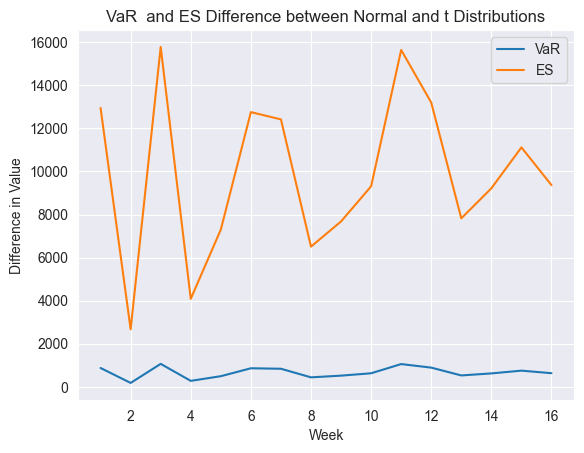

In [380]:
diff_VaR = df_VaR['VaR_95_t'] - df_VaR['VaR_95_normal'] 
plt.plot(df_VaR['Week'], diff_VaR, label='VaR')
diff_ES = df_VaR['ES_95_t'] - df_VaR['ES_95_normal'] 
plt.plot(df_VaR['Week'], diff_ES, label='ES')
plt.xlabel('Week')
plt.ylabel('Difference in Value')
plt.title('VaR  and ES Difference between Normal and t Distributions')
plt.legend()
plt.show()


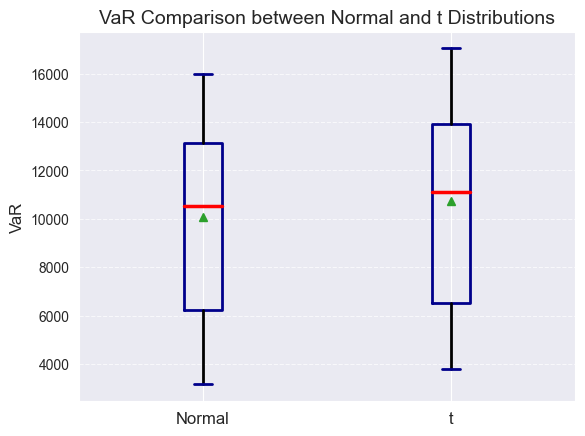

In [381]:
import matplotlib.pyplot as plt

VaR_data = [df_VaR['VaR_95_normal'], df_VaR['VaR_95_t']]
boxprops = dict(linestyle='-', linewidth=2, color='darkblue')
medianprops = dict(linestyle='-', linewidth=2.5, color='red')
whiskerprops = dict(linestyle='-', linewidth=2, color='black')
capprops = dict(linestyle='-', linewidth=2, color='darkblue')
flierprops = dict(marker='o', markersize=6, markerfacecolor='white', markeredgecolor='black')
plt.boxplot(VaR_data, showmeans=True, boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops,
            capprops=capprops, flierprops=flierprops)
plt.xticks([1, 2], ['Normal', 't'], fontsize=12)
plt.ylabel('VaR', fontsize=12)
plt.title('VaR Comparison between Normal and t Distributions', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


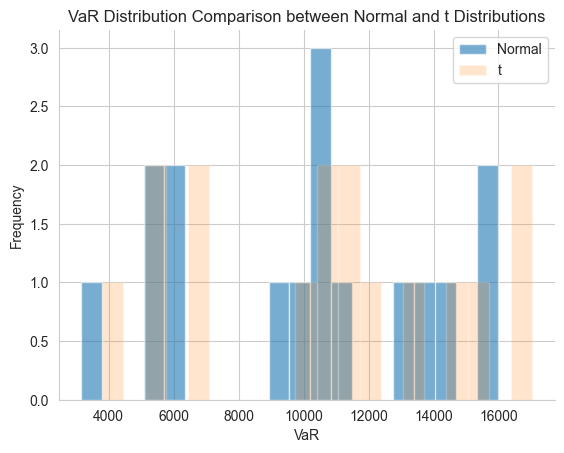

In [382]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')

# Plot histogram
plt.hist(df_VaR['VaR_95_normal'], bins=20, alpha=0.6, label='Normal', color='#1f77b4')
plt.hist(df_VaR['VaR_95_t'], bins=20, alpha=0.2, label='t', color='#ff7f0e')

# Add legend
plt.legend(loc='upper right')

# Set axis labels and title
plt.xlabel('VaR')
plt.ylabel('Frequency')
plt.title('VaR Distribution Comparison between Normal and t Distributions')

# Remove top and right spines
sns.despine()

# Show plot
plt.show()


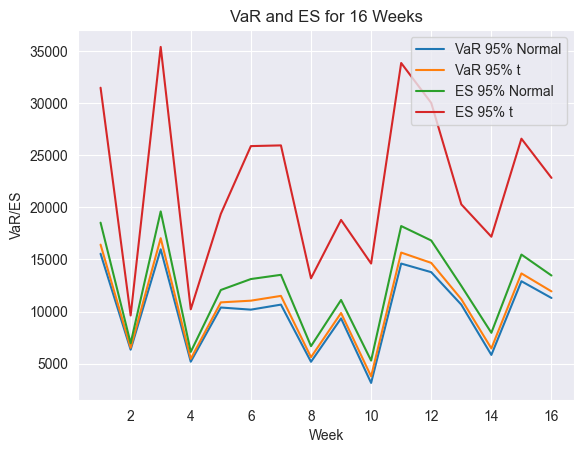

In [376]:
# Set style for seaborn
sns.set_style('darkgrid')

# Create line plot for VaRs
plt.plot(df_VaR['Week'], df_VaR['VaR_95_normal'], label='VaR 95% Normal')
plt.plot(df_VaR['Week'], df_VaR['VaR_95_t'], label='VaR 95% t')
plt.plot(df_VaR['Week'], df_VaR['ES_95_normal'], label='ES 95% Normal')
plt.plot(df_VaR['Week'], df_VaR['ES_95_t'], label='ES 95% t')

# Add labels and legend
plt.xlabel('Week')
plt.ylabel('VaR/ES')
plt.title('VaR and ES for 16 Weeks')
plt.legend()

# Show plot
plt.show()

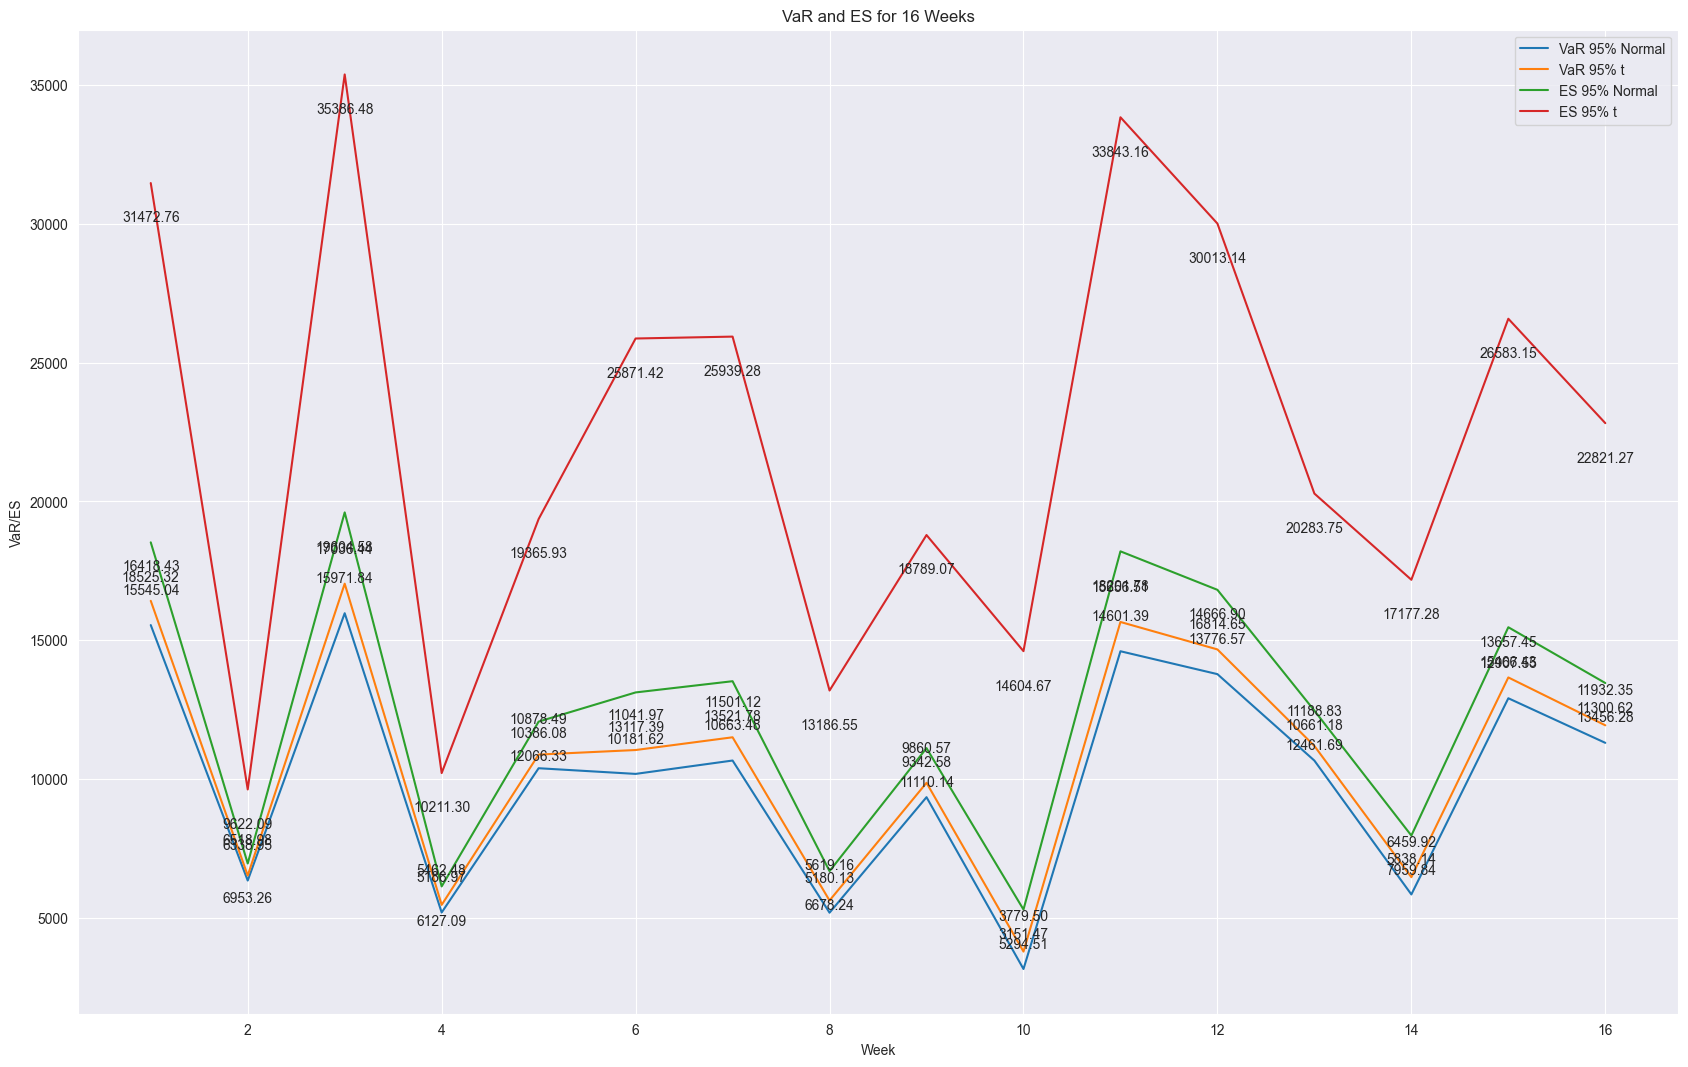

In [395]:
# Set style for seaborn
sns.set_style('darkgrid')

# Set figure size and padding
fig, ax = plt.subplots(figsize=(20, 12))
plt.subplots_adjust(top=0.92, bottom=0.1, left=0.1, right=0.9, hspace=0.5, wspace=0.5)

# Create line plot for VaRs
plt.plot(df_VaR['Week'], df_VaR['VaR_95_normal'], label='VaR 95% Normal')
plt.plot(df_VaR['Week'], df_VaR['VaR_95_t'], label='VaR 95% t')
plt.plot(df_VaR['Week'], df_VaR['ES_95_normal'], label='ES 95% Normal')
plt.plot(df_VaR['Week'], df_VaR['ES_95_t'], label='ES 95% t')

# Add labels and legend
plt.xlabel('Week')
plt.ylabel('VaR/ES')
plt.title('VaR and ES for 16 Weeks')
plt.legend()

# Add data labels
for x, y1, y2, y3, y4 in zip(df_VaR['Week'], df_VaR['VaR_95_normal'], df_VaR['VaR_95_t'], df_VaR['ES_95_normal'], df_VaR['ES_95_t']):
    plt.text(x, y1+1000, f'{y1:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(x, y2+1000, f'{y2:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(x, y3-1000, f'{y3:.2f}', ha='center', va='top', fontsize=10)
    plt.text(x, y4-1000, f'{y4:.2f}', ha='center', va='top', fontsize=10)

# Show plot
plt.show()


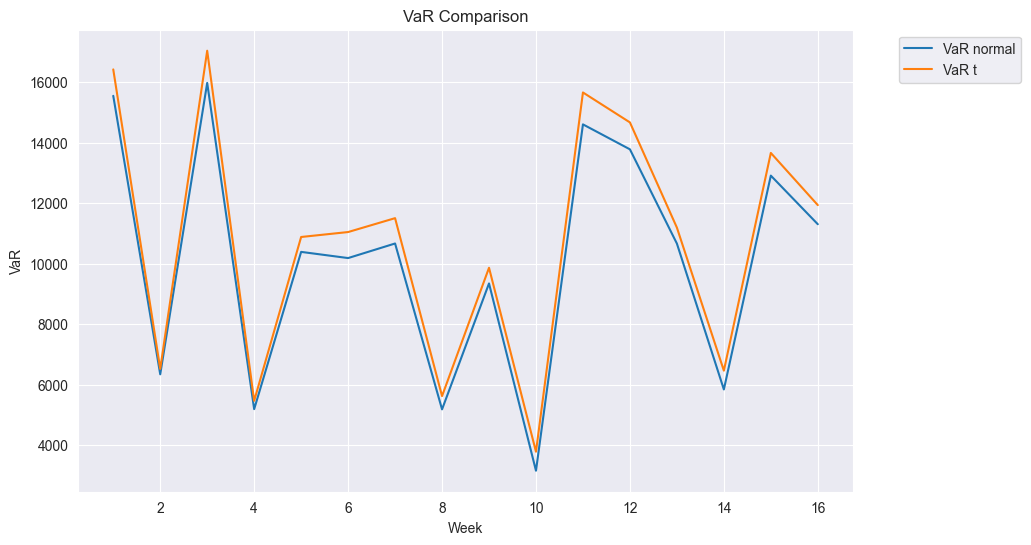

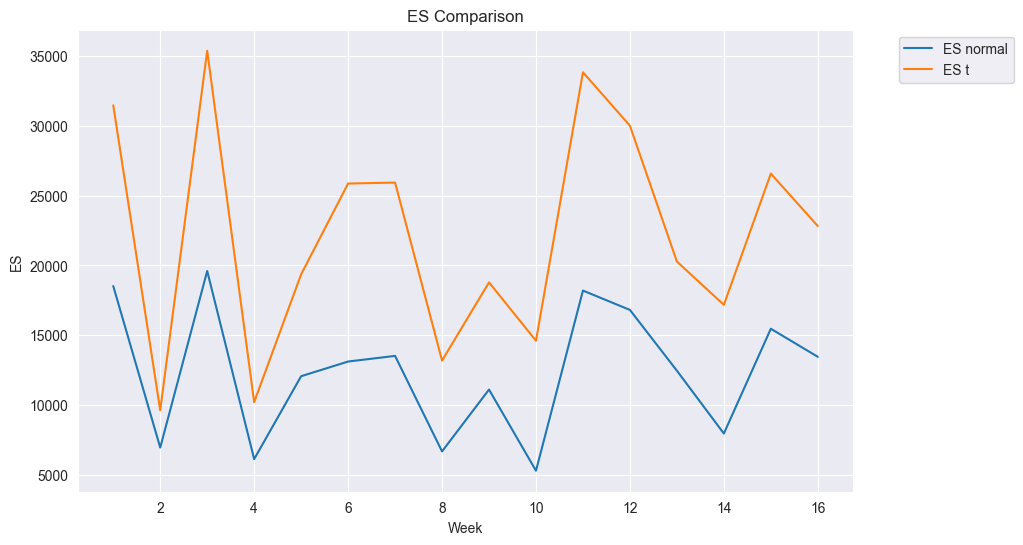

In [385]:
import matplotlib.pyplot as plt

# Define the x-axis values
x = df_VaR['Week']

# Plot the VaR values for normal and t distributions
plt.figure(figsize=(10, 6))
plt.plot(x, df_VaR['VaR_95_normal'], label='VaR normal')
plt.plot(x, df_VaR['VaR_95_t'], label='VaR t')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('VaR Comparison')
plt.xlabel('Week')
plt.ylabel('VaR')
plt.show()

# Plot the ES values for normal and t distributions
plt.figure(figsize=(10, 6))
plt.plot(x, df_VaR['ES_95_normal'], label='ES normal')
plt.plot(x, df_VaR['ES_95_t'], label='ES t')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('ES Comparison')
plt.xlabel('Week')
plt.ylabel('ES')
plt.show()


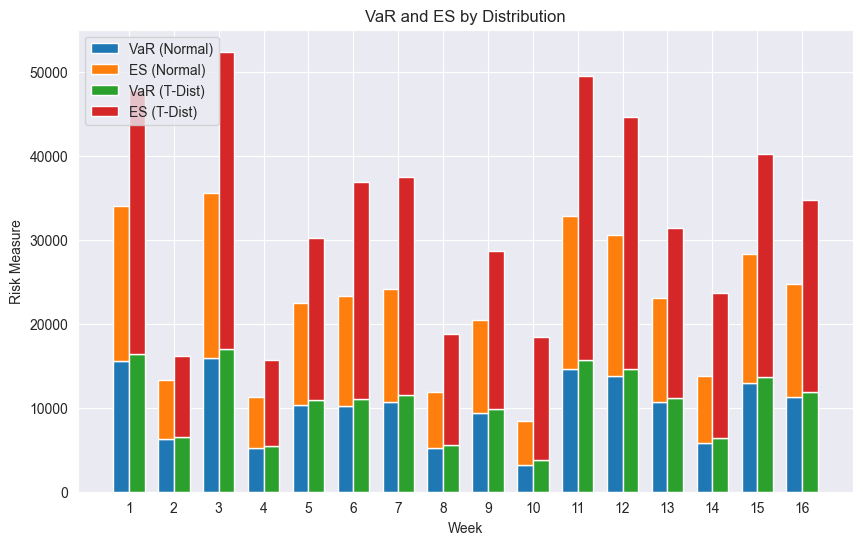

In [387]:
# Plot stacked bar chart for VaR and ES by distribution
width = 0.35
x = df_VaR['Week']
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_VaR['VaR_95_normal'], width, label='VaR (Normal)')
rects2 = ax.bar(x - width/2, df_VaR['ES_95_normal'], width, bottom=df_VaR['VaR_95_normal'], label='ES (Normal)')
rects3 = ax.bar(x + width/2, df_VaR['VaR_95_t'], width, label='VaR (T-Dist)')
rects4 = ax.bar(x + width/2, df_VaR['ES_95_t'], width, bottom=df_VaR['VaR_95_t'], label='ES (T-Dist)')

# Set axis labels and title
ax.set_xlabel('Week')
ax.set_ylabel('Risk Measure')
ax.set_title('VaR and ES by Distribution')
ax.set_xticks(x)
ax.legend(loc='upper left')

# Increase plot size
fig = plt.gcf()
fig.set_size_inches(10, 6)

# Show plot
plt.show()


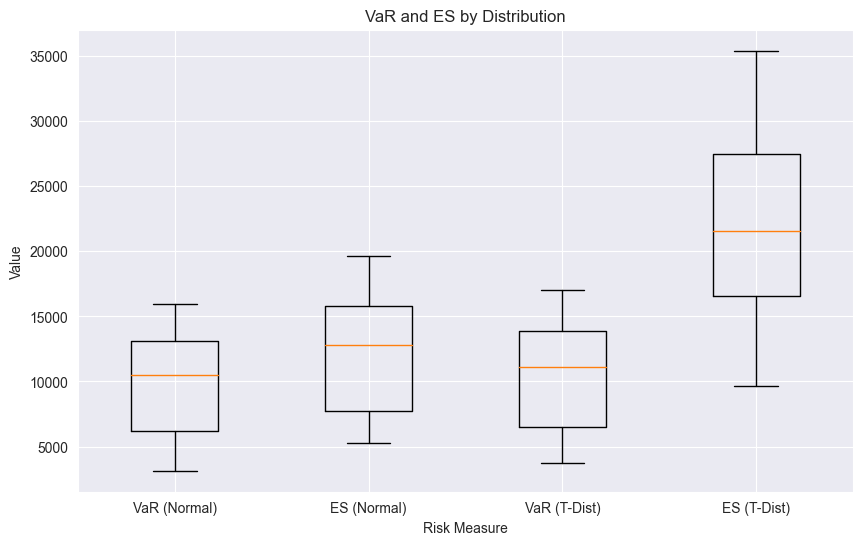

In [388]:
# Create box plot for VaR and ES by distribution
data = [df_VaR['VaR_95_normal'], df_VaR['ES_95_normal'], df_VaR['VaR_95_t'], df_VaR['ES_95_t']]
labels = ['VaR (Normal)', 'ES (Normal)', 'VaR (T-Dist)', 'ES (T-Dist)']

# Plot box plot
plt.boxplot(data, labels=labels)

# Set axis labels and title
plt.xlabel('Risk Measure')
plt.ylabel('Value')
plt.title('VaR and ES by Distribution')

# Increase plot size
fig = plt.gcf()
fig.set_size_inches(10, 6)

# Show plot
plt.show()


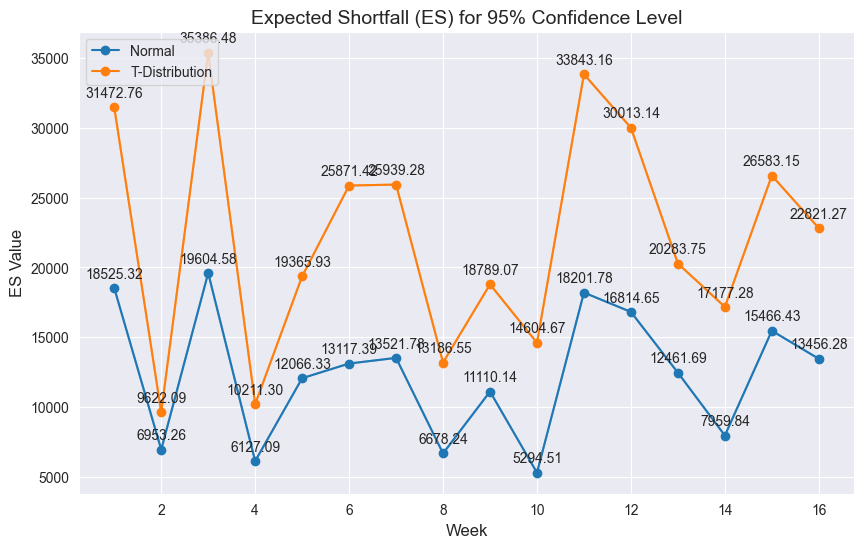

In [389]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_VaR['Week'], df_VaR['ES_95_normal'], label='Normal', marker='o')
ax.plot(df_VaR['Week'], df_VaR['ES_95_t'], label='T-Distribution', marker='o')
ax.plot(df_VaR['Week'], df_VaR['ES_95_normal'], color='tab:blue', alpha=0.4)
ax.plot(df_VaR['Week'], df_VaR['ES_95_t'], color='tab:orange', alpha=0.4)

ax.set_title('Expected Shortfall (ES) for 95% Confidence Level', fontsize=14)
ax.set_xlabel('Week', fontsize=12)
ax.set_ylabel('ES Value', fontsize=12)
ax.legend(loc='upper left')

# Add data labels
for x, y1, y2 in zip(df_VaR['Week'], df_VaR['ES_95_normal'], df_VaR['ES_95_t']):
    ax.text(x, y1+500, f'{y1:.2f}', ha='center', va='bottom', fontsize=10)
    ax.text(x, y2+500, f'{y2:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

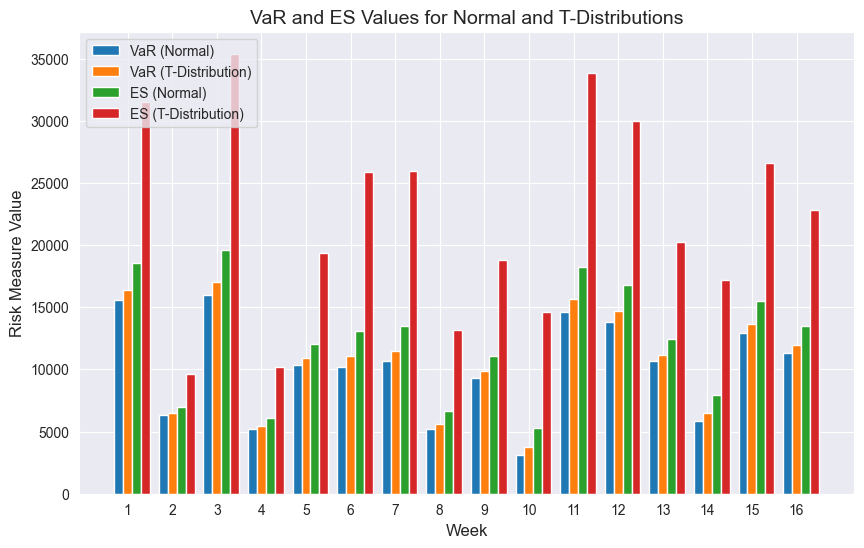

In [390]:
fig, ax = plt.subplots(figsize=(10, 6))

# Define the data
VaR_normal = df_VaR['VaR_95_normal']
VaR_t = df_VaR['VaR_95_t']
ES_normal = df_VaR['ES_95_normal']
ES_t = df_VaR['ES_95_t']

# Define the bar width
bar_width = 0.2

# Define the x positions
x1 = np.arange(len(VaR_normal))
x2 = [x + bar_width for x in x1]
x3 = [x + bar_width for x in x2]
x4 = [x + bar_width for x in x3]

# Plot the bars
ax.bar(x1, VaR_normal, width=bar_width, label='VaR (Normal)', color='tab:blue')
ax.bar(x2, VaR_t, width=bar_width, label='VaR (T-Distribution)', color='tab:orange')
ax.bar(x3, ES_normal, width=bar_width, label='ES (Normal)', color='tab:green')
ax.bar(x4, ES_t, width=bar_width, label='ES (T-Distribution)', color='tab:red')

ax.set_title('VaR and ES Values for Normal and T-Distributions', fontsize=14)
ax.set_xlabel('Week', fontsize=12)
ax.set_ylabel('Risk Measure Value', fontsize=12)
ax.set_xticks(x2)
ax.set_xticklabels(df_VaR['Week'])
ax.legend(loc='upper left')

plt.show()